ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Ventas de Copiadoras

Datos cargados: 15 representantes de ventas
Variable independiente (X): Número de llamadas de ventas
Variable dependiente (Y): Número de copiadoras vendidas
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generating Histograms...


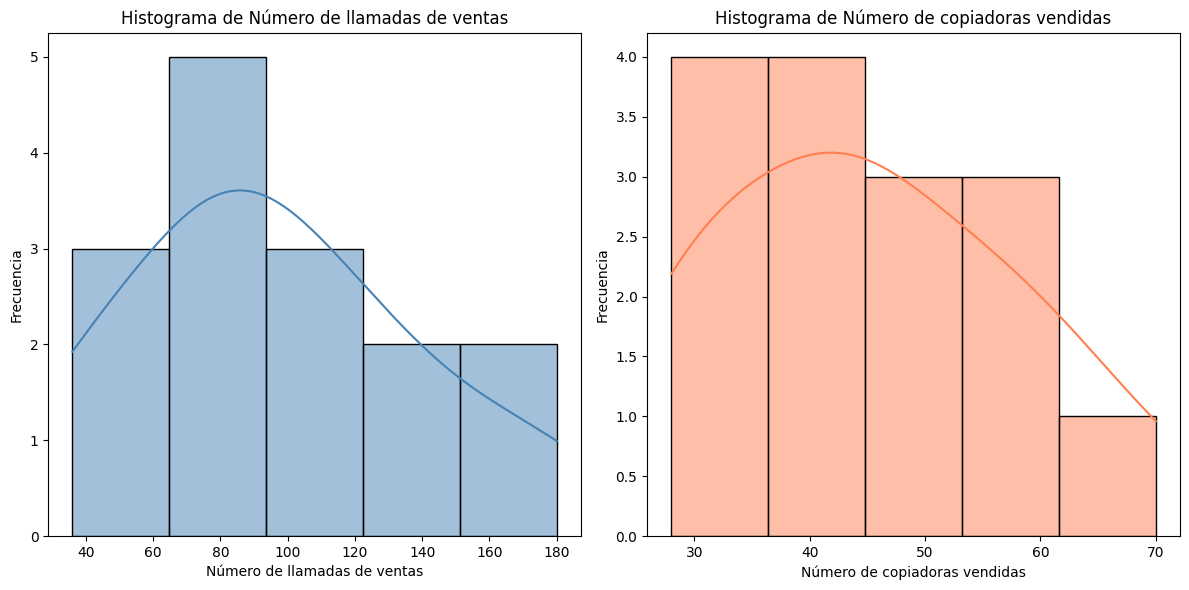

------------------------------
Generating Scatter Plot...


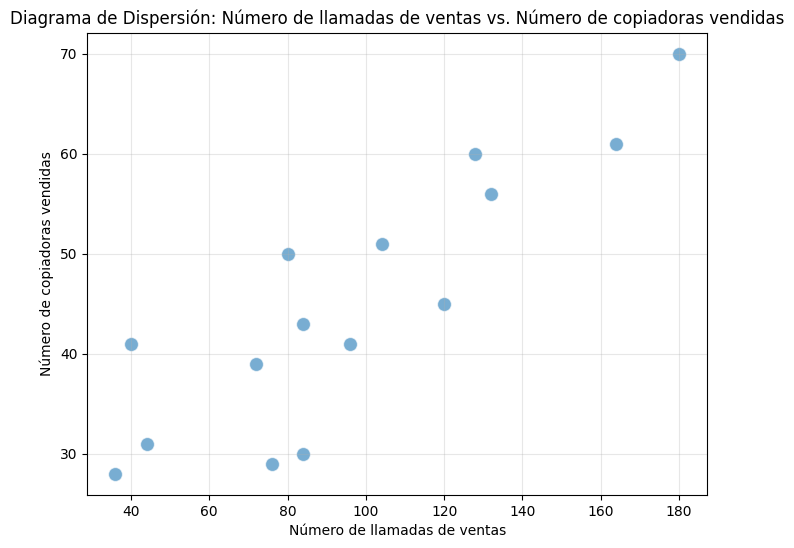

------------------------------
Performing Normality Tests...
Shapiro-Wilk test for 'Número de llamadas de ventas': Statistics=0.953, p-value=0.578
Shapiro-Wilk test for 'Número de copiadoras vendidas': Statistics=0.949, p-value=0.505

Interpretation of normality test results:
✓ The 'Número de llamadas de ventas' variable appears to be normally distributed (p > 0.05).
✓ The 'Número de copiadoras vendidas' variable appears to be normally distributed (p > 0.05).
------------------------------
Calculating Correlation Coefficients...
Pearson correlation coefficient: 0.8646
Kendall correlation coefficient: 0.7019
Spearman correlation coefficient: 0.8551
------------------------------
Determining the most appropriate correlation coefficient...
✓ Both variables appear normally distributed. The Pearson correlation coefficient (0.8646) is the most appropriate.
----------------------------------------------------------------------

--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---

H

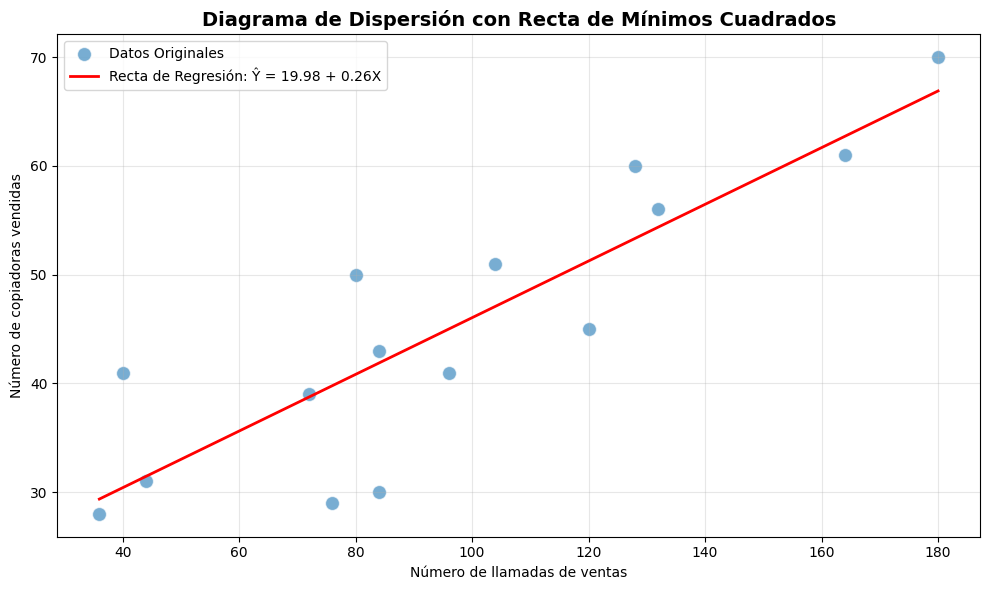


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β > 0 (Existe una relación lineal positiva significativa)

1. Cálculo del Error Estándar de Estimación (s_y,x):
   Σ(y - ŷ)² = 587.1100
   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = 6.7203

2. Cálculo del Error Estándar de la Pendiente (s_b):
   Σ(x - x̄)² = 25600.0000
   s_b = s_y,x / √[Σ(x - x̄)²] = 0.0420

3. Cálculo del Estadístico t:
   t = (b₁ - 0) / s_b = (0.2606 - 0) / 0.0420
   t calculado = 6.2051

4. Parámetros de la Prueba:
   Nivel de significancia (α) = 0.05
   Grados de libertad (gl) = 13
   Valor crítico (t_0.05,13) = 1.7709
   Valor p (una cola) = 0.0000

----------------------------------------------------------------------
CRITERIO DE DECISIÓN:
----------------------------------------------------------------------
t calculado (6.2051) > t crítico (1.7709)
valor p (0.0000) < α (0.05)

DECISIÓN: RECHAZAR H0
INTERPRETACIÓN: ✓ La pendiente ES significativamente diferen

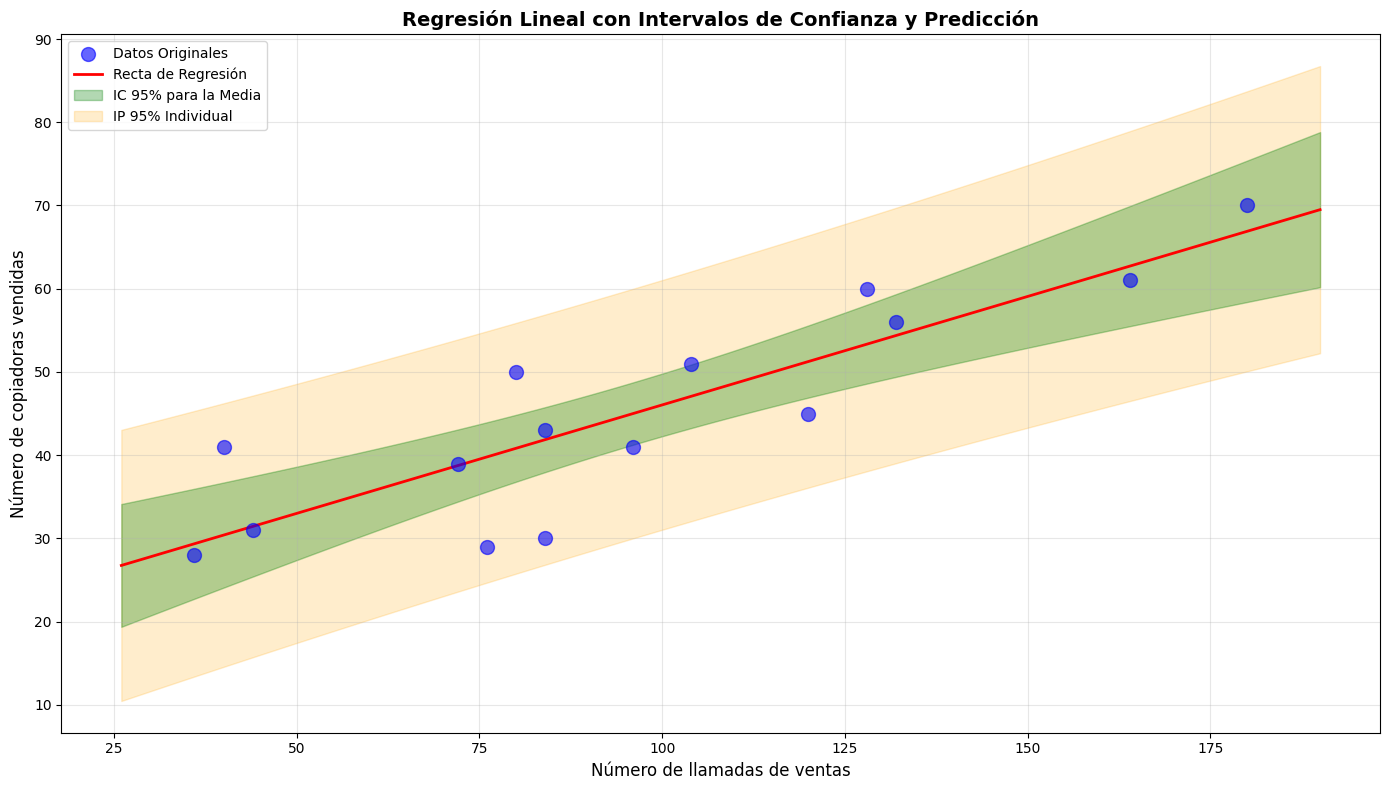

Visualización generada exitosamente!

--- ANÁLISIS DE RESIDUOS ---

Tabla de Residuos:

Representante      X        Y        ŷ        Residuo    Res. Std. 
----------------------------------------------------------------------
Brian Virrost      96       41       45.00    -4.00      -0.60     
Carlos Ramirez     40       41       30.41    10.59      1.58      
Carol Saia         104      51       47.09    3.91       0.58      
Greg Fish          128      60       53.34    6.66       0.99      
Jeff Hall          164      61       62.72    -1.72      -0.26     
Mark Reynolds      76       29       39.79    -10.79     -1.61     
Meryl Rumsey       72       39       38.75    0.25       0.04      
Mike Kiel          80       50       40.83    9.17       1.36      
Ray Snarsky        36       28       29.36    -1.36      -0.20     
Rich Niles         84       43       41.87    1.13       0.17      
Ron Broderick      180      70       66.89    3.11       0.46      
Sal Spina          132   

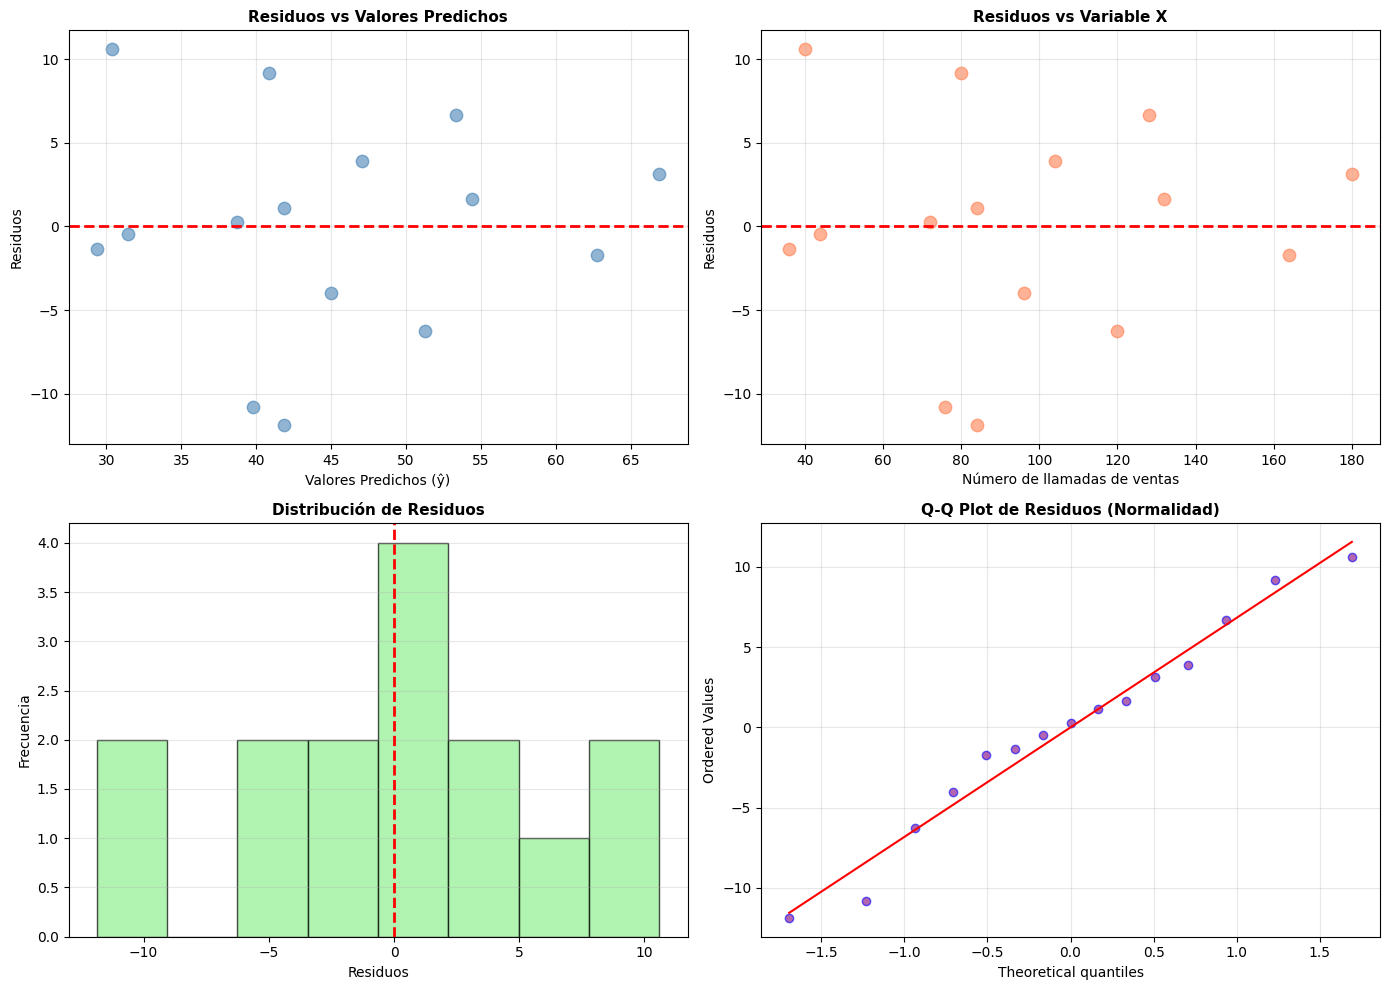


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.9699
  Valor p = 0.8559
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos:
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.


--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---

Criterios para evaluar si se necesita transformación:
----------------------------------------------------------------------

1. NORMALIDAD DE LAS VARIABLES:
   • Número de llamadas de ventas: p-value = 0.5777
     ✓ Distribución normal
   • Número de copiadoras vendidas: p-value = 0.5052
     ✓ Distribución normal

2. NORMALIDAD DE LOS RESIDUOS:
   • Residuos: p-value = 0.8559
     ✓ Distribución normal



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (VENTAS DE COPIADORAS) ---
data = {
    'Representantes de ventas': [
        'Brian Virrost', 'Carlos Ramirez', 'Carol Saia', 'Greg Fish',
        'Jeff Hall', 'Mark Reynolds', 'Meryl Rumsey', 'Mike Kiel',
        'Ray Snarsky', 'Rich Niles', 'Ron Broderick', 'Sal Spina',
        'Soni Jones', 'Susan Welch', 'Tom Keller'
    ],
    'Número de llamadas de ventas': [
        96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44, 84
    ],
    'Número de copiadoras vendidas': [
        41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30
    ]
}
df = pd.DataFrame(data)

variable_x = 'Número de llamadas de ventas'
variable_y = 'Número de copiadoras vendidas'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Ventas de Copiadoras")
print("=" * 70)
print(f"\nDatos cargados: {n} representantes de ventas")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerating Histograms...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral')
plt.title(f'Histograma de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot
print("Generating Scatter Plot...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# 3. Normality Tests (Shapiro-Wilk)
print("Performing Normality Tests...")
shapiro_test_calls = shapiro(df[variable_x])
print(f"Shapiro-Wilk test for '{variable_x}': Statistics={shapiro_test_calls.statistic:.3f}, p-value={shapiro_test_calls.pvalue:.3f}")

shapiro_test_sold = shapiro(df[variable_y])
print(f"Shapiro-Wilk test for '{variable_y}': Statistics={shapiro_test_sold.statistic:.3f}, p-value={shapiro_test_sold.pvalue:.3f}")

print("\nInterpretation of normality test results:")
if shapiro_test_calls.pvalue > alfa:
    print(f"✓ The '{variable_x}' variable appears to be normally distributed (p > 0.05).")
else:
    print(f"✗ The '{variable_x}' variable does not appear to be normally distributed (p <= 0.05).")

if shapiro_test_sold.pvalue > alfa:
    print(f"✓ The '{variable_y}' variable appears to be normally distributed (p > 0.05).")
else:
    print(f"✗ The '{variable_y}' variable does not appear to be normally distributed (p <= 0.05).")
print("-" * 30)

# 4. Calculate Correlation Coefficients
print("Calculating Correlation Coefficients...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"Pearson correlation coefficient: {pearson_corr:.4f}")
print(f"Kendall correlation coefficient: {kendall_corr:.4f}")
print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determining the most appropriate correlation coefficient...")
if shapiro_test_calls.pvalue > alfa and shapiro_test_sold.pvalue > alfa:
    print(f"✓ Both variables appear normally distributed. The Pearson correlation coefficient ({pearson_corr:.4f}) is the most appropriate.")
else:
     print(f"⚠ At least one variable does not appear normally distributed. The Spearman correlation coefficient ({spearman_corr:.4f}) or Kendall correlation coefficient ({kendall_corr:.4f}) are more appropriate non-parametric measures.")
print("-" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

# Hipótesis: H0: rho = 0, H1: rho != 0 (Prueba de dos colas)
r = pearson_corr
gl = n - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r^2)
try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

# Valor p (two-sided)
valor_p = t.sf(abs(t_calculado), gl) * 2

# Valor crítico de t (para alfa/2)
t_critico_positivo = t.ppf(1 - alfa / 2, gl)
t_critico_negativo = -t_critico_positivo

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}): ±{t_critico_positivo:.4f}")
print(f"Valor p: {valor_p:.4f}")

# Criterio de Decisión
if valor_p < alfa:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = "✓ Existe una correlación lineal significativa (ρ ≠ 0)."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = "✗ No hay evidencia de una correlación lineal significativa (ρ = 0)."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

# Cálculo de la media de X (Número de llamadas) y Y (Copiadoras vendidas)
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()

# 1. Cálculo de la PENDIENTE (b1)
# b1 = r * (Sy / Sx)
std_x = df[variable_x].std(ddof=1)  # Desviación estándar muestral
std_y = df[variable_y].std(ddof=1)  # Desviación estándar muestral
b1 = r * (std_y / std_x)

# 2. Cálculo de la INTERSECCIÓN CON EL EJE Y (b0)
# b0 = mean_y - b1 * mean_x
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f}")
print(f"Media de Y (ȳ): {mean_y:.2f}")
print(f"Desviación estándar de X (Sx): {std_x:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0:.4f} + {b1:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)

# --- Visualización de la Recta de Regresión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, label='Datos Originales', s=100, alpha=0.6)

# Crear la línea de regresión
x_min = df[variable_x].min()
x_max = df[variable_x].max()
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line

plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0:.2f} + {b1:.2f}X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

# Hipótesis:
# H0: β = 0 (La pendiente no es significativamente diferente de cero)
# H1: β > 0 (La pendiente es significativamente mayor que cero)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β > 0 (Existe una relación lineal positiva significativa)")

# Calcular valores predichos (ŷ)
df['y_predicho'] = b0 + b1 * df[variable_x]

# Calcular el Error Estándar de Estimación (s_y,x)
# Fórmula: s_y,x = sqrt(Σ(y - ŷ)² / (n - 2))
diferencias_cuadradas = (df[variable_y] - df['y_predicho']) ** 2
suma_diferencias_cuadradas = diferencias_cuadradas.sum()
s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))

print(f"\n1. Cálculo del Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas:.4f}")
print(f"   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = {s_yx:.4f}")

# Calcular el Error Estándar de la Pendiente (s_b)
# Fórmula: s_b = s_y,x / sqrt(Σ(x - x̄)²)
desviaciones_x = (df[variable_x] - mean_x) ** 2
suma_desviaciones_x = desviaciones_x.sum()
s_b = s_yx / np.sqrt(suma_desviaciones_x)

print(f"\n2. Cálculo del Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x:.4f}")
print(f"   s_b = s_y,x / √[Σ(x - x̄)²] = {s_b:.4f}")

# Calcular el estadístico t
# Fórmula: t = (b - 0) / s_b
t_calculado_pendiente = (b1 - 0) / s_b

print(f"\n3. Cálculo del Estadístico t:")
print(f"   t = (b₁ - 0) / s_b = ({b1:.4f} - 0) / {s_b:.4f}")
print(f"   t calculado = {t_calculado_pendiente:.4f}")

# Grados de libertad
gl_pendiente = n - 2

# Valor crítico (prueba de una cola, cola derecha)
t_critico_pendiente = t.ppf(1 - alfa, gl_pendiente)

# Valor p (prueba de una cola)
valor_p_pendiente = t.sf(t_calculado_pendiente, gl_pendiente)

print(f"\n4. Parámetros de la Prueba:")
print(f"   Nivel de significancia (α) = {alfa}")
print(f"   Grados de libertad (gl) = {gl_pendiente}")
print(f"   Valor crítico (t_{alfa},{gl_pendiente}) = {t_critico_pendiente:.4f}")
print(f"   Valor p (una cola) = {valor_p_pendiente:.4f}")

# Criterio de Decisión
print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p_pendiente < alfa:
    decision_pendiente = "RECHAZAR H0"
    interpretacion = "✓ La pendiente ES significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) < α ({alfa}), rechazamos la hipótesis nula.
    Esto significa que existe evidencia estadística suficiente para concluir que
    el número de llamadas de ventas tiene un efecto significativo POSITIVO sobre
    el número de copiadoras vendidas.

    En términos prácticos: Por cada llamada de ventas adicional, se espera un
    incremento de {b1:.4f} copiadoras vendidas, y este efecto es estadísticamente
    significativo.
    """
else:
    decision_pendiente = "NO RECHAZAR H0"
    interpretacion = "✗ La pendiente NO es significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) ≥ α ({alfa}), no rechazamos la hipótesis nula.
    No hay evidencia estadística suficiente para concluir que el número de llamadas
    de ventas tenga un efecto significativo sobre el número de copiadoras vendidas.
    """

print(f"t calculado ({t_calculado_pendiente:.4f}) {'>' if t_calculado_pendiente > t_critico_pendiente else '<'} t crítico ({t_critico_pendiente:.4f})")
print(f"valor p ({valor_p_pendiente:.4f}) {'<' if valor_p_pendiente < alfa else '≥'} α ({alfa})")
print(f"\nDECISIÓN: {decision_pendiente}")
print(f"INTERPRETACIÓN: {interpretacion}")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL:")
print("=" * 70)
print(conclusion_pendiente)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

# Cálculo de R²
# R² = 1 - (SSE / SS Total)
# donde SSE = Σ(y - ŷ)² y SS Total = Σ(y - ȳ)²

SSE = suma_diferencias_cuadradas  # Ya calculado anteriormente
SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE

r_cuadrado = 1 - (SSE / SS_Total)
# También: r_cuadrado = r ** 2

print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE:.4f}")

print(f"\nCálculo de R²:")
print(f"  R² = 1 - (SSE / SS Total)")
print(f"  R² = 1 - ({SSE:.4f} / {SS_Total:.4f})")
print(f"  R² = {r_cuadrado:.4f}")

print(f"\nVerificación: R² = r² = ({r:.4f})² = {r**2:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado*100:.2f}% de la variabilidad en el número de            │")
print(f"│  copiadoras vendidas puede ser explicada por el número          │")
print(f"│  de llamadas de ventas realizadas.                              │")
print(f"└─────────────────────────────────────────────────────────────────┘")

print("\n" + "=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

# Calcular cuadrados medios
MSR = SSR / 1  # 1 grado de libertad para regresión
MSE = SSE / (n - 2)  # n-2 grados de libertad para error

# Estadístico F
F_calculado = MSR / MSE

# Valor p del estadístico F
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calculado:<15.4f} {valor_p_f:<15.6f}")
print(f"{'Error':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SS_Total:<15.4f} {n-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f < alfa:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f:.6f} < {alfa})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f:.6f} ≥ {alfa})")
    print("  El modelo NO es útil para hacer predicciones.")

print("=" * 70)

# =========================================================================
# --- PARTE 4: INTERVALOS DE CONFIANZA Y PREDICCIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---")
print("=" * 70)

# Valor crítico t para intervalos (dos colas)
t_critico_intervalo = t.ppf(1 - alfa/2, gl_pendiente)
print(f"\nValor crítico t para intervalos (α={alfa}, gl={gl_pendiente}): ±{t_critico_intervalo:.4f}")

# =========================================================================
# A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1/n + (x - x̄)² / Σ(x - x̄)²]")

# Ejemplo: Calcular intervalo para algunos valores de X
valores_x_ejemplo = [40, 96, 120, 180]  # Ejemplos de llamadas de ventas

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de confianza para la MEDIA de copiadoras vendidas:\n")
print(f"{'X (Llamadas)':<15} {'ŷ (Predicción)':<20} {'Intervalo de Confianza':<35}")
print("-" * 70)

intervalos_confianza = []
for x_val in valores_x_ejemplo:
    # Predicción
    y_pred = b0 + b1 * x_val

    # Término del error
    termino_error = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))

    # Margen de error
    margen_conf = t_critico_intervalo * s_yx * termino_error

    # Límites del intervalo
    limite_inferior_conf = y_pred - margen_conf
    limite_superior_conf = y_pred + margen_conf

    intervalos_confianza.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_conf,
        'limite_sup': limite_superior_conf
    })

    print(f"{x_val:<15} {y_pred:<20.2f} [{limite_inferior_conf:.2f}, {limite_superior_conf:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, cuando se realizan X llamadas de ventas,")
print("la MEDIA de copiadoras vendidas estará dentro del intervalo calculado.")

# =========================================================================
# B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1 + 1/n + (x - x̄)² / Σ(x - x̄)²]")

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de predicción para copiadoras vendidas INDIVIDUALES:\n")
print(f"{'X (Llamadas)':<15} {'ŷ (Predicción)':<20} {'Intervalo de Predicción':<35}")
print("-" * 70)

intervalos_prediccion = []
for x_val in valores_x_ejemplo:
    # Predicción
    y_pred = b0 + b1 * x_val

    # Término del error (NOTA: incluye el 1 + ...)
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))

    # Margen de error
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred

    # Límites del intervalo
    limite_inferior_pred = y_pred - margen_pred
    limite_superior_pred = y_pred + margen_pred

    intervalos_prediccion.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_pred,
        'limite_sup': limite_superior_pred
    })

    print(f"{x_val:<15} {y_pred:<20.2f} [{limite_inferior_pred:.2f}, {limite_superior_pred:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, cuando se realizan X llamadas de ventas,")
print("una observación INDIVIDUAL de copiadoras vendidas estará dentro del intervalo calculado.")

# =========================================================================
# COMPARACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("COMPARACIÓN: INTERVALO DE CONFIANZA vs INTERVALO DE PREDICCIÓN")
print("=" * 70)

print("\n📊 Diferencias clave:")
print("\n1. INTERVALO DE CONFIANZA (para la media):")
print("   - Más ESTRECHO")
print("   - Estima dónde está la MEDIA de Y para un valor dado de X")
print("   - Útil para entender la relación promedio")

print("\n2. INTERVALO DE PREDICCIÓN (para un valor individual):")
print("   - Más AMPLIO")
print("   - Predice dónde estará una OBSERVACIÓN INDIVIDUAL de Y")
print("   - Útil para hacer predicciones específicas")

print("\n3. ¿Por qué el intervalo de predicción es más amplio?")
print("   - Incluye la incertidumbre de la media (como el de confianza)")
print("   - ADEMÁS incluye la variabilidad individual alrededor de esa media")

# =========================================================================
# VISUALIZACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("Generando visualización de intervalos...")

plt.figure(figsize=(14, 8))

# Datos originales
plt.scatter(df[variable_x], df[variable_y],
           color='blue', s=100, alpha=0.6, label='Datos Originales', zorder=3)

# Recta de regresión
x_range = np.linspace(df[variable_x].min() - 10, df[variable_x].max() + 10, 100)
y_range = b0 + b1 * x_range
plt.plot(x_range, y_range, 'r-', linewidth=2, label='Recta de Regresión', zorder=2)

# Calcular intervalos para todo el rango
ic_lower = []
ic_upper = []
ip_lower = []
ip_upper = []

for x_val in x_range:
    y_pred = b0 + b1 * x_val

    # Intervalo de confianza
    termino_error_conf = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error_conf
    ic_lower.append(y_pred - margen_conf)
    ic_upper.append(y_pred + margen_conf)

    # Intervalo de predicción
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    ip_lower.append(y_pred - margen_pred)
    ip_upper.append(y_pred + margen_pred)

# Graficar intervalos de confianza
plt.fill_between(x_range, ic_lower, ic_upper,
                alpha=0.3, color='green',
                label=f'IC {(1-alfa)*100:.0f}% para la Media', zorder=1)

# Graficar intervalos de predicción
plt.fill_between(x_range, ip_lower, ip_upper,
                alpha=0.2, color='orange',
                label=f'IP {(1-alfa)*100:.0f}% Individual', zorder=0)

plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.title('Regresión Lineal con Intervalos de Confianza y Predicción', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualización generada exitosamente!")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

# Calcular residuos
df['residuos'] = df[variable_y] - df['y_predicho']
df['residuos_estandarizados'] = df['residuos'] / s_yx

print("\nTabla de Residuos:")
print(f"\n{'Representante':<18} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 70)
for idx, row in df.iterrows():
    print(f"{row['Representantes de ventas']:<18} {row[variable_x]:<8} {row[variable_y]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

# Estadísticas de residuos
print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df['residuos'].min():.4f}")
print(f"  Residuo máximo: {df['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df['residuos'], bins=8, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos.pvalue:.4f}")

if shapiro_residuos.pvalue > alfa:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos:")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")

print("\n" + "=" * 70)

# =========================================================================
# --- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---")
print("=" * 70)

print("\nCriterios para evaluar si se necesita transformación:")
print("-" * 70)

# 1. Normalidad de las variables
print("\n1. NORMALIDAD DE LAS VARIABLES:")
print(f"   • {variable_x}: p-value = {shapiro_test_calls.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_calls.pvalue > alfa else '✗ No normal'}")
print(f"   • {variable_y}: p-value = {shapiro_test_sold.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_sold.pvalue > alfa else '✗ No normal'}")

# 2. Normalidad de residuos
print(f"\n2. NORMALIDAD DE LOS RESIDUOS:")
print(f"   • Residuos: p-value = {shapiro_residuos.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_residuos.pvalue > alfa else '✗ No normal'}")

# 3. Homocedasticidad (inspección visual)
print(f"\n3. HOMOCEDASTICIDAD (Varianza constante):")
print(f"   • Revisar gráfico 'Residuos vs Valores Predichos'")
print(f"   • Si los residuos muestran patrón de embudo o cono → transformar")
print(f"   • Si los residuos están distribuidos aleatoriamente → no transformar")

# 4. Linealidad
print(f"\n4. LINEALIDAD DE LA RELACIÓN:")
print(f"   • Revisar diagrama de dispersión X vs Y")
print(f"   • Coeficiente de correlación: r = {r:.4f}")
print(f"     {'✓ Relación lineal adecuada' if abs(r) > 0.6 else '⚠ Relación débil, considerar transformación'}")

# 5. Valores atípicos
residuos_estandarizados = np.abs(df['residuos_estandarizados'])
outliers = df[residuos_estandarizados > 2.5]
print(f"\n5. VALORES ATÍPICOS:")
print(f"   • Número de residuos estandarizados > 2.5: {len(outliers)}")
if len(outliers) > 0:
    print(f"   • Representantes con residuos atípicos:")
    for idx, row in outliers.iterrows():
        print(f"     - {row['Representantes de ventas']}: residuo std = {row['residuos_estandarizados']:.2f}")

# Decisión final
print("\n" + "=" * 70)
print("DECISIÓN SOBRE TRANSFORMACIÓN:")
print("=" * 70)

necesita_transformacion = False
razones_transformacion = []

if shapiro_test_calls.pvalue <= alfa or shapiro_test_sold.pvalue <= alfa:
    razones_transformacion.append("- Variables originales no son normales")
    necesita_transformacion = True

if shapiro_residuos.pvalue <= alfa:
    razones_transformacion.append("- Residuos no siguen distribución normal")
    necesita_transformacion = True

if abs(r) < 0.5:
    razones_transformacion.append("- Correlación lineal débil (r < 0.5)")
    necesita_transformacion = True

if len(outliers) > n * 0.15:  # Más del 15% son outliers
    razones_transformacion.append(f"- Exceso de valores atípicos ({len(outliers)} casos)")
    necesita_transformacion = True

if necesita_transformacion:
    print("\n⚠ SE RECOMIENDA CONSIDERAR TRANSFORMACIÓN DE DATOS\n")
    print("Razones:")
    for razon in razones_transformacion:
        print(f"  {razon}")

    print("\nTransformaciones sugeridas:")
    print("  • Logarítmica: Y' = log(Y) o X' = log(X)")
    print("    └─ Útil para reducir asimetría positiva y estabilizar varianza")
    print("  • Raíz cuadrada: Y' = √Y")
    print("    └─ Útil para datos de conteo con varianza proporcional a la media")
    print("  • Recíproca: Y' = 1/Y")
    print("    └─ Útil para relaciones no lineales decrecientes")
    print("  • Box-Cox: Encuentra la transformación óptima automáticamente")

    print("\n  IMPORTANTE: Después de transformar, repetir todo el análisis")
    print("  con los datos transformados y comparar resultados.")

else:
    print("\n✓ NO ES NECESARIA LA TRANSFORMACIÓN DE DATOS\n")
    print("Justificación:")

    if shapiro_test_calls.pvalue > alfa and shapiro_test_sold.pvalue > alfa:
        print("  ✓ Las variables originales son aproximadamente normales")

    if shapiro_residuos.pvalue > alfa:
        print("  ✓ Los residuos siguen una distribución normal")

    if abs(r) >= 0.6:
        print(f"  ✓ La correlación lineal es adecuada (r = {r:.4f})")

    if len(outliers) <= n * 0.15:
        print(f"  ✓ Número aceptable de valores atípicos ({len(outliers)} casos)")

    print("\n  El modelo de regresión lineal simple es apropiado para estos datos")
    print("  sin necesidad de transformaciones. Los supuestos fundamentales se")
    print("  cumplen razonablemente bien.")

print("\n" + "=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO DEL ANÁLISIS ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0:.4f} + {b1:.4f} × X

   Interpretación:
   • El punto de partida (b₀) es {b0:.2f} copiadoras
   • Por cada llamada adicional, aumentan {b1:.4f} copiadoras vendidas

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): {r:.4f}
     └─ Correlación {'fuerte' if abs(r) > 0.7 else 'moderada' if abs(r) > 0.4 else 'débil'} {'positiva' if r > 0 else 'negativa'}

   • Coeficiente de determinación (R²): {r_cuadrado:.4f}
     └─ {r_cuadrado*100:.2f}% de la variabilidad explicada

   • Error estándar de estimación (s_y,x): {s_yx:.4f}
     └─ Error típico de predicción: ±{s_yx:.2f} copiadoras

✅ PRUEBAS DE SIGNIFICANCIA (α = {alfa}):

   1. Correlación:
      • Estadístico t: {t_calculado:.4f}
      • Valor p: {valor_p:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p < alfa else '✗ NO SIGNIFICATIVA'}

   2. Pendiente:
      • Estadístico t: {t_calculado_pendiente:.4f}
      • Valor p: {valor_p_pendiente:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_pendiente < alfa else '✗ NO SIGNIFICATIVA'}

   3. Modelo (ANOVA):
      • Estadístico F: {F_calculado:.4f}
      • Valor p: {valor_p_f:.6f}
      • Decisión: {'✓ MODELO SIGNIFICATIVO' if valor_p_f < alfa else '✗ MODELO NO SIGNIFICATIVO'}

🔍 VALIDACIÓN DE SUPUESTOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_residuos.pvalue > alfa else '⚠ NO CUMPLE'} (p = {shapiro_residuos.pvalue:.4f})
   • Linealidad: {'✓ Verificar gráfico de dispersión'}
   • Homocedasticidad: {'✓ Verificar gráfico de residuos'}

💡 CONCLUSIÓN GENERAL:
""")

if valor_p_pendiente < alfa and valor_p_f < alfa:
    print(f"""   ✓ EL MODELO ES VÁLIDO Y ÚTIL PARA PREDICCIONES

   El número de llamadas de ventas es un predictor SIGNIFICATIVO del
   número de copiadoras vendidas. El modelo explica {r_cuadrado*100:.2f}% de la
   variabilidad y puede utilizarse con confianza para:

   • Predecir ventas futuras basadas en llamadas planificadas
   • Establecer objetivos de llamadas para alcanzar metas de ventas
   • Evaluar el rendimiento de los representantes de ventas

   Recomendación: IMPLEMENTAR este modelo en la planificación de ventas.
""")
else:
    print(f"""   ⚠ EL MODELO TIENE LIMITACIONES

   Aunque existe una relación entre llamadas y ventas, el modelo
   presenta algunas limitaciones estadísticas. Se recomienda:

   • Recolectar más datos para mejorar el modelo
   • Considerar otras variables explicativas
   • Realizar análisis adicionales antes de implementar decisiones
""")

print("\n" + "=" * 70)
print("📌 NOTA: Revise todos los gráficos generados para una interpretación")
print("   completa de los resultados y validación de supuestos.")
print("=" * 70)

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Ventas de Copiadoras

Datos cargados: 6 Equipos
Variable independiente (X): Goles Anotados
Variable dependiente (Y): Goles Recibidos
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generating Histograms...


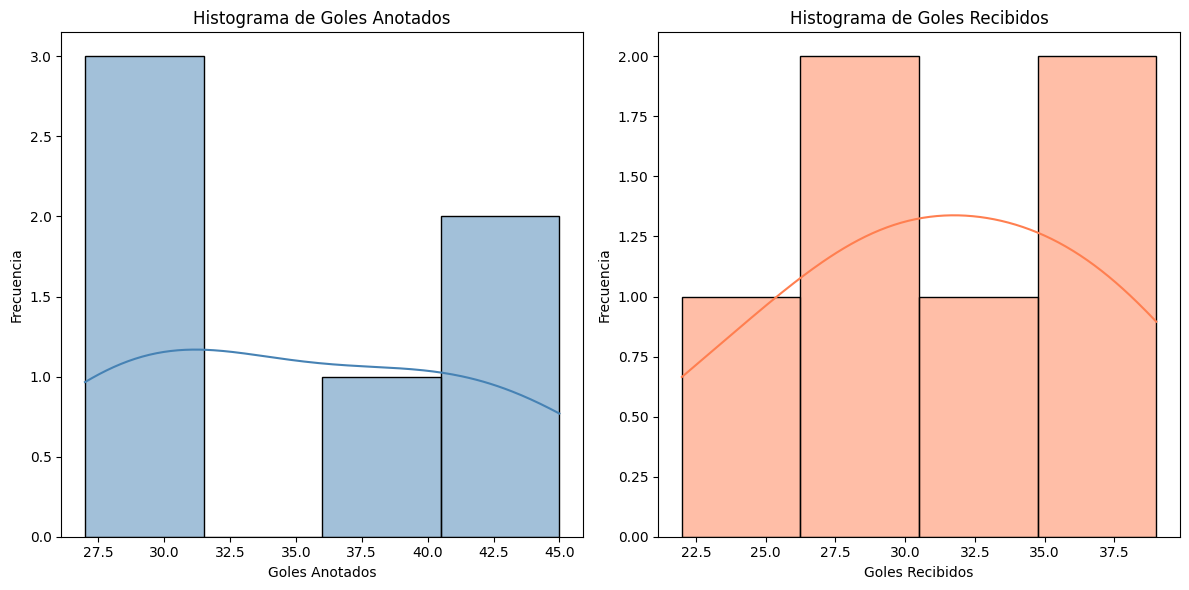

------------------------------
Generating Scatter Plot...


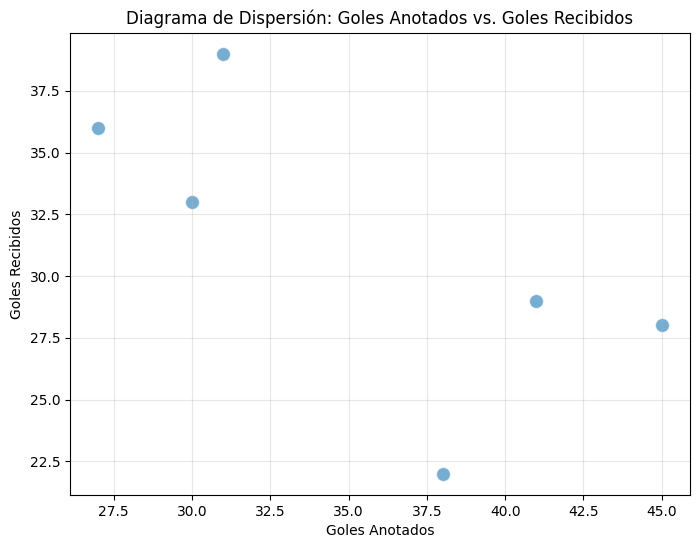

------------------------------
Performing Normality Tests...
Shapiro-Wilk test for 'Goles Anotados': Statistics=0.936, p-value=0.630
Shapiro-Wilk test for 'Goles Recibidos': Statistics=0.980, p-value=0.950

Interpretation of normality test results:
✓ The 'Goles Anotados' variable appears to be normally distributed (p > 0.05).
✓ The 'Goles Recibidos' variable appears to be normally distributed (p > 0.05).
------------------------------
Calculating Correlation Coefficients...
Pearson correlation coefficient: -0.7012
Kendall correlation coefficient: -0.4667
Spearman correlation coefficient: -0.6571
------------------------------
Determining the most appropriate correlation coefficient...
✓ Both variables appear normally distributed. The Pearson correlation coefficient (-0.7012) is the most appropriate.
----------------------------------------------------------------------

--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---

Hipótesis:
H0: ρ = 0 (No existe correlación lineal)
H

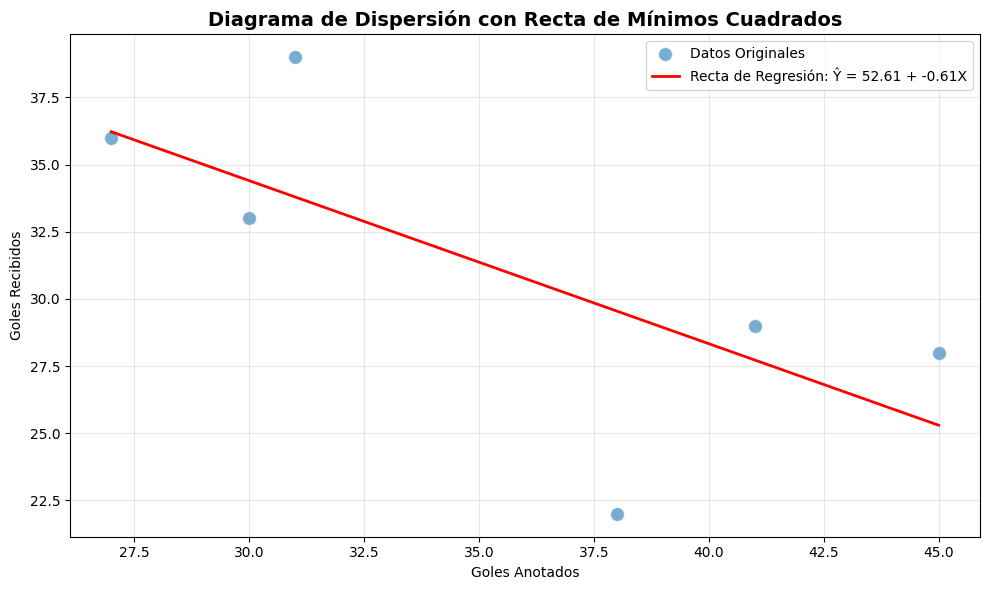


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β > 0 (Existe una relación lineal positiva significativa)

1. Cálculo del Error Estándar de Estimación (s_y,x):
   Σ(y - ŷ)² = 94.9813
   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = 4.8729

2. Cálculo del Error Estándar de la Pendiente (s_b):
   Σ(x - x̄)² = 249.3333
   s_b = s_y,x / √[Σ(x - x̄)²] = 0.3086

3. Cálculo del Estadístico t:
   t = (b₁ - 0) / s_b = (-0.6070 - 0) / 0.3086
   t calculado = -1.9668

4. Parámetros de la Prueba:
   Nivel de significancia (α) = 0.05
   Grados de libertad (gl) = 4
   Valor crítico (t_0.05,4) = 2.1318
   Valor p (una cola) = 0.9397

----------------------------------------------------------------------
CRITERIO DE DECISIÓN:
----------------------------------------------------------------------
t calculado (-1.9668) < t crítico (2.1318)
valor p (0.9397) ≥ α (0.05)

DECISIÓN: NO RECHAZAR H0
INTERPRETACIÓN: ✗ La pendiente NO es significativamente dif

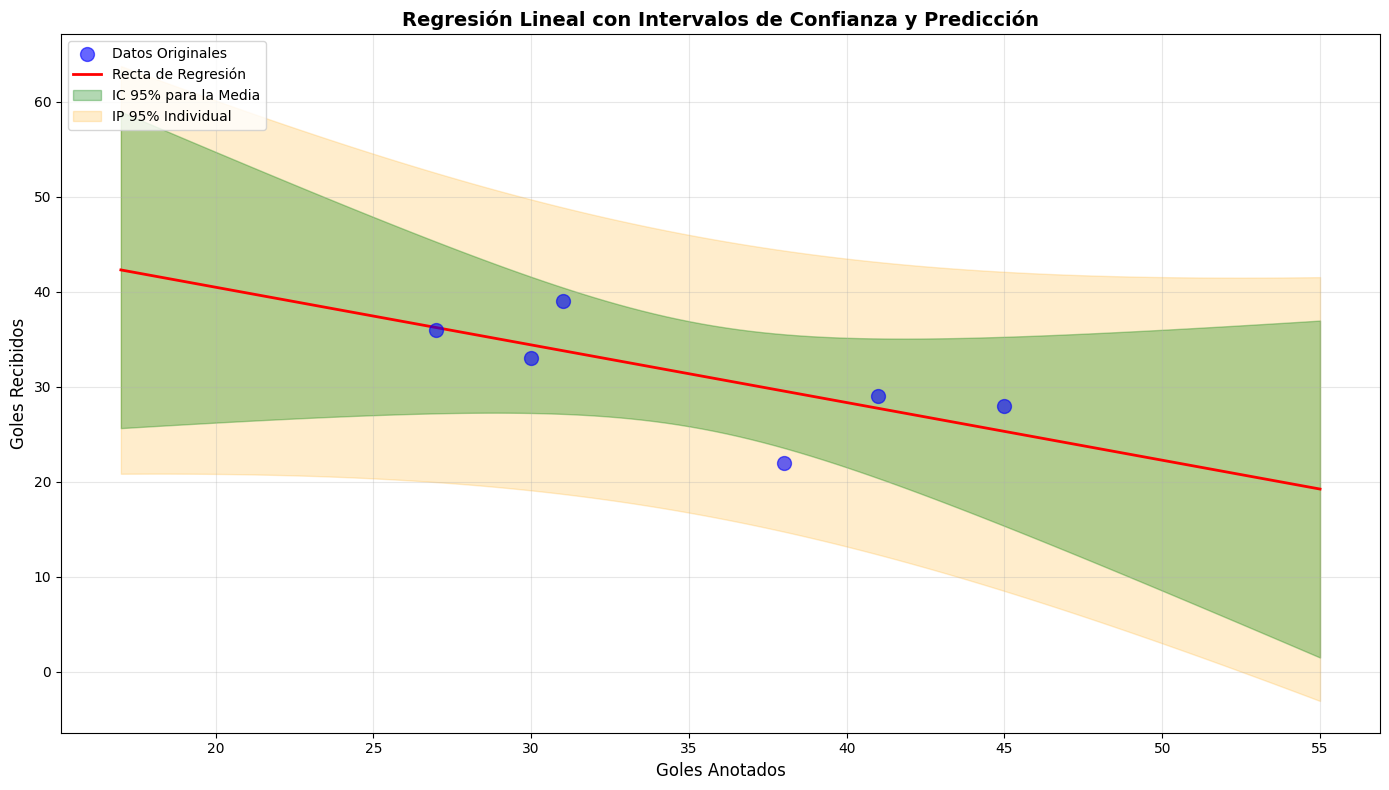

Visualización generada exitosamente!

--- ANÁLISIS DE RESIDUOS ---

Tabla de Residuos:

Representante      X        Y        ŷ        Residuo    Res. Std. 
----------------------------------------------------------------------
Leones             38       22       29.55    -7.55      -1.55     
Aguilas            45       28       25.30    2.70       0.55      
tigres             31       39       33.80    5.20       1.07      
Toros              30       33       34.40    -1.40      -0.29     
Pumas              27       36       36.22    -0.22      -0.05     
Jaguares           41       29       27.73    1.27       0.26      

Estadísticas de los Residuos:
  Media de residuos: -0.0000 (debe ser ≈ 0)
  Desviación estándar: 4.3585
  Residuo mínimo: -7.5481
  Residuo máximo: 5.2032


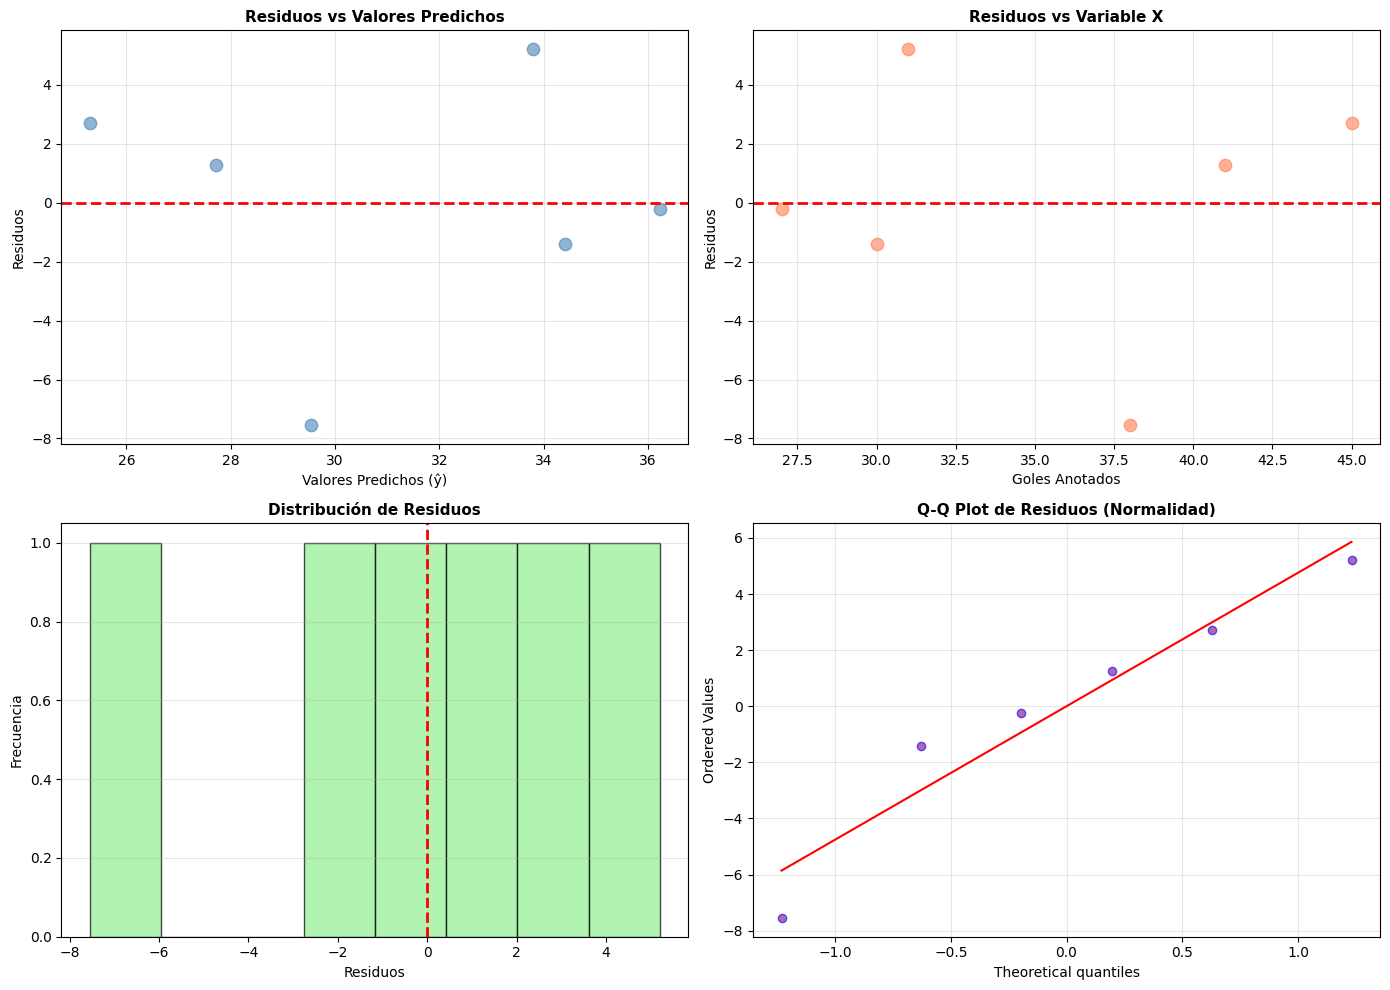


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.9468
  Valor p = 0.7142
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos:
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.


--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---

Criterios para evaluar si se necesita transformación:
----------------------------------------------------------------------

1. NORMALIDAD DE LAS VARIABLES:
   • Goles Anotados: p-value = 0.6295
     ✓ Distribución normal
   • Goles Recibidos: p-value = 0.9500
     ✓ Distribución normal

2. NORMALIDAD DE LOS RESIDUOS:
   • Residuos: p-value = 0.7142
     ✓ Distribución normal

3. HOMOCEDASTICIDAD (Varianz

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (VENTAS DE COPIADORAS) ---
data = {
    'Equipos': [
        'Leones', 'Aguilas','tigres','Toros','Pumas','Jaguares'
    ],
    'Goles Anotados': [
        38, 45, 31, 30, 27, 41
    ],
    'Goles Recibidos': [
        22, 28, 39, 33, 36, 29
    ]
}
df = pd.DataFrame(data)

variable_x = 'Goles Anotados'
variable_y = 'Goles Recibidos'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Ventas de Copiadoras")
print("=" * 70)
print(f"\nDatos cargados: {n} Equipos")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerating Histograms...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral')
plt.title(f'Histograma de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot
print("Generating Scatter Plot...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# 3. Normality Tests (Shapiro-Wilk)
print("Performing Normality Tests...")
shapiro_test_calls = shapiro(df[variable_x])
print(f"Shapiro-Wilk test for '{variable_x}': Statistics={shapiro_test_calls.statistic:.3f}, p-value={shapiro_test_calls.pvalue:.3f}")

shapiro_test_sold = shapiro(df[variable_y])
print(f"Shapiro-Wilk test for '{variable_y}': Statistics={shapiro_test_sold.statistic:.3f}, p-value={shapiro_test_sold.pvalue:.3f}")

print("\nInterpretation of normality test results:")
if shapiro_test_calls.pvalue > alfa:
    print(f"✓ The '{variable_x}' variable appears to be normally distributed (p > 0.05).")
else:
    print(f"✗ The '{variable_x}' variable does not appear to be normally distributed (p <= 0.05).")

if shapiro_test_sold.pvalue > alfa:
    print(f"✓ The '{variable_y}' variable appears to be normally distributed (p > 0.05).")
else:
    print(f"✗ The '{variable_y}' variable does not appear to be normally distributed (p <= 0.05).")
print("-" * 30)

# 4. Calculate Correlation Coefficients
print("Calculating Correlation Coefficients...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"Pearson correlation coefficient: {pearson_corr:.4f}")
print(f"Kendall correlation coefficient: {kendall_corr:.4f}")
print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determining the most appropriate correlation coefficient...")
if shapiro_test_calls.pvalue > alfa and shapiro_test_sold.pvalue > alfa:
    print(f"✓ Both variables appear normally distributed. The Pearson correlation coefficient ({pearson_corr:.4f}) is the most appropriate.")
else:
     print(f"⚠ At least one variable does not appear normally distributed. The Spearman correlation coefficient ({spearman_corr:.4f}) or Kendall correlation coefficient ({kendall_corr:.4f}) are more appropriate non-parametric measures.")
print("-" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

# Hipótesis: H0: rho = 0, H1: rho != 0 (Prueba de dos colas)
r = pearson_corr
gl = n - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r^2)
try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

# Valor p (two-sided)
valor_p = t.sf(abs(t_calculado), gl) * 2

# Valor crítico de t (para alfa/2)
t_critico_positivo = t.ppf(1 - alfa / 2, gl)
t_critico_negativo = -t_critico_positivo

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}): ±{t_critico_positivo:.4f}")
print(f"Valor p: {valor_p:.4f}")

# Criterio de Decisión
if valor_p < alfa:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = "✓ Existe una correlación lineal significativa (ρ ≠ 0)."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = "✗ No hay evidencia de una correlación lineal significativa (ρ = 0)."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

# Cálculo de la media de X (Número de llamadas) y Y (Copiadoras vendidas)
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()

# 1. Cálculo de la PENDIENTE (b1)
# b1 = r * (Sy / Sx)
std_x = df[variable_x].std(ddof=1)  # Desviación estándar muestral
std_y = df[variable_y].std(ddof=1)  # Desviación estándar muestral
b1 = r * (std_y / std_x)

# 2. Cálculo de la INTERSECCIÓN CON EL EJE Y (b0)
# b0 = mean_y - b1 * mean_x
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f}")
print(f"Media de Y (ȳ): {mean_y:.2f}")
print(f"Desviación estándar de X (Sx): {std_x:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0:.4f} + {b1:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)

# --- Visualización de la Recta de Regresión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, label='Datos Originales', s=100, alpha=0.6)

# Crear la línea de regresión
x_min = df[variable_x].min()
x_max = df[variable_x].max()
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line

plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0:.2f} + {b1:.2f}X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

# Hipótesis:
# H0: β = 0 (La pendiente no es significativamente diferente de cero)
# H1: β > 0 (La pendiente es significativamente mayor que cero)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β > 0 (Existe una relación lineal positiva significativa)")

# Calcular valores predichos (ŷ)
df['y_predicho'] = b0 + b1 * df[variable_x]

# Calcular el Error Estándar de Estimación (s_y,x)
# Fórmula: s_y,x = sqrt(Σ(y - ŷ)² / (n - 2))
diferencias_cuadradas = (df[variable_y] - df['y_predicho']) ** 2
suma_diferencias_cuadradas = diferencias_cuadradas.sum()
s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))

print(f"\n1. Cálculo del Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas:.4f}")
print(f"   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = {s_yx:.4f}")

# Calcular el Error Estándar de la Pendiente (s_b)
# Fórmula: s_b = s_y,x / sqrt(Σ(x - x̄)²)
desviaciones_x = (df[variable_x] - mean_x) ** 2
suma_desviaciones_x = desviaciones_x.sum()
s_b = s_yx / np.sqrt(suma_desviaciones_x)

print(f"\n2. Cálculo del Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x:.4f}")
print(f"   s_b = s_y,x / √[Σ(x - x̄)²] = {s_b:.4f}")

# Calcular el estadístico t
# Fórmula: t = (b - 0) / s_b
t_calculado_pendiente = (b1 - 0) / s_b

print(f"\n3. Cálculo del Estadístico t:")
print(f"   t = (b₁ - 0) / s_b = ({b1:.4f} - 0) / {s_b:.4f}")
print(f"   t calculado = {t_calculado_pendiente:.4f}")

# Grados de libertad
gl_pendiente = n - 2

# Valor crítico (prueba de una cola, cola derecha)
t_critico_pendiente = t.ppf(1 - alfa, gl_pendiente)

# Valor p (prueba de una cola)
valor_p_pendiente = t.sf(t_calculado_pendiente, gl_pendiente)

print(f"\n4. Parámetros de la Prueba:")
print(f"   Nivel de significancia (α) = {alfa}")
print(f"   Grados de libertad (gl) = {gl_pendiente}")
print(f"   Valor crítico (t_{alfa},{gl_pendiente}) = {t_critico_pendiente:.4f}")
print(f"   Valor p (una cola) = {valor_p_pendiente:.4f}")

# Criterio de Decisión
print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p_pendiente < alfa:
    decision_pendiente = "RECHAZAR H0"
    interpretacion = "✓ La pendiente ES significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) < α ({alfa}), rechazamos la hipótesis nula.
    Esto significa que existe evidencia estadística suficiente para concluir que
    el número de goles anotados tiene un efecto significativo POSITIVO sobre
    el número de goles recibidos.

    En términos prácticos: Por cada gol anotado, se espera un
    incremento de {b1:.4f} goles recibidos, y este efecto es estadísticamente
    significativo.
    """
else:
    decision_pendiente = "NO RECHAZAR H0"
    interpretacion = "✗ La pendiente NO es significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) ≥ α ({alfa}), no rechazamos la hipótesis nula.
    No hay evidencia estadística suficiente para concluir que el número de goles anotados tenga un efecto significativo sobre el número de goles recibidos.
    """

print(f"t calculado ({t_calculado_pendiente:.4f}) {'>' if t_calculado_pendiente > t_critico_pendiente else '<'} t crítico ({t_critico_pendiente:.4f})")
print(f"valor p ({valor_p_pendiente:.4f}) {'<' if valor_p_pendiente < alfa else '≥'} α ({alfa})")
print(f"\nDECISIÓN: {decision_pendiente}")
print(f"INTERPRETACIÓN: {interpretacion}")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL:")
print("=" * 70)
print(conclusion_pendiente)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

# Cálculo de R²
# R² = 1 - (SSE / SS Total)
# donde SSE = Σ(y - ŷ)² y SS Total = Σ(y - ȳ)²

SSE = suma_diferencias_cuadradas  # Ya calculado anteriormente
SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE

r_cuadrado = 1 - (SSE / SS_Total)
# También: r_cuadrado = r ** 2

print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE:.4f}")

print(f"\nCálculo de R²:")
print(f"  R² = 1 - (SSE / SS Total)")
print(f"  R² = 1 - ({SSE:.4f} / {SS_Total:.4f})")
print(f"  R² = {r_cuadrado:.4f}")

print(f"\nVerificación: R² = r² = ({r:.4f})² = {r**2:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado*100:.2f}% de la variabilidad en el número de    │")
print(f"│  goles recibidos puede ser explicada por el número              │")
print(f"│  de goles anotados.                                             │")
print(f"└─────────────────────────────────────────────────────────────────┘")

print("\n" + "=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

# Calcular cuadrados medios
MSR = SSR / 1  # 1 grado de libertad para regresión
MSE = SSE / (n - 2)  # n-2 grados de libertad para error

# Estadístico F
F_calculado = MSR / MSE

# Valor p del estadístico F
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calculado:<15.4f} {valor_p_f:<15.6f}")
print(f"{'Error':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SS_Total:<15.4f} {n-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f < alfa:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f:.6f} < {alfa})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f:.6f} ≥ {alfa})")
    print("  El modelo NO es útil para hacer predicciones.")

print("=" * 70)

# =========================================================================
# --- PARTE 4: INTERVALOS DE CONFIANZA Y PREDICCIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---")
print("=" * 70)

# Valor crítico t para intervalos (dos colas)
t_critico_intervalo = t.ppf(1 - alfa/2, gl_pendiente)
print(f"\nValor crítico t para intervalos (α={alfa}, gl={gl_pendiente}): ±{t_critico_intervalo:.4f}")

# =========================================================================
# A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1/n + (x - x̄)² / Σ(x - x̄)²]")

# Ejemplo: Calcular intervalo para algunos valores de X
valores_x_ejemplo = [40, 96, 120, 180]  # Ejemplos de llamadas de ventas

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de confianza para la MEDIA de copiadoras vendidas:\n")
print(f"{'X (Llamadas)':<15} {'ŷ (Predicción)':<20} {'Intervalo de Confianza':<35}")
print("-" * 70)

intervalos_confianza = []
for x_val in valores_x_ejemplo:
    # Predicción
    y_pred = b0 + b1 * x_val

    # Término del error
    termino_error = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))

    # Margen de error
    margen_conf = t_critico_intervalo * s_yx * termino_error

    # Límites del intervalo
    limite_inferior_conf = y_pred - margen_conf
    limite_superior_conf = y_pred + margen_conf

    intervalos_confianza.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_conf,
        'limite_sup': limite_superior_conf
    })

    print(f"{x_val:<15} {y_pred:<20.2f} [{limite_inferior_conf:.2f}, {limite_superior_conf:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, cuando se realizan X llamadas de ventas,")
print("la MEDIA de copiadoras vendidas estará dentro del intervalo calculado.")

# =========================================================================
# B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1 + 1/n + (x - x̄)² / Σ(x - x̄)²]")

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de predicción para copiadoras vendidas INDIVIDUALES:\n")
print(f"{'X (Llamadas)':<15} {'ŷ (Predicción)':<20} {'Intervalo de Predicción':<35}")
print("-" * 70)

intervalos_prediccion = []
for x_val in valores_x_ejemplo:
    # Predicción
    y_pred = b0 + b1 * x_val

    # Término del error (NOTA: incluye el 1 + ...)
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))

    # Margen de error
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred

    # Límites del intervalo
    limite_inferior_pred = y_pred - margen_pred
    limite_superior_pred = y_pred + margen_pred

    intervalos_prediccion.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_pred,
        'limite_sup': limite_superior_pred
    })

    print(f"{x_val:<15} {y_pred:<20.2f} [{limite_inferior_pred:.2f}, {limite_superior_pred:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, cuando se realizan X llamadas de ventas,")
print("una observación INDIVIDUAL de copiadoras vendidas estará dentro del intervalo calculado.")

# =========================================================================
# COMPARACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("COMPARACIÓN: INTERVALO DE CONFIANZA vs INTERVALO DE PREDICCIÓN")
print("=" * 70)

print("\n📊 Diferencias clave:")
print("\n1. INTERVALO DE CONFIANZA (para la media):")
print("   - Más ESTRECHO")
print("   - Estima dónde está la MEDIA de Y para un valor dado de X")
print("   - Útil para entender la relación promedio")

print("\n2. INTERVALO DE PREDICCIÓN (para un valor individual):")
print("   - Más AMPLIO")
print("   - Predice dónde estará una OBSERVACIÓN INDIVIDUAL de Y")
print("   - Útil para hacer predicciones específicas")

print("\n3. ¿Por qué el intervalo de predicción es más amplio?")
print("   - Incluye la incertidumbre de la media (como el de confianza)")
print("   - ADEMÁS incluye la variabilidad individual alrededor de esa media")

# =========================================================================
# VISUALIZACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("Generando visualización de intervalos...")

plt.figure(figsize=(14, 8))

# Datos originales
plt.scatter(df[variable_x], df[variable_y],
           color='blue', s=100, alpha=0.6, label='Datos Originales', zorder=3)

# Recta de regresión
x_range = np.linspace(df[variable_x].min() - 10, df[variable_x].max() + 10, 100)
y_range = b0 + b1 * x_range
plt.plot(x_range, y_range, 'r-', linewidth=2, label='Recta de Regresión', zorder=2)

# Calcular intervalos para todo el rango
ic_lower = []
ic_upper = []
ip_lower = []
ip_upper = []

for x_val in x_range:
    y_pred = b0 + b1 * x_val

    # Intervalo de confianza
    termino_error_conf = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error_conf
    ic_lower.append(y_pred - margen_conf)
    ic_upper.append(y_pred + margen_conf)

    # Intervalo de predicción
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    ip_lower.append(y_pred - margen_pred)
    ip_upper.append(y_pred + margen_pred)

# Graficar intervalos de confianza
plt.fill_between(x_range, ic_lower, ic_upper,
                alpha=0.3, color='green',
                label=f'IC {(1-alfa)*100:.0f}% para la Media', zorder=1)

# Graficar intervalos de predicción
plt.fill_between(x_range, ip_lower, ip_upper,
                alpha=0.2, color='orange',
                label=f'IP {(1-alfa)*100:.0f}% Individual', zorder=0)

plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.title('Regresión Lineal con Intervalos de Confianza y Predicción', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualización generada exitosamente!")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

# Calcular residuos
df['residuos'] = df[variable_y] - df['y_predicho']
df['residuos_estandarizados'] = df['residuos'] / s_yx

print("\nTabla de Residuos:")
print(f"\n{'Representante':<18} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 70)
for idx, row in df.iterrows():
    print(f"{row['Equipos']:<18} {row[variable_x]:<8} {row[variable_y]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

# Estadísticas de residuos
print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df['residuos'].min():.4f}")
print(f"  Residuo máximo: {df['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df['residuos'], bins=8, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos.pvalue:.4f}")

if shapiro_residuos.pvalue > alfa:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos:")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")

print("\n" + "=" * 70)

# =========================================================================
# --- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---")
print("=" * 70)

print("\nCriterios para evaluar si se necesita transformación:")
print("-" * 70)

# 1. Normalidad de las variables
print("\n1. NORMALIDAD DE LAS VARIABLES:")
print(f"   • {variable_x}: p-value = {shapiro_test_calls.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_calls.pvalue > alfa else '✗ No normal'}")
print(f"   • {variable_y}: p-value = {shapiro_test_sold.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_sold.pvalue > alfa else '✗ No normal'}")

# 2. Normalidad de residuos
print(f"\n2. NORMALIDAD DE LOS RESIDUOS:")
print(f"   • Residuos: p-value = {shapiro_residuos.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_residuos.pvalue > alfa else '✗ No normal'}")

# 3. Homocedasticidad (inspección visual)
print(f"\n3. HOMOCEDASTICIDAD (Varianza constante):")
print(f"   • Revisar gráfico 'Residuos vs Valores Predichos'")
print(f"   • Si los residuos muestran patrón de embudo o cono → transformar")
print(f"   • Si los residuos están distribuidos aleatoriamente → no transformar")

# 4. Linealidad
print(f"\n4. LINEALIDAD DE LA RELACIÓN:")
print(f"   • Revisar diagrama de dispersión X vs Y")
print(f"   • Coeficiente de correlación: r = {r:.4f}")
print(f"     {'✓ Relación lineal adecuada' if abs(r) > 0.6 else '⚠ Relación débil, considerar transformación'}")

# 5. Valores atípicos
residuos_estandarizados = np.abs(df['residuos_estandarizados'])
outliers = df[residuos_estandarizados > 2.5]
print(f"\n5. VALORES ATÍPICOS:")
print(f"   • Número de residuos estandarizados > 2.5: {len(outliers)}")
if len(outliers) > 0:
    print(f"   • Representantes con residuos atípicos:")
    for idx, row in outliers.iterrows():
        print(f"     - {row['Representantes de ventas']}: residuo std = {row['residuos_estandarizados']:.2f}")

# Decisión final
print("\n" + "=" * 70)
print("DECISIÓN SOBRE TRANSFORMACIÓN:")
print("=" * 70)

necesita_transformacion = False
razones_transformacion = []

if shapiro_test_calls.pvalue <= alfa or shapiro_test_sold.pvalue <= alfa:
    razones_transformacion.append("- Variables originales no son normales")
    necesita_transformacion = True

if shapiro_residuos.pvalue <= alfa:
    razones_transformacion.append("- Residuos no siguen distribución normal")
    necesita_transformacion = True

if abs(r) < 0.5:
    razones_transformacion.append("- Correlación lineal débil (r < 0.5)")
    necesita_transformacion = True

if len(outliers) > n * 0.15:  # Más del 15% son outliers
    razones_transformacion.append(f"- Exceso de valores atípicos ({len(outliers)} casos)")
    necesita_transformacion = True

if necesita_transformacion:
    print("\n⚠ SE RECOMIENDA CONSIDERAR TRANSFORMACIÓN DE DATOS\n")
    print("Razones:")
    for razon in razones_transformacion:
        print(f"  {razon}")

    print("\nTransformaciones sugeridas:")
    print("  • Logarítmica: Y' = log(Y) o X' = log(X)")
    print("    └─ Útil para reducir asimetría positiva y estabilizar varianza")
    print("  • Raíz cuadrada: Y' = √Y")
    print("    └─ Útil para datos de conteo con varianza proporcional a la media")
    print("  • Recíproca: Y' = 1/Y")
    print("    └─ Útil para relaciones no lineales decrecientes")
    print("  • Box-Cox: Encuentra la transformación óptima automáticamente")

    print("\n  IMPORTANTE: Después de transformar, repetir todo el análisis")
    print("  con los datos transformados y comparar resultados.")

else:
    print("\n✓ NO ES NECESARIA LA TRANSFORMACIÓN DE DATOS\n")
    print("Justificación:")

    if shapiro_test_calls.pvalue > alfa and shapiro_test_sold.pvalue > alfa:
        print("  ✓ Las variables originales son aproximadamente normales")

    if shapiro_residuos.pvalue > alfa:
        print("  ✓ Los residuos siguen una distribución normal")

    if abs(r) >= 0.6:
        print(f"  ✓ La correlación lineal es adecuada (r = {r:.4f})")

    if len(outliers) <= n * 0.15:
        print(f"  ✓ Número aceptable de valores atípicos ({len(outliers)} casos)")

    print("\n  El modelo de regresión lineal simple es apropiado para estos datos")
    print("  sin necesidad de transformaciones. Los supuestos fundamentales se")
    print("  cumplen razonablemente bien.")

print("\n" + "=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO DEL ANÁLISIS ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN               ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0:.4f} + {b1:.4f} × X

   Interpretación:
   • El punto de partida (b₀) es {b0:.2f} copiadoras
   • Por cada llamada adicional, aumentan {b1:.4f} copiadoras vendidas

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): {r:.4f}
     └─ Correlación {'fuerte' if abs(r) > 0.7 else 'moderada' if abs(r) > 0.4 else 'débil'} {'positiva' if r > 0 else 'negativa'}

   • Coeficiente de determinación (R²): {r_cuadrado:.4f}
     └─ {r_cuadrado*100:.2f}% de la variabilidad explicada

   • Error estándar de estimación (s_y,x): {s_yx:.4f}
     └─ Error típico de predicción: ±{s_yx:.2f} copiadoras

✅ PRUEBAS DE SIGNIFICANCIA (α = {alfa}):

   1. Correlación:
      • Estadístico t: {t_calculado:.4f}
      • Valor p: {valor_p:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p < alfa else '✗ NO SIGNIFICATIVA'}

   2. Pendiente:
      • Estadístico t: {t_calculado_pendiente:.4f}
      • Valor p: {valor_p_pendiente:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_pendiente < alfa else '✗ NO SIGNIFICATIVA'}

   3. Modelo (ANOVA):
      • Estadístico F: {F_calculado:.4f}
      • Valor p: {valor_p_f:.6f}
      • Decisión: {'✓ MODELO SIGNIFICATIVO' if valor_p_f < alfa else '✗ MODELO NO SIGNIFICATIVO'}

🔍 VALIDACIÓN DE SUPUESTOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_residuos.pvalue > alfa else '⚠ NO CUMPLE'} (p = {shapiro_residuos.pvalue:.4f})
   • Linealidad: {'✓ Verificar gráfico de dispersión'}
   • Homocedasticidad: {'✓ Verificar gráfico de residuos'}

💡 CONCLUSIÓN GENERAL:
""")

if valor_p_pendiente < alfa and valor_p_f < alfa:
    print(f"""   ✓ EL MODELO ES VÁLIDO Y ÚTIL PARA PREDICCIONES

   El número de llamadas de ventas es un predictor SIGNIFICATIVO del
   número de copiadoras vendidas. El modelo explica {r_cuadrado*100:.2f}% de la
   variabilidad y puede utilizarse con confianza para:

   • Predecir ventas futuras basadas en llamadas planificadas
   • Establecer objetivos de llamadas para alcanzar metas de ventas
   • Evaluar el rendimiento de los representantes de ventas

   Recomendación: IMPLEMENTAR este modelo en la planificación de ventas.
""")
else:
    print(f"""   ⚠ EL MODELO TIENE LIMITACIONES

   Aunque existe una relación entre llamadas y ventas, el modelo
   presenta algunas limitaciones estadísticas. Se recomienda:

   • Recolectar más datos para mejorar el modelo
   • Considerar otras variables explicativas
   • Realizar análisis adicionales antes de implementar decisiones
""")

print("\n" + "=" * 70)
print("📌 NOTA: Revise todos los gráficos generados para una interpretación")
print("   completa de los resultados y validación de supuestos.")
print("=" * 70)

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Competencia de Ventas

Datos cargados: 10 empleados
Variable independiente (X): Llamadas diarias
Variable dependiente (Y): Ventas semanales
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generando Histogramas...


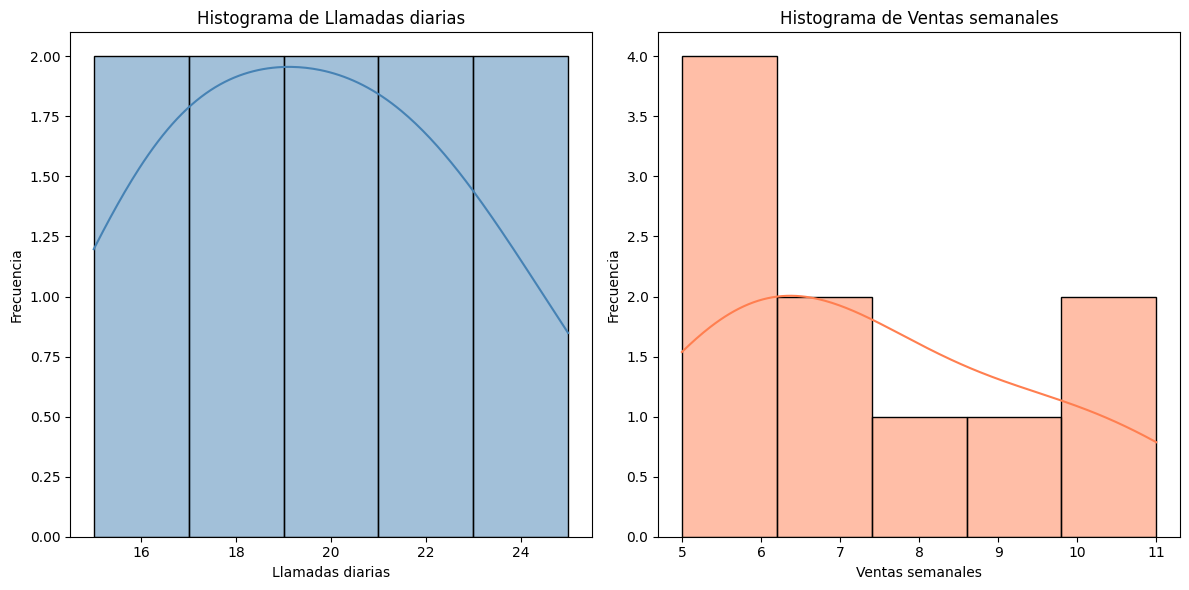

------------------------------
Generando Diagrama de Dispersión...


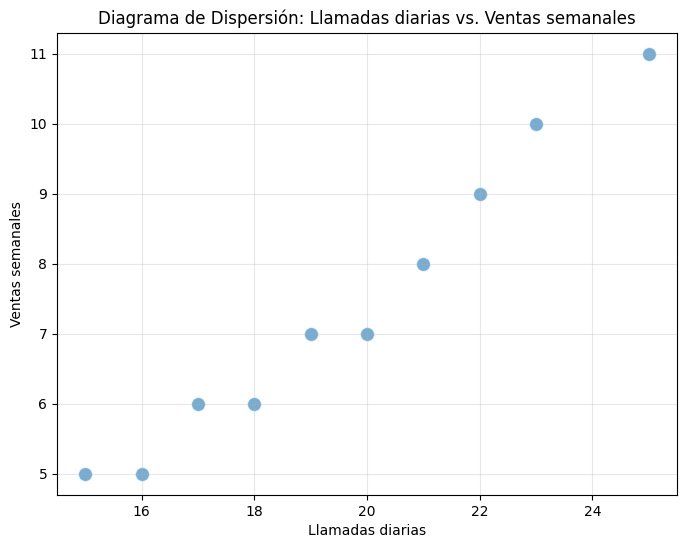

------------------------------
Realizando Pruebas de Normalidad...
Prueba Shapiro-Wilk para 'Llamadas diarias': Estadístico=0.981, p-valor=0.970
Prueba Shapiro-Wilk para 'Ventas semanales': Estadístico=0.930, p-valor=0.447

Interpretación de las pruebas de normalidad:
✓ La variable 'Llamadas diarias' parece seguir distribución normal (p > 0.05).
✓ La variable 'Ventas semanales' parece seguir distribución normal (p > 0.05).
------------------------------
Calculando Coeficientes de Correlación...
Coeficiente de correlación de Pearson: 0.9838
Coeficiente de correlación de Kendall: 0.9661
Coeficiente de correlación de Spearman: 0.9909
------------------------------
Determinando el coeficiente de correlación más apropiado...
✓ Ambas variables parecen normalmente distribuidas. El coeficiente de correlación de Pearson (0.9838) es el más apropiado.

--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---

Hipótesis:
H0: ρ = 0 (No existe correlación lineal)
H1: ρ ≠ 0 (Existe correlación 

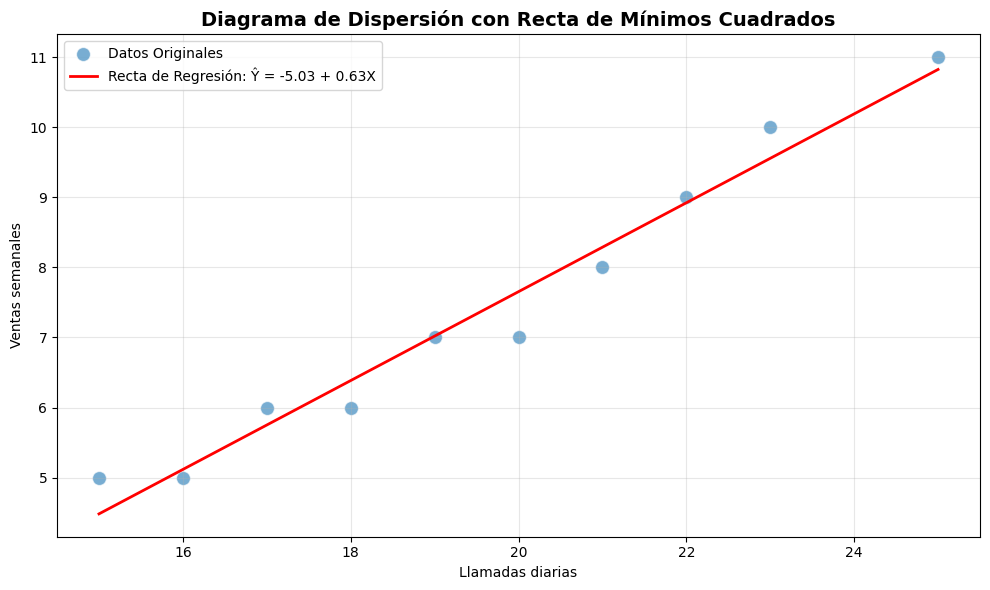


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β > 0 (Existe una relación lineal positiva significativa)

1. Cálculo del Error Estándar de Estimación (s_y,x):
   Σ(y - ŷ)² = 1.2359
   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = 0.3931

2. Cálculo del Error Estándar de la Pendiente (s_b):
   Σ(x - x̄)² = 92.4000
   s_b = s_y,x / √[Σ(x - x̄)²] = 0.0409

3. Cálculo del Estadístico t:
   t = (b₁ - 0) / s_b = (0.6342 - 0) / 0.0409
   t calculado = 15.5099

4. Parámetros de la Prueba:
   Nivel de significancia (α) = 0.05
   Grados de libertad (gl) = 8
   Valor crítico (t_0.05,8) = 1.8595
   Valor p (una cola) = 0.0000

----------------------------------------------------------------------
CRITERIO DE DECISIÓN:
----------------------------------------------------------------------
t calculado (15.5099) > t crítico (1.8595)
valor p (0.0000) < α (0.05)

DECISIÓN: RECHAZAR H0
INTERPRETACIÓN: ✓ La pendiente ES significativamente diferente de

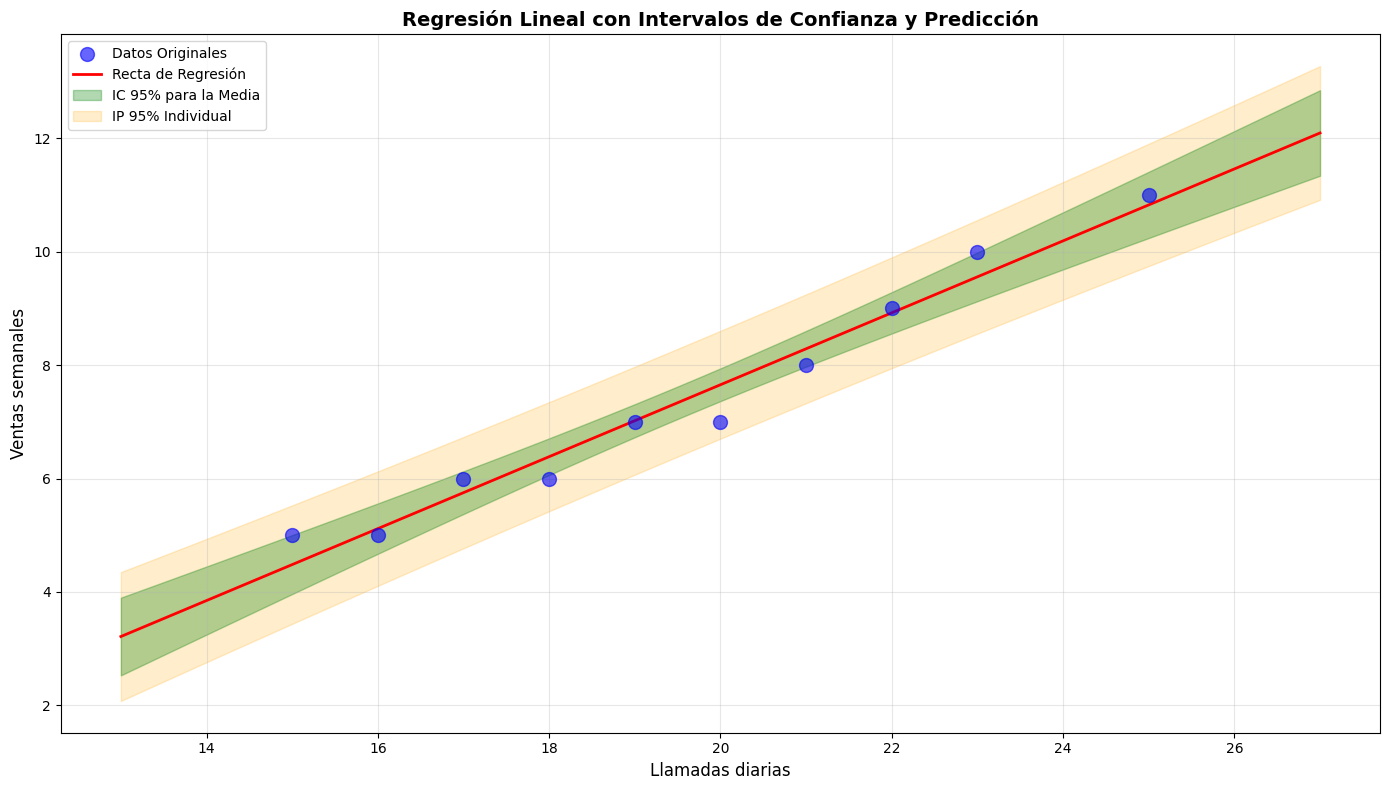

Visualización generada exitosamente!

--- ANÁLISIS DE RESIDUOS ---

Tabla de Residuos:

Empleado     X        Y        ŷ        Residuo    Res. Std. 
----------------------------------------------------------------------
Empleado 1   15       5        4.48     0.52       1.32      
Empleado 2   20       7        7.65     -0.65      -1.66     
Empleado 3   18       6        6.39     -0.39      -0.98     
Empleado 4   25       11       10.82    0.18       0.45      
Empleado 5   22       9        8.92     0.08       0.20      
Empleado 6   17       6        5.75     0.25       0.63      
Empleado 7   19       7        7.02     -0.02      -0.05     
Empleado 8   23       10       9.56     0.44       1.13      
Empleado 9   21       8        8.29     -0.29      -0.73     
Empleado 10  16       5        5.12     -0.12      -0.30     

Estadísticas de los Residuos:
  Media de residuos: 0.0000 (debe ser ≈ 0)
  Desviación estándar: 0.3706
  Residuo mínimo: -0.6537
  Residuo máximo: 0.5173


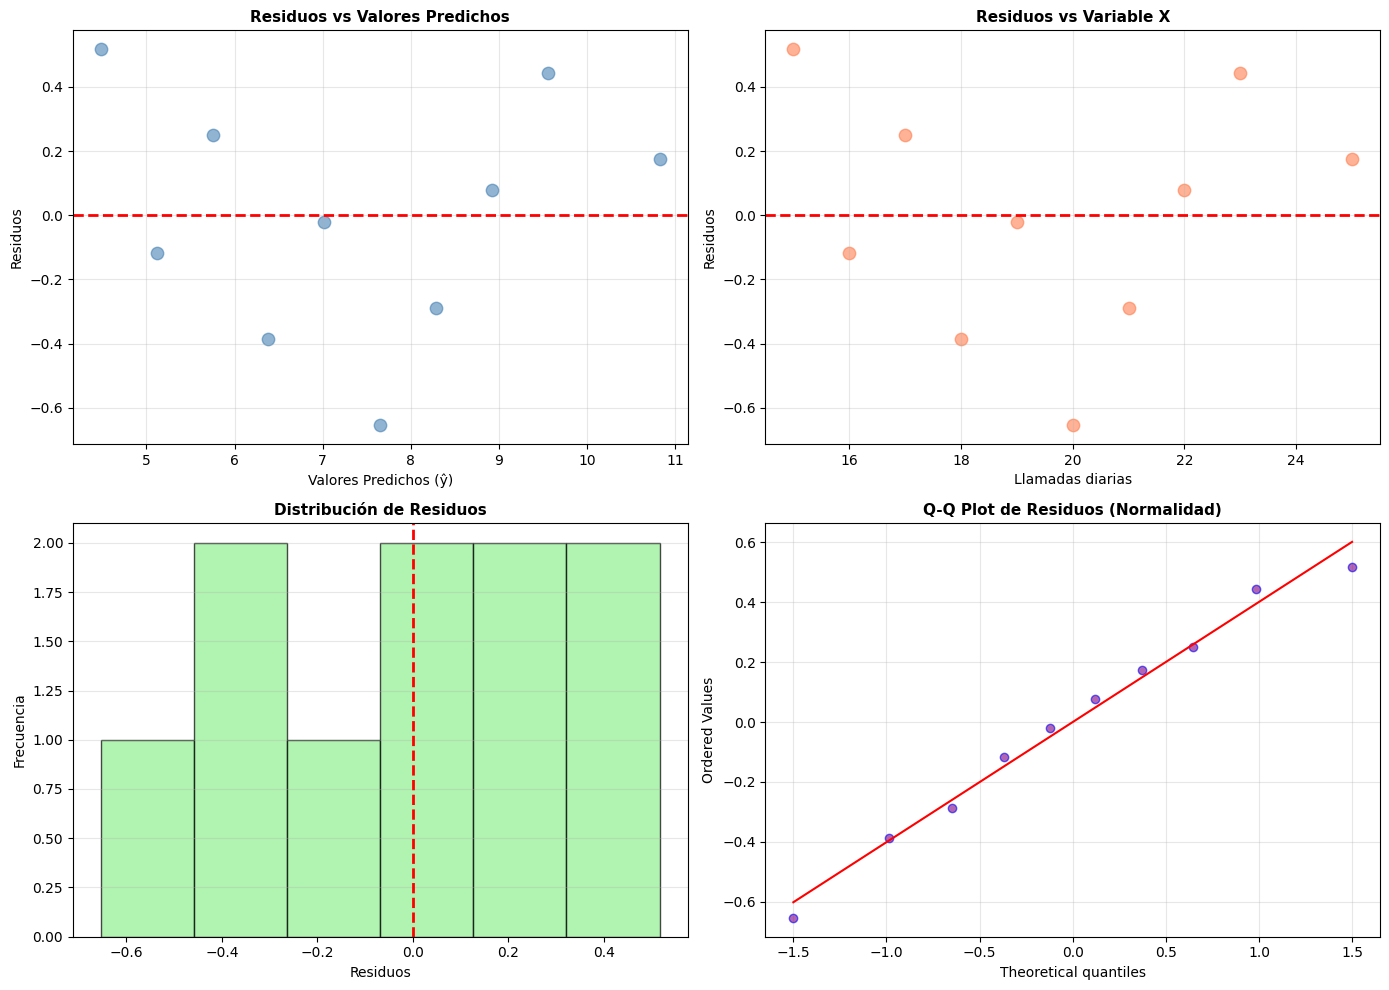


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.9779
  Valor p = 0.9531
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos:
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.


--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---

Criterios para evaluar si se necesita transformación:
----------------------------------------------------------------------

1. NORMALIDAD DE LAS VARIABLES:
   • Llamadas diarias: p-valor = 0.9697
     ✓ Distribución normal
   • Ventas semanales: p-valor = 0.4473
     ✓ Distribución normal

2. NORMALIDAD DE LOS RESIDUOS:
   • Residuos: p-valor = 0.9531
     ✓ Distribución normal

3. HOMOCEDASTICIDAD (Vari

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (COMPETENCIA DE VENTAS) ---
data = {
    'Empleado': [
        'Empleado 1', 'Empleado 2', 'Empleado 3', 'Empleado 4', 'Empleado 5',
        'Empleado 6', 'Empleado 7', 'Empleado 8', 'Empleado 9', 'Empleado 10'
    ],
    'Llamadas diarias': [15, 20, 18, 25, 22, 17, 19, 23, 21, 16],
    'Ventas semanales': [5, 7, 6, 11, 9, 6, 7, 10, 8, 5]
}
df = pd.DataFrame(data)

variable_x = 'Llamadas diarias'
variable_y = 'Ventas semanales'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Competencia de Ventas")
print("=" * 70)
print(f"\nDatos cargados: {n} empleados")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerando Histogramas...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral')
plt.title(f'Histograma de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot
print("Generando Diagrama de Dispersión...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# 3. Normality Tests (Shapiro-Wilk)
print("Realizando Pruebas de Normalidad...")
shapiro_test_calls = shapiro(df[variable_x])
print(f"Prueba Shapiro-Wilk para '{variable_x}': Estadístico={shapiro_test_calls.statistic:.3f}, p-valor={shapiro_test_calls.pvalue:.3f}")

shapiro_test_sold = shapiro(df[variable_y])
print(f"Prueba Shapiro-Wilk para '{variable_y}': Estadístico={shapiro_test_sold.statistic:.3f}, p-valor={shapiro_test_sold.pvalue:.3f}")

print("\nInterpretación de las pruebas de normalidad:")
if shapiro_test_calls.pvalue > alfa:
    print(f"✓ La variable '{variable_x}' parece seguir distribución normal (p > 0.05).")
else:
    print(f"✗ La variable '{variable_x}' no parece seguir distribución normal (p <= 0.05).")

if shapiro_test_sold.pvalue > alfa:
    print(f"✓ La variable '{variable_y}' parece seguir distribución normal (p > 0.05).")
else:
    print(f"✗ La variable '{variable_y}' no parece seguir distribución normal (p <= 0.05).")
print("-" * 30)

# 4. Calculate Correlation Coefficients
print("Calculando Coeficientes de Correlación...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"Coeficiente de correlación de Pearson: {pearson_corr:.4f}")
print(f"Coeficiente de correlación de Kendall: {kendall_corr:.4f}")
print(f"Coeficiente de correlación de Spearman: {spearman_corr:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determinando el coeficiente de correlación más apropiado...")
if shapiro_test_calls.pvalue > alfa and shapiro_test_sold.pvalue > alfa:
    print(f"✓ Ambas variables parecen normalmente distribuidas. El coeficiente de correlación de Pearson ({pearson_corr:.4f}) es el más apropiado.")
else:
     print(f"⚠ Al menos una variable no parece normalmente distribuida. El coeficiente de correlación de Spearman ({spearman_corr:.4f}) o Kendall ({kendall_corr:.4f}) son medidas no paramétricas más apropiadas.")
print("=" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

# Hipótesis: H0: rho = 0, H1: rho != 0 (Prueba de dos colas)
r = pearson_corr
gl = n - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r^2)
try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

# Valor p (two-sided)
valor_p = t.sf(abs(t_calculado), gl) * 2

# Valor crítico de t (para alfa/2)
t_critico_positivo = t.ppf(1 - alfa / 2, gl)
t_critico_negativo = -t_critico_positivo

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}): ±{t_critico_positivo:.4f}")
print(f"Valor p: {valor_p:.4f}")

# Criterio de Decisión
if valor_p < alfa:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = "✓ Existe una correlación lineal significativa (ρ ≠ 0)."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = "✗ No hay evidencia de una correlación lineal significativa (ρ = 0)."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

# Cálculo de la media de X y Y
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()

# 1. Cálculo de la PENDIENTE (b1)
# b1 = r * (Sy / Sx)
std_x = df[variable_x].std(ddof=1)  # Desviación estándar muestral
std_y = df[variable_y].std(ddof=1)  # Desviación estándar muestral
b1 = r * (std_y / std_x)

# 2. Cálculo de la INTERSECCIÓN CON EL EJE Y (b0)
# b0 = mean_y - b1 * mean_x
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f}")
print(f"Media de Y (ȳ): {mean_y:.2f}")
print(f"Desviación estándar de X (Sx): {std_x:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0:.4f} + {b1:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)

# --- Visualización de la Recta de Regresión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, label='Datos Originales', s=100, alpha=0.6)

# Crear la línea de regresión
x_min = df[variable_x].min()
x_max = df[variable_x].max()
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line

plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0:.2f} + {b1:.2f}X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

# Hipótesis:
# H0: β = 0 (La pendiente no es significativamente diferente de cero)
# H1: β > 0 (La pendiente es significativamente mayor que cero)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β > 0 (Existe una relación lineal positiva significativa)")

# Calcular valores predichos (ŷ)
df['y_predicho'] = b0 + b1 * df[variable_x]

# Calcular el Error Estándar de Estimación (s_y,x)
diferencias_cuadradas = (df[variable_y] - df['y_predicho']) ** 2
suma_diferencias_cuadradas = diferencias_cuadradas.sum()
s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))

print(f"\n1. Cálculo del Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas:.4f}")
print(f"   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = {s_yx:.4f}")

# Calcular el Error Estándar de la Pendiente (s_b)
desviaciones_x = (df[variable_x] - mean_x) ** 2
suma_desviaciones_x = desviaciones_x.sum()
s_b = s_yx / np.sqrt(suma_desviaciones_x)

print(f"\n2. Cálculo del Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x:.4f}")
print(f"   s_b = s_y,x / √[Σ(x - x̄)²] = {s_b:.4f}")

# Calcular el estadístico t
t_calculado_pendiente = (b1 - 0) / s_b

print(f"\n3. Cálculo del Estadístico t:")
print(f"   t = (b₁ - 0) / s_b = ({b1:.4f} - 0) / {s_b:.4f}")
print(f"   t calculado = {t_calculado_pendiente:.4f}")

# Grados de libertad
gl_pendiente = n - 2

# Valor crítico (prueba de una cola, cola derecha)
t_critico_pendiente = t.ppf(1 - alfa, gl_pendiente)

# Valor p (prueba de una cola)
valor_p_pendiente = t.sf(t_calculado_pendiente, gl_pendiente)

print(f"\n4. Parámetros de la Prueba:")
print(f"   Nivel de significancia (α) = {alfa}")
print(f"   Grados de libertad (gl) = {gl_pendiente}")
print(f"   Valor crítico (t_{alfa},{gl_pendiente}) = {t_critico_pendiente:.4f}")
print(f"   Valor p (una cola) = {valor_p_pendiente:.4f}")

# Criterio de Decisión
print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p_pendiente < alfa:
    decision_pendiente = "RECHAZAR H0"
    interpretacion = "✓ La pendiente ES significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) < α ({alfa}), rechazamos la hipótesis nula.
    Esto significa que existe evidencia estadística suficiente para concluir que
    el número de llamadas diarias tiene un efecto significativo POSITIVO sobre
    las ventas semanales logradas.

    En términos prácticos: Por cada llamada diaria adicional, se espera un
    incremento de {b1:.4f} ventas semanales, y este efecto es estadísticamente
    significativo.
    """
else:
    decision_pendiente = "NO RECHAZAR H0"
    interpretacion = "✗ La pendiente NO es significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) ≥ α ({alfa}), no rechazamos la hipótesis nula.
    No hay evidencia estadística suficiente para concluir que el número de llamadas
    diarias tenga un efecto significativo sobre las ventas semanales.
    """

print(f"t calculado ({t_calculado_pendiente:.4f}) {'>' if t_calculado_pendiente > t_critico_pendiente else '<'} t crítico ({t_critico_pendiente:.4f})")
print(f"valor p ({valor_p_pendiente:.4f}) {'<' if valor_p_pendiente < alfa else '≥'} α ({alfa})")
print(f"\nDECISIÓN: {decision_pendiente}")
print(f"INTERPRETACIÓN: {interpretacion}")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL:")
print("=" * 70)
print(conclusion_pendiente)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

# Cálculo de R²
SSE = suma_diferencias_cuadradas
SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE

r_cuadrado = 1 - (SSE / SS_Total)

print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE:.4f}")

print(f"\nCálculo de R²:")
print(f"  R² = 1 - (SSE / SS Total)")
print(f"  R² = 1 - ({SSE:.4f} / {SS_Total:.4f})")
print(f"  R² = {r_cuadrado:.4f}")

print(f"\nVerificación: R² = r² = ({r:.4f})² = {r**2:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado*100:.2f}% de la variabilidad en las ventas              │")
print(f"│  semanales puede ser explicada por el número de                 │")
print(f"│  llamadas diarias realizadas.                                   │")
print(f"└─────────────────────────────────────────────────────────────────┘")

print("\n" + "=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

# Calcular cuadrados medios
MSR = SSR / 1
MSE = SSE / (n - 2)

# Estadístico F
F_calculado = MSR / MSE

# Valor p del estadístico F
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calculado:<15.4f} {valor_p_f:<15.6f}")
print(f"{'Error':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SS_Total:<15.4f} {n-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f < alfa:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f:.6f} < {alfa})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f:.6f} ≥ {alfa})")
    print("  El modelo NO es útil para hacer predicciones.")

print("=" * 70)

# =========================================================================
# --- PARTE 4: INTERVALOS DE CONFIANZA Y PREDICCIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---")
print("=" * 70)

# Valor crítico t para intervalos (dos colas)
t_critico_intervalo = t.ppf(1 - alfa/2, gl_pendiente)
print(f"\nValor crítico t para intervalos (α={alfa}, gl={gl_pendiente}): ±{t_critico_intervalo:.4f}")

# =========================================================================
# A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1/n + (x - x̄)² / Σ(x - x̄)²]")

# Valores de ejemplo para calcular intervalos
valores_x_ejemplo = [15, 18, 20, 23, 25]

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de confianza para la MEDIA de ventas semanales:\n")
print(f"{'X (Llamadas)':<15} {'ŷ (Predicción)':<20} {'Intervalo de Confianza':<35}")
print("-" * 70)

intervalos_confianza = []
for x_val in valores_x_ejemplo:
    y_pred = b0 + b1 * x_val
    termino_error = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error
    limite_inferior_conf = y_pred - margen_conf
    limite_superior_conf = y_pred + margen_conf

    intervalos_confianza.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_conf,
        'limite_sup': limite_superior_conf
    })

    print(f"{x_val:<15} {y_pred:<20.2f} [{limite_inferior_conf:.2f}, {limite_superior_conf:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, cuando se realizan X llamadas diarias,")
print("la MEDIA de ventas semanales estará dentro del intervalo calculado.")

# =========================================================================
# B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1 + 1/n + (x - x̄)² / Σ(x - x̄)²]")

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de predicción para ventas semanales INDIVIDUALES:\n")
print(f"{'X (Llamadas)':<15} {'ŷ (Predicción)':<20} {'Intervalo de Predicción':<35}")
print("-" * 70)

intervalos_prediccion = []
for x_val in valores_x_ejemplo:
    y_pred = b0 + b1 * x_val
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    limite_inferior_pred = y_pred - margen_pred
    limite_superior_pred = y_pred + margen_pred

    intervalos_prediccion.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_pred,
        'limite_sup': limite_superior_pred
    })

    print(f"{x_val:<15} {y_pred:<20.2f} [{limite_inferior_pred:.2f}, {limite_superior_pred:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, cuando se realizan X llamadas diarias,")
print("una observación INDIVIDUAL de ventas semanales estará dentro del intervalo calculado.")

# =========================================================================
# COMPARACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("COMPARACIÓN: INTERVALO DE CONFIANZA vs INTERVALO DE PREDICCIÓN")
print("=" * 70)

print("\n📊 Diferencias clave:")
print("\n1. INTERVALO DE CONFIANZA (para la media):")
print("   - Más ESTRECHO")
print("   - Estima dónde está la MEDIA de Y para un valor dado de X")
print("   - Útil para entender la relación promedio")

print("\n2. INTERVALO DE PREDICCIÓN (para un valor individual):")
print("   - Más AMPLIO")
print("   - Predice dónde estará una OBSERVACIÓN INDIVIDUAL de Y")
print("   - Útil para hacer predicciones específicas")

print("\n3. ¿Por qué el intervalo de predicción es más amplio?")
print("   - Incluye la incertidumbre de la media (como el de confianza)")
print("   - ADEMÁS incluye la variabilidad individual alrededor de esa media")

# =========================================================================
# VISUALIZACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("Generando visualización de intervalos...")

plt.figure(figsize=(14, 8))

# Datos originales
plt.scatter(df[variable_x], df[variable_y],
           color='blue', s=100, alpha=0.6, label='Datos Originales', zorder=3)

# Recta de regresión
x_range = np.linspace(df[variable_x].min() - 2, df[variable_x].max() + 2, 100)
y_range = b0 + b1 * x_range
plt.plot(x_range, y_range, 'r-', linewidth=2, label='Recta de Regresión', zorder=2)

# Calcular intervalos para todo el rango
ic_lower = []
ic_upper = []
ip_lower = []
ip_upper = []

for x_val in x_range:
    y_pred = b0 + b1 * x_val

    # Intervalo de confianza
    termino_error_conf = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error_conf
    ic_lower.append(y_pred - margen_conf)
    ic_upper.append(y_pred + margen_conf)

    # Intervalo de predicción
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    ip_lower.append(y_pred - margen_pred)
    ip_upper.append(y_pred + margen_pred)

# Graficar intervalos
plt.fill_between(x_range, ic_lower, ic_upper,
                alpha=0.3, color='green',
                label=f'IC {(1-alfa)*100:.0f}% para la Media', zorder=1)

plt.fill_between(x_range, ip_lower, ip_upper,
                alpha=0.2, color='orange',
                label=f'IP {(1-alfa)*100:.0f}% Individual', zorder=0)

plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.title('Regresión Lineal con Intervalos de Confianza y Predicción', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualización generada exitosamente!")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

# Calcular residuos
df['residuos'] = df[variable_y] - df['y_predicho']
df['residuos_estandarizados'] = df['residuos'] / s_yx

print("\nTabla de Residuos:")
print(f"\n{'Empleado':<12} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 70)
for idx, row in df.iterrows():
    print(f"{row['Empleado']:<12} {row[variable_x]:<8} {row[variable_y]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

# Estadísticas de residuos
print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df['residuos'].min():.4f}")
print(f"  Residuo máximo: {df['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df['residuos'], bins=6, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos.pvalue:.4f}")

if shapiro_residuos.pvalue > alfa:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos:")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")

print("\n" + "=" * 70)

# =========================================================================
# --- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---")
print("=" * 70)

print("\nCriterios para evaluar si se necesita transformación:")
print("-" * 70)

# 1. Normalidad de las variables
print("\n1. NORMALIDAD DE LAS VARIABLES:")
print(f"   • {variable_x}: p-valor = {shapiro_test_calls.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_calls.pvalue > alfa else '✗ No normal'}")
print(f"   • {variable_y}: p-valor = {shapiro_test_sold.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_sold.pvalue > alfa else '✗ No normal'}")

# 2. Normalidad de residuos
print(f"\n2. NORMALIDAD DE LOS RESIDUOS:")
print(f"   • Residuos: p-valor = {shapiro_residuos.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_residuos.pvalue > alfa else '✗ No normal'}")

# 3. Homocedasticidad
print(f"\n3. HOMOCEDASTICIDAD (Varianza constante):")
print(f"   • Revisar gráfico 'Residuos vs Valores Predichos'")
print(f"   • Si los residuos muestran patrón de embudo o cono → transformar")
print(f"   • Si los residuos están distribuidos aleatoriamente → no transformar")

# 4. Linealidad
print(f"\n4. LINEALIDAD DE LA RELACIÓN:")
print(f"   • Revisar diagrama de dispersión X vs Y")
print(f"   • Coeficiente de correlación: r = {r:.4f}")
print(f"     {'✓ Relación lineal adecuada' if abs(r) > 0.6 else '⚠ Relación débil, considerar transformación'}")

# 5. Valores atípicos
residuos_estandarizados_abs = np.abs(df['residuos_estandarizados'])
outliers = df[residuos_estandarizados_abs > 2.5]
print(f"\n5. VALORES ATÍPICOS:")
print(f"   • Número de residuos estandarizados > 2.5: {len(outliers)}")
if len(outliers) > 0:
    print(f"   • Empleados con residuos atípicos:")
    for idx, row in outliers.iterrows():
        print(f"     - {row['Empleado']}: residuo std = {row['residuos_estandarizados']:.2f}")

# Decisión final
print("\n" + "=" * 70)
print("DECISIÓN SOBRE TRANSFORMACIÓN:")
print("=" * 70)

necesita_transformacion = False
razones_transformacion = []

if shapiro_test_calls.pvalue <= alfa or shapiro_test_sold.pvalue <= alfa:
    razones_transformacion.append("- Variables originales no son normales")
    necesita_transformacion = True

if shapiro_residuos.pvalue <= alfa:
    razones_transformacion.append("- Residuos no siguen distribución normal")
    necesita_transformacion = True

if abs(r) < 0.5:
    razones_transformacion.append("- Correlación lineal débil (r < 0.5)")
    necesita_transformacion = True

if len(outliers) > n * 0.15:
    razones_transformacion.append(f"- Exceso de valores atípicos ({len(outliers)} casos)")
    necesita_transformacion = True

if necesita_transformacion:
    print("\n⚠ SE RECOMIENDA CONSIDERAR TRANSFORMACIÓN DE DATOS\n")
    print("Razones:")
    for razon in razones_transformacion:
        print(f"  {razon}")

    print("\nTransformaciones sugeridas:")
    print("  • Logarítmica: Y' = log(Y) o X' = log(X)")
    print("    └─ Útil para reducir asimetría positiva y estabilizar varianza")
    print("  • Raíz cuadrada: Y' = √Y")
    print("    └─ Útil para datos de conteo con varianza proporcional a la media")
    print("  • Recíproca: Y' = 1/Y")
    print("    └─ Útil para relaciones no lineales decrecientes")
    print("  • Box-Cox: Encuentra la transformación óptima automáticamente")

    print("\n  IMPORTANTE: Después de transformar, repetir todo el análisis")
    print("  con los datos transformados y comparar resultados.")

else:
    print("\n✓ NO ES NECESARIA LA TRANSFORMACIÓN DE DATOS\n")
    print("Justificación:")

    if shapiro_test_calls.pvalue > alfa and shapiro_test_sold.pvalue > alfa:
        print("  ✓ Las variables originales son aproximadamente normales")

    if shapiro_residuos.pvalue > alfa:
        print("  ✓ Los residuos siguen una distribución normal")

    if abs(r) >= 0.6:
        print(f"  ✓ La correlación lineal es adecuada (r = {r:.4f})")

    if len(outliers) <= n * 0.15:
        print(f"  ✓ Número aceptable de valores atípicos ({len(outliers)} casos)")

    print("\n  El modelo de regresión lineal simple es apropiado para estos datos")
    print("  sin necesidad de transformaciones. Los supuestos fundamentales se")
    print("  cumplen razonablemente bien.")

print("\n" + "=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO DEL ANÁLISIS ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0:.4f} + {b1:.4f} × X

   Interpretación:
   • El punto de partida (b₀) es {b0:.2f} ventas semanales
   • Por cada llamada diaria adicional, aumentan {b1:.4f} ventas semanales

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): {r:.4f}
     └─ Correlación {'fuerte' if abs(r) > 0.7 else 'moderada' if abs(r) > 0.4 else 'débil'} {'positiva' if r > 0 else 'negativa'}

   • Coeficiente de determinación (R²): {r_cuadrado:.4f}
     └─ {r_cuadrado*100:.2f}% de la variabilidad explicada

   • Error estándar de estimación (s_y,x): {s_yx:.4f}
     └─ Error típico de predicción: ±{s_yx:.2f} ventas

✅ PRUEBAS DE SIGNIFICANCIA (α = {alfa}):

   1. Correlación:
      • Estadístico t: {t_calculado:.4f}
      • Valor p: {valor_p:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p < alfa else '✗ NO SIGNIFICATIVA'}

   2. Pendiente:
      • Estadístico t: {t_calculado_pendiente:.4f}
      • Valor p: {valor_p_pendiente:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_pendiente < alfa else '✗ NO SIGNIFICATIVA'}

   3. Modelo (ANOVA):
      • Estadístico F: {F_calculado:.4f}
      • Valor p: {valor_p_f:.6f}
      • Decisión: {'✓ MODELO SIGNIFICATIVO' if valor_p_f < alfa else '✗ MODELO NO SIGNIFICATIVO'}

🔍 VALIDACIÓN DE SUPUESTOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_residuos.pvalue > alfa else '⚠ NO CUMPLE'} (p = {shapiro_residuos.pvalue:.4f})
   • Linealidad: ✓ Verificar gráfico de dispersión
   • Homocedasticidad: ✓ Verificar gráfico de residuos

💡 CONCLUSIÓN GENERAL:
""")

if valor_p_pendiente < alfa and valor_p_f < alfa:
    print(f"""   ✓ EL MODELO ES VÁLIDO Y ÚTIL PARA PREDICCIONES

   El número de llamadas diarias es un predictor SIGNIFICATIVO de las
   ventas semanales logradas. El modelo explica {r_cuadrado*100:.2f}% de la
   variabilidad y puede utilizarse con confianza para:

   • Predecir ventas futuras basadas en llamadas planificadas
   • Establecer objetivos de llamadas para alcanzar metas de ventas
   • Evaluar el rendimiento de los empleados en la competencia

   Recomendación: IMPLEMENTAR este modelo en la estrategia de ventas.
""")
else:
    print(f"""   ⚠ EL MODELO TIENE LIMITACIONES

   Aunque existe una relación entre llamadas y ventas, el modelo
   presenta algunas limitaciones estadísticas. Se recomienda:

   • Recolectar más datos para mejorar el modelo
   • Considerar otras variables explicativas
   • Realizar análisis adicionales antes de implementar decisiones
""")

print("\n" + "=" * 70)
print("📌 NOTA: Revise todos los gráficos generados para una interpretación")
print("   completa de los resultados y validación de supuestos.")
print("=" * 70)

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: The Cotton Mill (Expansión de Tiendas)

Datos cargados: 23 tiendas (de 3 regiones)
Variable independiente (X): Tamaño de la tienda
Variable dependiente (Y): Ventas
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generando Histogramas...


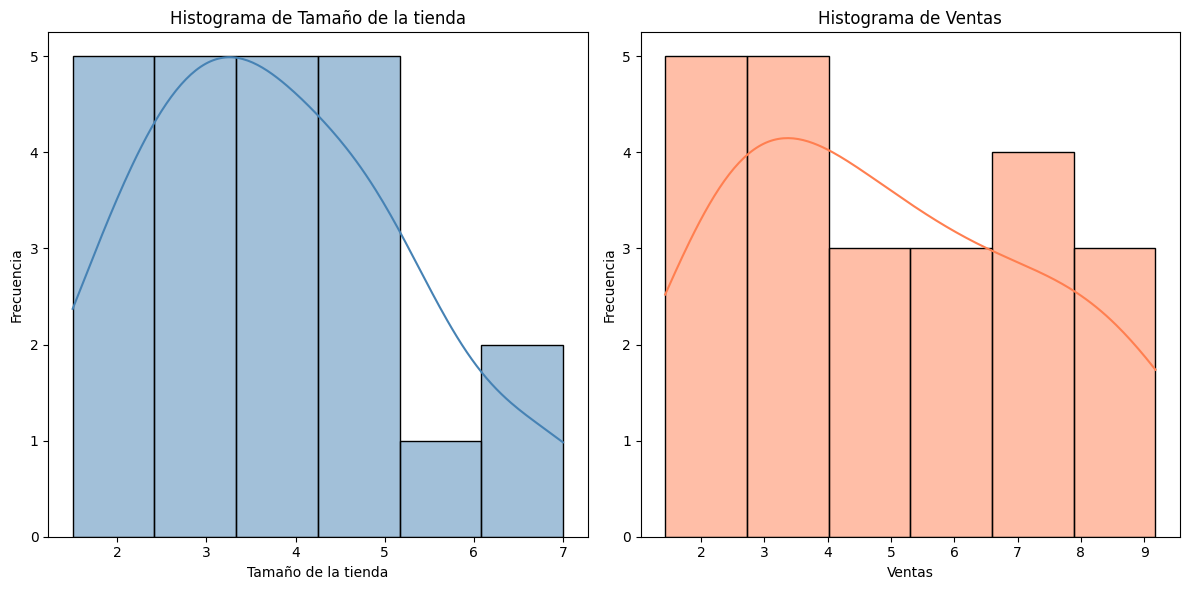

------------------------------
Generando Diagrama de Dispersión...


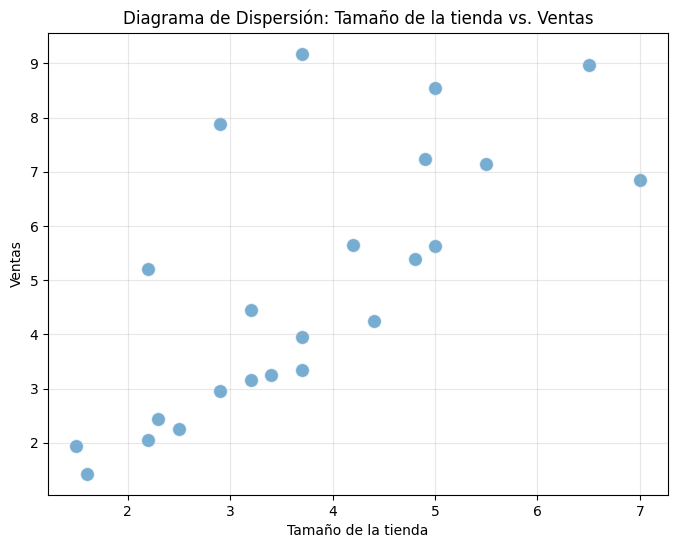

------------------------------
(a) Respuesta: ¿Parece positiva la relación?
    Sí, el diagrama de dispersión muestra una clara tendencia
    positiva: a medida que el 'Tamaño de la tienda' (X) aumenta,
    las 'Ventas' (Y) también tienden a aumentar.
------------------------------
Realizando Pruebas de Normalidad...
Prueba Shapiro-Wilk para 'Tamaño de la tienda': Estadístico=0.965, p-valor=0.560
Prueba Shapiro-Wilk para 'Ventas': Estadístico=0.940, p-valor=0.177

Interpretación de las pruebas de normalidad:
✓ La variable 'Tamaño de la tienda' parece seguir distribución normal (p > 0.05).
✓ La variable 'Ventas' parece seguir distribución normal (p > 0.05).
------------------------------
Calculando Coeficientes de Correlación...
Coeficiente de correlación de Pearson: 0.7138
Coeficiente de correlación de Kendall: 0.6173
Coeficiente de correlación de Spearman: 0.7500
------------------------------
Determinando el coeficiente de correlación más apropiado...
✓ Ambas variables parecen normal

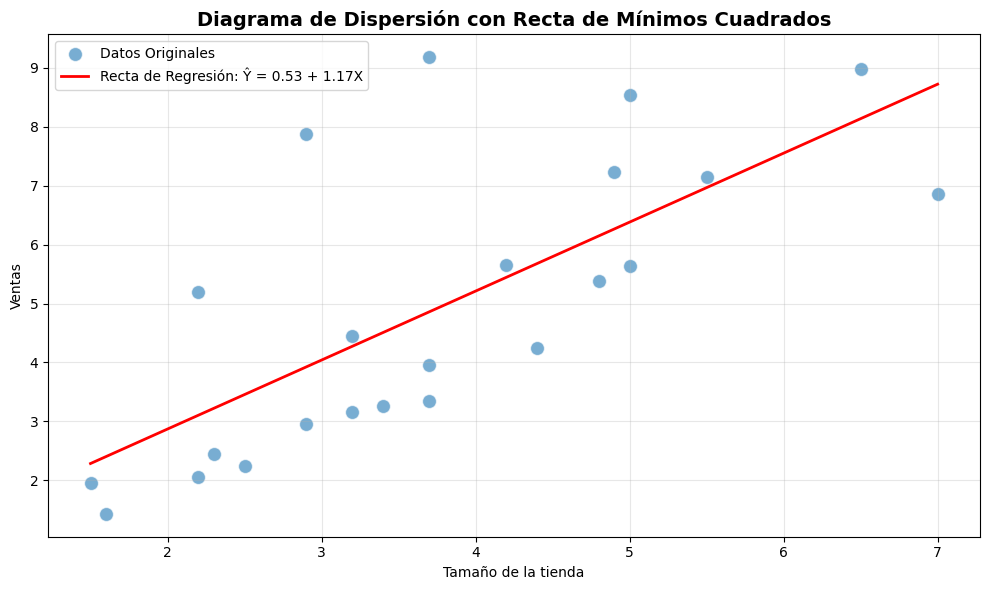


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β > 0 (Existe una relación lineal positiva significativa)

1. Cálculo del Error Estándar de Estimación (s_y,x):
   Σ(y - ŷ)² = 62.9084
   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = 1.7308

2. Cálculo del Error Estándar de la Pendiente (s_b):
   Σ(x - x̄)² = 47.6974
   s_b = s_y,x / √[Σ(x - x̄)²] = 0.2506

3. Cálculo del Estadístico t:
   t = (b₁ - 0) / s_b = (1.1703 - 0) / 0.2506
   t calculado = 4.6700

4. Parámetros de la Prueba:
   Nivel de significancia (α) = 0.05
   Grados de libertad (gl) = 21
   Valor crítico (t_0.05,21) = 1.7207
   Valor p (una cola) = 6.5550e-05

----------------------------------------------------------------------
CRITERIO DE DECISIÓN:
----------------------------------------------------------------------
t calculado (4.6700) > t crítico (1.7207)
valor p (6.5550e-05) < α (0.05)

DECISIÓN: RECHAZAR H0
INTERPRETACIÓN: ✓ La pendiente ES significativamente dif

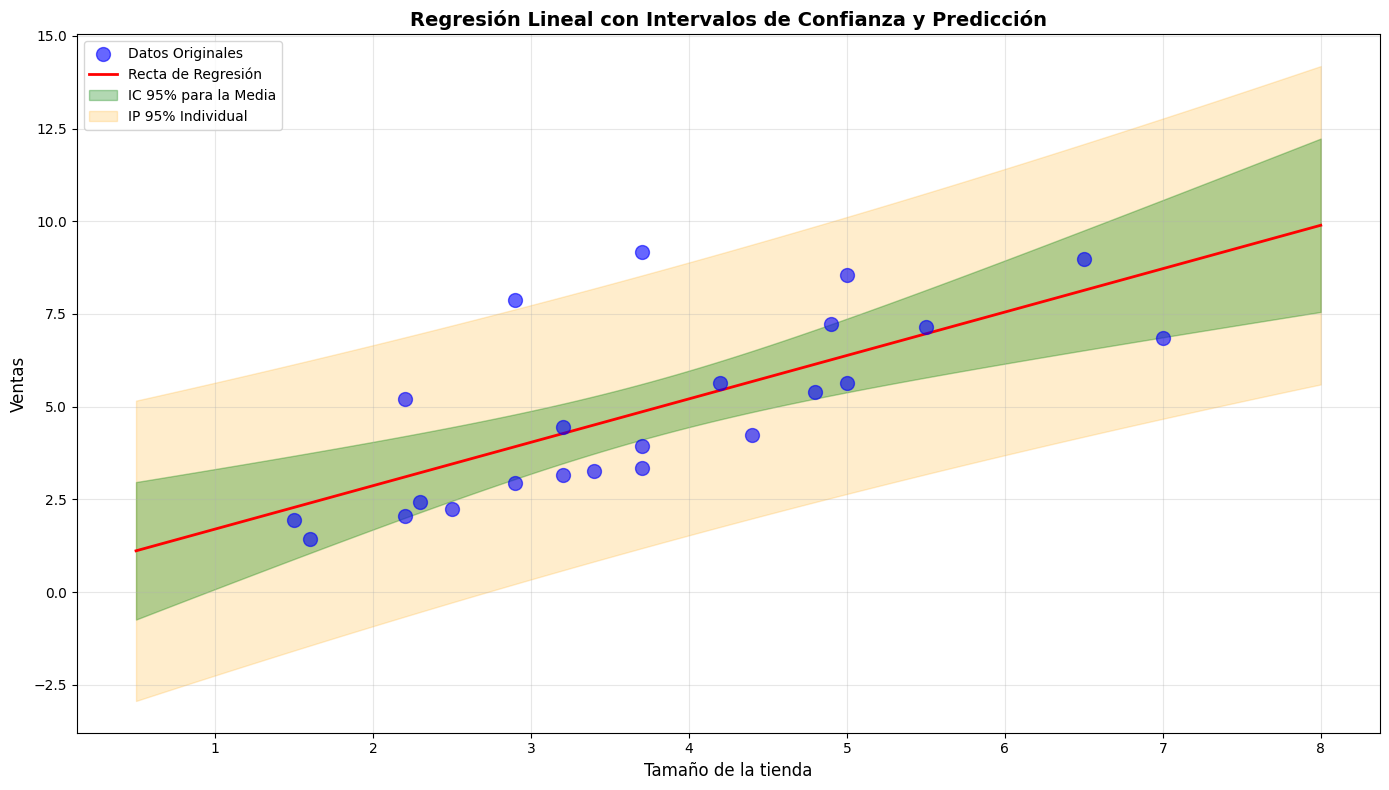

Visualización generada exitosamente!

--- ANÁLISIS DE RESIDUOS ---

Tabla de Residuos:

Tienda       X        Y        ŷ        Residuo    Res. Std. 
----------------------------------------------------------------------
Tienda 1     3.7      9.18     4.86     4.32       2.50      
Tienda 2     5.0      8.54     6.38     2.16       1.25      
Tienda 3     7.0      6.85     8.72     -1.87      -1.08     
Tienda 4     6.5      8.98     8.14     0.84       0.49      
Tienda 5     2.2      5.2      3.10     2.10       1.21      
Tienda 6     5.5      7.15     6.97     0.18       0.11      
Tienda 7     2.9      7.88     3.92     3.96       2.29      
Tienda 8     4.2      5.65     5.44     0.21       0.12      
Tienda 9     3.4      3.26     4.51     -1.25      -0.72     
Tienda 10    2.5      2.25     3.45     -1.20      -0.70     
Tienda 11    1.5      1.95     2.28     -0.33      -0.19     
Tienda 12    3.7      3.34     4.86     -1.52      -0.88     
Tienda 13    4.9      7.23     6.26

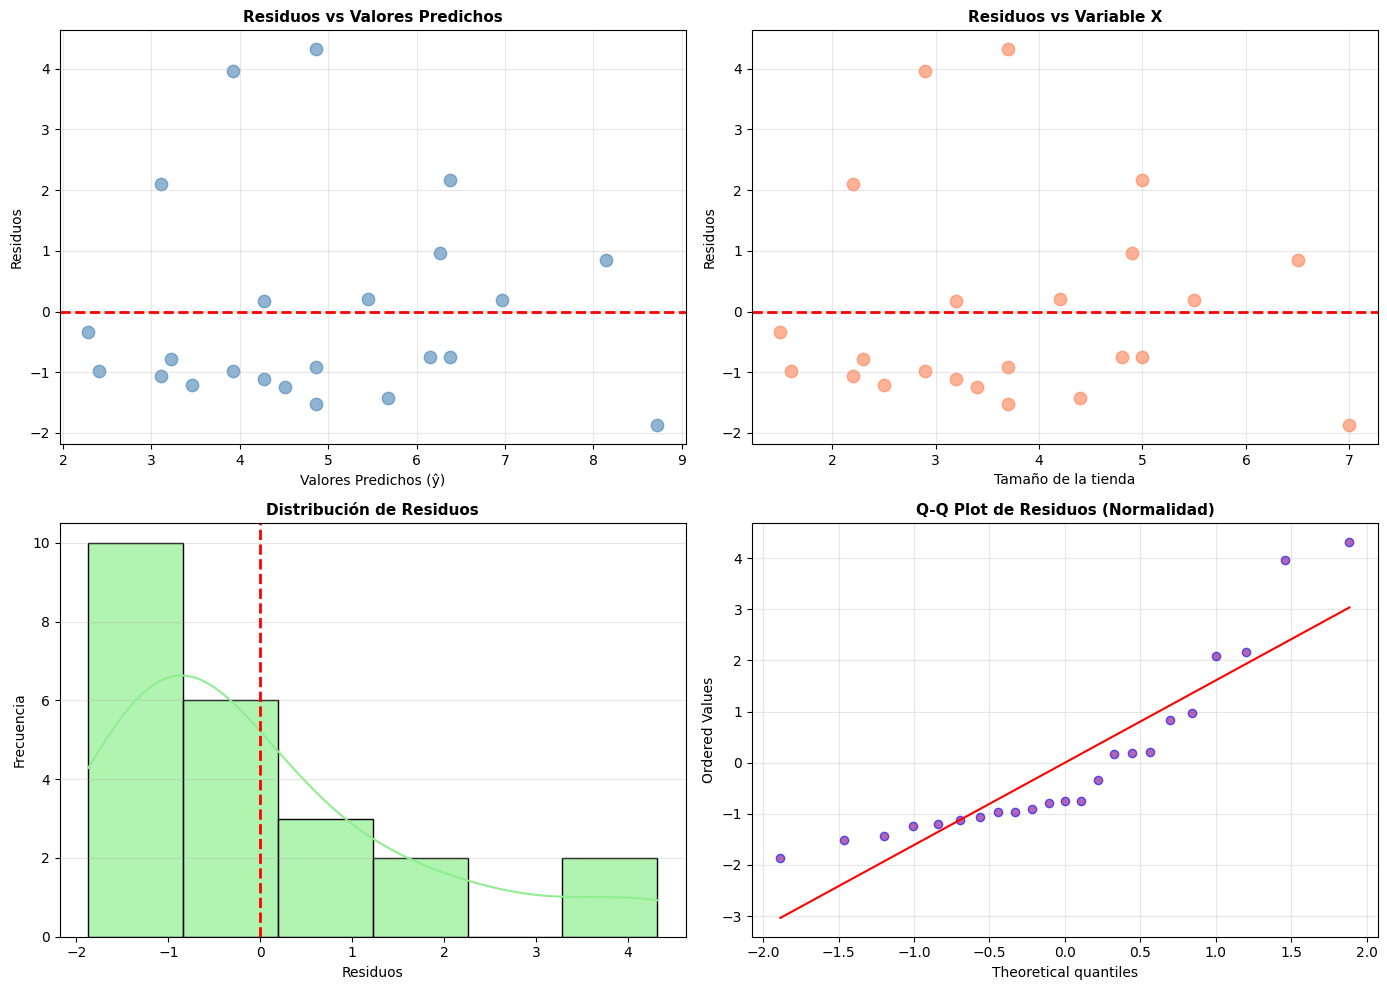


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.8257
  Valor p = 0.0010
  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ 0.05)
    El supuesto de normalidad puede no cumplirse.

Interpretación de los gráficos de residuos:
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.


--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---

Criterios para evaluar si se necesita transformación:
----------------------------------------------------------------------

1. NORMALIDAD DE LAS VARIABLES:
   • Tamaño de la tienda: p-valor = 0.5600
     ✓ Distribución normal
   • Ventas: p-valor = 0.1772
     ✓ Distribución normal

2. NORMALIDAD DE LOS RESIDUOS:
   • Residuos: p-valor = 0.0010
     ✗ No normal

3. HOMOCEDASTICIDAD (Varianza 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (THE COTTON MILL) ---
# Datos combinados de las 3 regiones (7 + 7 + 9 = 23 tiendas)
data = {
    'Tienda': [
        'Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4', 'Tienda 5', 'Tienda 6', 'Tienda 7',
        'Tienda 8', 'Tienda 9', 'Tienda 10', 'Tienda 11', 'Tienda 12', 'Tienda 13', 'Tienda 14',
        'Tienda 15', 'Tienda 16', 'Tienda 17', 'Tienda 18', 'Tienda 19', 'Tienda 20', 'Tienda 21',
        'Tienda 22', 'Tienda 23'
    ],
    'Tamaño de la tienda': [
        3.7, 5.0, 7.0, 6.5, 2.2, 5.5, 2.9, # Región 1
        4.2, 3.4, 2.5, 1.5, 3.7, 4.9, 3.2, # Región 2
        2.2, 1.6, 2.3, 2.9, 3.2, 3.7, 4.4, 4.8, 5.0 # Región 3
    ],
    'Ventas': [
        9.18, 8.54, 6.85, 8.98, 5.20, 7.15, 7.88, # Región 1
        5.65, 3.26, 2.25, 1.95, 3.34, 7.23, 4.45, # Región 2
        2.05, 1.43, 2.44, 2.95, 3.16, 3.95, 4.25, 5.39, 5.64 # Región 3
    ]
}
df = pd.DataFrame(data)

# Actualizamos las variables del problema
variable_x = 'Tamaño de la tienda' # (en miles de pies cuadrados)
variable_y = 'Ventas' # (en millones, presumiblemente)
n = len(df)
alfa = 0.05 # Mantenemos el mismo nivel de significancia

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: The Cotton Mill (Expansión de Tiendas)")
print("=" * 70)
print(f"\nDatos cargados: {n} tiendas (de 3 regiones)")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerando Histogramas...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral')
plt.title(f'Histograma de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot
print("Generando Diagrama de Dispersión...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)
print("(a) Respuesta: ¿Parece positiva la relación?")
print("    Sí, el diagrama de dispersión muestra una clara tendencia")
print("    positiva: a medida que el 'Tamaño de la tienda' (X) aumenta,")
print("    las 'Ventas' (Y) también tienden a aumentar.")
print("-" * 30)


# 3. Normality Tests (Shapiro-Wilk)
print("Realizando Pruebas de Normalidad...")
shapiro_test_size = shapiro(df[variable_x])
print(f"Prueba Shapiro-Wilk para '{variable_x}': Estadístico={shapiro_test_size.statistic:.3f}, p-valor={shapiro_test_size.pvalue:.3f}")

shapiro_test_sales = shapiro(df[variable_y])
print(f"Prueba Shapiro-Wilk para '{variable_y}': Estadístico={shapiro_test_sales.statistic:.3f}, p-valor={shapiro_test_sales.pvalue:.3f}")

print("\nInterpretación de las pruebas de normalidad:")
if shapiro_test_size.pvalue > alfa:
    print(f"✓ La variable '{variable_x}' parece seguir distribución normal (p > 0.05).")
else:
    print(f"✗ La variable '{variable_x}' no parece seguir distribución normal (p <= 0.05).")

if shapiro_test_sales.pvalue > alfa:
    print(f"✓ La variable '{variable_y}' parece seguir distribución normal (p > 0.05).")
else:
    print(f"✗ La variable '{variable_y}' no parece seguir distribución normal (p <= 0.05).")
print("-" * 30)

# 4. Calculate Correlation Coefficients
print("Calculando Coeficientes de Correlación...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"Coeficiente de correlación de Pearson: {pearson_corr:.4f}")
print(f"Coeficiente de correlación de Kendall: {kendall_corr:.4f}")
print(f"Coeficiente de correlación de Spearman: {spearman_corr:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determinando el coeficiente de correlación más apropiado...")
if shapiro_test_size.pvalue > alfa and shapiro_test_sales.pvalue > alfa:
    print(f"✓ Ambas variables parecen normalmente distribuidas. El coeficiente de correlación de Pearson ({pearson_corr:.4f}) es el más apropiado.")
else:
     print(f"⚠ Al menos una variable no parece normally distribuida. El coeficiente de correlación de Spearman ({spearman_corr:.4f}) o Kendall ({kendall_corr:.4f}) son medidas no paramétricas más apropiadas.")
print("=" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

# Hipótesis: H0: rho = 0, H1: rho != 0 (Prueba de dos colas)
r = pearson_corr
gl = n - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r^2)
try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

# Valor p (two-sided)
valor_p = t.sf(abs(t_calculado), gl) * 2

# Valor crítico de t (para alfa/2)
t_critico_positivo = t.ppf(1 - alfa / 2, gl)
t_critico_negativo = -t_critico_positivo

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}): ±{t_critico_positivo:.4f}")
print(f"Valor p: {valor_p:.4f}")

# Criterio de Decisión
if valor_p < alfa:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = "✓ Existe una correlación lineal significativa (ρ ≠ 0)."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = "✗ No hay evidencia de una correlación lineal significativa (ρ = 0)."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

# Cálculo de la media de X y Y
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()

# 1. Cálculo de la PENDIENTE (b1)
# b1 = r * (Sy / Sx)
std_x = df[variable_x].std(ddof=1)  # Desviación estándar muestral
std_y = df[variable_y].std(ddof=1)  # Desviación estándar muestral
b1 = r * (std_y / std_x)

# 2. Cálculo de la INTERSECCIÓN CON EL EJE Y (b0)
# b0 = mean_y - b1 * mean_x
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f}")
print(f"Media de Y (ȳ): {mean_y:.2f}")
print(f"Desviación estándar de X (Sx): {std_x:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:              0               │")
print(f"│  Ŷ = {b0:.4f} + {b1:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)

# --- Visualización de la Recta de Regresión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, label='Datos Originales', s=100, alpha=0.6)

# Crear la línea de regresión
x_min = df[variable_x].min()
x_max = df[variable_x].max()
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line

plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0:.2f} + {b1:.2f}X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

# Hipótesis:
# H0: β = 0 (La pendiente no es significativamente diferente de cero)
# H1: β > 0 (La pendiente es significativamente mayor que cero)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β > 0 (Existe una relación lineal positiva significativa)")

# Calcular valores predichos (ŷ)
df['y_predicho'] = b0 + b1 * df[variable_x]

# Calcular el Error Estándar de Estimación (s_y,x)
diferencias_cuadradas = (df[variable_y] - df['y_predicho']) ** 2
suma_diferencias_cuadradas = diferencias_cuadradas.sum()
s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))

print(f"\n1. Cálculo del Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas:.4f}")
print(f"   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = {s_yx:.4f}")

# Calcular el Error Estándar de la Pendiente (s_b)
desviaciones_x = (df[variable_x] - mean_x) ** 2
suma_desviaciones_x = desviaciones_x.sum()
s_b = s_yx / np.sqrt(suma_desviaciones_x)

print(f"\n2. Cálculo del Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x:.4f}")
print(f"   s_b = s_y,x / √[Σ(x - x̄)²] = {s_b:.4f}")

# Calcular el estadístico t
t_calculado_pendiente = (b1 - 0) / s_b

print(f"\n3. Cálculo del Estadístico t:")
print(f"   t = (b₁ - 0) / s_b = ({b1:.4f} - 0) / {s_b:.4f}")
print(f"   t calculado = {t_calculado_pendiente:.4f}")

# Grados de libertad
gl_pendiente = n - 2

# Valor crítico (prueba de una cola, cola derecha)
t_critico_pendiente = t.ppf(1 - alfa, gl_pendiente)

# Valor p (prueba de una cola)
valor_p_pendiente = t.sf(t_calculado_pendiente, gl_pendiente)

print(f"\n4. Parámetros de la Prueba:")
print(f"   Nivel de significancia (α) = {alfa}")
print(f"   Grados de libertad (gl) = {gl_pendiente}")
print(f"   Valor crítico (t_{alfa},{gl_pendiente}) = {t_critico_pendiente:.4f}")
print(f"   Valor p (una cola) = {valor_p_pendiente:.4e}") # Usar notación científica para p muy pequeño

# Criterio de Decisión
print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p_pendiente < alfa:
    decision_pendiente = "RECHAZAR H0"
    interpretacion = "✓ La pendiente ES significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4e}) < α ({alfa}), rechazamos la hipótesis nula.
    Esto significa que existe evidencia estadística suficiente para concluir que
    el tamaño de la tienda tiene un efecto significativo POSITIVO sobre
    las ventas anuales logradas.

    En términos prácticos: Por cada mil pies cuadrados adicionales de tamaño,
    se espera un incremento de {b1:.4f} (millones) en ventas anuales,
    y este efecto es estadísticamente significativo.
    """
else:
    decision_pendiente = "NO RECHAZAR H0"
    interpretacion = "✗ La pendiente NO es significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) ≥ α ({alfa}), no rechazamos la hipótesis nula.
    No hay evidencia estadística suficiente para concluir que el tamaño de la tienda
    tenga un efecto significativo sobre las ventas anuales.
    """

print(f"t calculado ({t_calculado_pendiente:.4f}) {'>' if t_calculado_pendiente > t_critico_pendiente else '<'} t crítico ({t_critico_pendiente:.4f})")
print(f"valor p ({valor_p_pendiente:.4e}) {'<' if valor_p_pendiente < alfa else '≥'} α ({alfa})")
print(f"\nDECISIÓN: {decision_pendiente}")
print(f"INTERPRETACIÓN: {interpretacion}")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL:")
print("=" * 70)
print(conclusion_pendiente)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

# Cálculo de R²
SSE = suma_diferencias_cuadradas
SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE

r_cuadrado = 1 - (SSE / SS_Total)
# También r_cuadrado = r**2
r_cuadrado_verif = r**2


print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE:.4f}")

print(f"\nCálculo de R²:")
print(f"  R² = 1 - (SSE / SS Total)")
print(f"  R² = 1 - ({SSE:.4f} / {SS_Total:.4f})")
print(f"  R² = {r_cuadrado:.4f}")

print(f"\nVerificación: R² = r² = ({r:.4f})² = {r_cuadrado_verif:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado*100:.2f}% de la variabilidad en las ventas              │")
print(f"│  anuales puede ser explicada por el tamaño                    │")
print(f"│  de la tienda.                                               │")
print(f"└─────────────────────────────────────────────────────────────────┘")

print("\n" + "=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

# Calcular cuadrados medios
MSR = SSR / 1
MSE = SSE / (n - 2)

# Estadístico F
F_calculado = MSR / MSE

# Valor p del estadístico F
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calculado:<15.4f} {valor_p_f:<15.6e}")
print(f"{'Error':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SS_Total:<15.4f} {n-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f < alfa:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f:.6e} < {alfa})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f:.6e} ≥ {alfa})")
    print("  El modelo NO es útil para hacer predicciones.")

print("=" * 70)

# =========================================================================
# --- PARTE 4: INTERVALOS DE CONFIANZA Y PREDICCIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---")
print("=" * 70)

# Valor crítico t para intervalos (dos colas)
t_critico_intervalo = t.ppf(1 - alfa/2, gl_pendiente)
print(f"\nValor crítico t para intervalos (α={alfa}, gl={gl_pendiente}): ±{t_critico_intervalo:.4f}")

# =========================================================================
# A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1/n + (x - x̄)² / Σ(x - x̄)²]")

# Valores de ejemplo para calcular intervalos (basados en el rango de X: 1.5 a 7.0)
valores_x_ejemplo = [2.0, 3.0, 4.0, 5.0, 6.0]

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de confianza para la MEDIA de ventas anuales:\n")
print(f"{'X (Tamaño)':<15} {'ŷ (Predicción)':<20} {'Intervalo de Confianza':<35}")
print("-" * 70)

intervalos_confianza = []
for x_val in valores_x_ejemplo:
    y_pred = b0 + b1 * x_val
    termino_error = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error
    limite_inferior_conf = y_pred - margen_conf
    limite_superior_conf = y_pred + margen_conf

    intervalos_confianza.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_conf,
        'limite_sup': limite_superior_conf
    })

    print(f"{x_val:<15.1f} {y_pred:<20.2f} [{limite_inferior_conf:.2f}, {limite_superior_conf:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, para tiendas con un tamaño de X (miles de pies^2),")
print("la MEDIA de ventas anuales estará dentro del intervalo calculado.")

# =========================================================================
# B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1 + 1/n + (x - x̄)² / Σ(x - x̄)²]")

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de predicción para ventas anuales INDIVIDUALES:\n")
print(f"{'X (Tamaño)':<15} {'ŷ (Predicción)':<20} {'Intervalo de Predicción':<35}")
print("-" * 70)

intervalos_prediccion = []
for x_val in valores_x_ejemplo:
    y_pred = b0 + b1 * x_val
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    limite_inferior_pred = y_pred - margen_pred
    limite_superior_pred = y_pred + margen_pred

    intervalos_prediccion.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_pred,
        'limite_sup': limite_superior_pred
    })

    print(f"{x_val:<15.1f} {y_pred:<20.2f} [{limite_inferior_pred:.2f}, {limite_superior_pred:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, para una tienda INDIVIDUAL con X (miles de pies^2),")
print("una observación INDIVIDUAL de ventas anuales estará dentro del intervalo calculado.")

# =========================================================================
# COMPARACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("COMPARACIÓN: INTERVALO DE CONFIANZA vs INTERVALO DE PREDICCIÓN")
print("=" * 70)

print("\n📊 Diferencias clave:")
print("\n1. INTERVALO DE CONFIANZA (para la media):")
print("   - Más ESTRECHO")
print("   - Estima dónde está la MEDIA de Y para un valor dado de X")
print("   - Útil para entender la relación promedio")

print("\n2. INTERVALO DE PREDICCIÓN (para un valor individual):")
print("   - Más AMPLIO")
print("   - Predice dónde estará una OBSERVACIÓN INDIVIDUAL de Y")
print("   - Útil para hacer predicciones específicas")

print("\n3. ¿Por qué el intervalo de predicción es más amplio?")
print("   - Incluye la incertidumbre de la media (como el de confianza)")
print("   - ADEMÁS incluye la variabilidad individual alrededor de esa media")

# =========================================================================
# VISUALIZACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("Generando visualización de intervalos...")

plt.figure(figsize=(14, 8))

# Datos originales
plt.scatter(df[variable_x], df[variable_y],
            color='blue', s=100, alpha=0.6, label='Datos Originales', zorder=3)

# Recta de regresión
x_range = np.linspace(df[variable_x].min() - 1, df[variable_x].max() + 1, 100)
y_range = b0 + b1 * x_range
plt.plot(x_range, y_range, 'r-', linewidth=2, label='Recta de Regresión', zorder=2)

# Calcular intervalos para todo el rango
ic_lower = []
ic_upper = []
ip_lower = []
ip_upper = []

for x_val in x_range:
    y_pred = b0 + b1 * x_val

    # Intervalo de confianza
    termino_error_conf = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error_conf
    ic_lower.append(y_pred - margen_conf)
    ic_upper.append(y_pred + margen_conf)

    # Intervalo de predicción
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    ip_lower.append(y_pred - margen_pred)
    ip_upper.append(y_pred + margen_pred)

# Graficar intervalos
plt.fill_between(x_range, ic_lower, ic_upper,
                 alpha=0.3, color='green',
                 label=f'IC {(1-alfa)*100:.0f}% para la Media', zorder=1)

plt.fill_between(x_range, ip_lower, ip_upper,
                 alpha=0.2, color='orange',
                 label=f'IP {(1-alfa)*100:.0f}% Individual', zorder=0)

plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.title('Regresión Lineal con Intervalos de Confianza y Predicción', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualización generada exitosamente!")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

# Calcular residuos
df['residuos'] = df[variable_y] - df['y_predicho']
df['residuos_estandarizados'] = df['residuos'] / s_yx

print("\nTabla de Residuos:")
print(f"\n{'Tienda':<12} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 70)
for idx, row in df.iterrows():
    print(f"{row['Tienda']:<12} {row[variable_x]:<8} {row[variable_y]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

# Estadísticas de residuos
print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df['residuos'].min():.4f}")
print(f"  Residuo máximo: {df['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
sns.histplot(df['residuos'], bins=6, edgecolor='black', alpha=0.7, color='lightgreen', kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos.pvalue:.4f}")

if shapiro_residuos.pvalue > alfa:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos:")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")

print("\n" + "=" * 70)

# =========================================================================
# --- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---")
print("=" * 70)

print("\nCriterios para evaluar si se necesita transformación:")
print("-" * 70)

# 1. Normalidad de las variables
print("\n1. NORMALIDAD DE LAS VARIABLES:")
print(f"   • {variable_x}: p-valor = {shapiro_test_size.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_size.pvalue > alfa else '✗ No normal'}")
print(f"   • {variable_y}: p-valor = {shapiro_test_sales.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_sales.pvalue > alfa else '✗ No normal'}")

# 2. Normalidad de residuos
print(f"\n2. NORMALIDAD DE LOS RESIDUOS:")
print(f"   • Residuos: p-valor = {shapiro_residuos.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_residuos.pvalue > alfa else '✗ No normal'}")

# 3. Homocedasticidad
print(f"\n3. HOMOCEDASTICIDAD (Varianza constante):")
print(f"   • Revisar gráfico 'Residuos vs Valores Predichos'")
print(f"   • Si los residuos muestran patrón de embudo o cono → transformar")
print(f"   • Si los residuos están distribuidos aleatoriamente → no transformar")

# 4. Linealidad
print(f"\n4. LINEALIDAD DE LA RELACIÓN:")
print(f"   • Revisar diagrama de dispersión X vs Y")
print(f"   • Coeficiente de correlación: r = {r:.4f}")
print(f"     {'✓ Relación lineal adecuada' if abs(r) > 0.6 else '⚠ Relación débil, considerar transformación'}")

# 5. Valores atípicos
residuos_estandarizados_abs = np.abs(df['residuos_estandarizados'])
outliers = df[residuos_estandarizados_abs > 2.5]
print(f"\n5. VALORES ATÍPICOS:")
print(f"   • Número de residuos estandarizados > 2.5: {len(outliers)}")
if len(outliers) > 0:
    print(f"   • Tiendas con residuos atípicos:")
    for idx, row in outliers.iterrows():
        print(f"     - {row['Tienda']}: residuo std = {row['residuos_estandarizados']:.2f}")

# Decisión final
print("\n" + "=" * 70)
print("DECISIÓN SOBRE TRANSFORMACIÓN:")
print("=" * 70)

necesita_transformacion = False
razones_transformacion = []

if shapiro_test_size.pvalue <= alfa or shapiro_test_sales.pvalue <= alfa:
    razones_transformacion.append("- Variables originales no son normales")
    necesita_transformacion = True

if shapiro_residuos.pvalue <= alfa:
    razones_transformacion.append("- Residuos no siguen distribución normal")
    necesita_transformacion = True

if abs(r) < 0.5:
    razones_transformacion.append("- Correlación lineal débil (r < 0.5)")
    necesita_transformacion = True

if len(outliers) > n * 0.15: # Si más del 15% son atípicos
    razones_transformacion.append(f"- Exceso de valores atípicos ({len(outliers)} casos)")
    necesita_transformacion = True

if necesita_transformacion:
    print("\n⚠ SE RECOMIENDA CONSIDERAR TRANSFORMACIÓN DE DATOS\n")
    print("Razones:")
    for razon in razones_transformacion:
        print(f"  {razon}")

    print("\nTransformaciones sugeridas:")
    print("  • Logarítmica: Y' = log(Y) o X' = log(X)")
    print("    └─ Útil para reducir asimetría positiva y estabilizar varianza")
    print("  • Raíz cuadrada: Y' = √Y")
    print("    └─ Útil para datos de conteo con varianza proporcional a la media")
    print("  • Recíproca: Y' = 1/Y")
    print("    └─ Útil para relaciones no lineales decrecientes")
    print("  • Box-Cox: Encuentra la transformación óptima automáticamente")

    print("\n  IMPORTANTE: Después de transformar, repetir todo el análisis")
    print("  con los datos transformados y comparar resultados.")

else:
    print("\n✓ NO ES NECESARIA LA TRANSFORMACIÓN DE DATOS\n")
    print("Justificación:")

    if shapiro_test_size.pvalue > alfa and shapiro_test_sales.pvalue > alfa:
        print("  ✓ Las variables originales son aproximadamente normales")

    if shapiro_residuos.pvalue > alfa:
        print("  ✓ Los residuos siguen una distribución normal")

    if abs(r) >= 0.6:
        print(f"  ✓ La correlación lineal es adecuada (r = {r:.4f})")

    if len(outliers) <= n * 0.15:
        print(f"  ✓ Número aceptable de valores atípicos ({len(outliers)} casos)")

    print("\n  El modelo de regresión lineal simple es apropiado para estos datos")
    print("  sin necesidad de transformaciones. Los supuestos fundamentales se")
    print("  cumplen razonablemente bien.")

print("\n" + "=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO DEL ANÁLISIS ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║         RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN           ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0:.4f} + {b1:.4f} × X

   Interpretación:
   • El punto de partida (b₀) es {b0:.2f} (millones) en ventas
   • Por cada mil pies cuadrados adicionales, aumentan {b1:.4f} (millones) en ventas

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): {r:.4f}
     └─ Correlación {'fuerte' if abs(r) > 0.7 else 'moderada' if abs(r) > 0.4 else 'débil'} {'positiva' if r > 0 else 'negativa'}

   • Coeficiente de determinación (R²): {r_cuadrado:.4f}
     └─ {r_cuadrado*100:.2f}% de la variabilidad explicada

   • Error estándar de estimación (s_y,x): {s_yx:.4f}
     └─ Error típico de predicción: ±{s_yx:.2f} (millones) en ventas

✅ PRUEBAS DE SIGNIFICANCIA (α = {alfa}):

   1. Correlación:
      • Estadístico t: {t_calculado:.4f}
      • Valor p: {valor_p:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p < alfa else '✗ NO SIGNIFICATIVA'}

   2. Pendiente:
      • Estadístico t: {t_calculado_pendiente:.4f}
      • Valor p: {valor_p_pendiente:.4e}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_pendiente < alfa else '✗ NO SIGNIFICATIVA'}

   3. Modelo (ANOVA):
      • Estadístico F: {F_calculado:.4f}
      • Valor p: {valor_p_f:.6e}
      • Decisión: {'✓ MODELO SIGNIFICATIVO' if valor_p_f < alfa else '✗ MODELO NO SIGNIFICATIVO'}

🔍 VALIDACIÓN DE SUPUESTOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_residuos.pvalue > alfa else '⚠ NO CUMPLE'} (p = {shapiro_residuos.pvalue:.4f})
   • Linealidad: ✓ Verificar gráfico de dispersión
   • Homocedasticidad: ✓ Verificar gráfico de residuos

💡 CONCLUSIÓN GENERAL:
""")

if valor_p_pendiente < alfa and valor_p_f < alfa:
    print(f"""   ✓ EL MODELO ES VÁLIDO Y ÚTIL PARA PREDICCIONES

   El tamaño de la tienda es un predictor SIGNIFICATIVO de las
   ventas anuales logradas. El modelo explica {r_cuadrado*100:.2f}% de la
   variabilidad y puede utilizarse con confianza para:

   • Predecir ventas futuras basadas en el tamaño de tienda
   • Estimar el tamaño óptimo de tienda para metas de ventas
   • Evaluar la viabilidad de nuevas ubicaciones

   Recomendación: IMPLEMENTAR este modelo en la estrategia de expansión.
""")
else:
    print(f"""   ⚠ EL MODELO TIENE LIMITACIONES

   Aunque existe una relación entre tamaño y ventas, el modelo
   presenta algunas limitaciones estadísticas. Se recomienda:

   • Recolectar más datos para mejorar el modelo
   • Considerar otras variables (ej: región, tráfico peatonal)
   • Realizar análisis adicionales antes de implementar decisiones
""")

print("\n" + "=" * 70)
print("📌 NOTA: Revise todos los gráficos generados para una interpretación")
print("   completa de los resultados y validación de supuestos.")


# =========================================================================
# --- RESPUESTAS A PREGUNTAS ESPECÍFICAS ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║         RESPUESTAS A PREGUNTAS ESPECÍFICAS                  ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print("\n(a) Trace el diagrama de dispersión... ¿Parece positiva la relación?")
print("    --------------------------------------------------------------")
print("    SÍ. El diagrama de dispersión generado en la sección 'ANÁLISIS DESCRIPTIVO'")
print("    muestra una clara tendencia ascendente.")
print("    A medida que el 'Tamaño de la tienda' (X) aumenta, las 'Ventas' (Y) también")
print("    tienden a aumentar, lo que indica una relación positiva.")

print("\n(b) Calcule los coeficientes. ¿La relación es fuerte o débil?")
print("    -----------------------------------------------------------")
print(f"    1. Coeficiente de Correlación (r): {r:.4f}")
print(f"       Un valor de {r:.4f} está cerca de +1.0, lo que indica una")
print("       relación lineal positiva FUERTE.")
print(f"\n    2. Coeficiente de Determinación (R²): {r_cuadrado:.4f}")
print(f"       Esto significa que el {r_cuadrado*100:.2f}% de la variabilidad en las 'Ventas'")
print("       puede ser explicada por el 'Tamaño de la tienda'.")
print("       Dado que r > 0.7, la relación se considera FUERTE.")

print("\n(c) Con α = 0.05, ¿puede concluir que existe correlación positiva significativa?")
print("    --------------------------------------------------------------------------")
print("    SÍ. Para probar esto, realizamos una prueba de hipótesis sobre la pendiente")
print("    (H0: β = 0 vs H1: β > 0), que es equivalente a probar la correlación.")
print(f"    • Nivel de significancia (α): {alfa}")
print(f"    • Valor p (una cola): {valor_p_pendiente:.4e} (o {valor_p_pendiente:.8f})")
print(f"\n    Decisión: Dado que el valor p ({valor_p_pendiente:.4e}) es mucho menor")
print(f"    que alfa ({alfa}), RECHAZAMOS LA HIPÓTESIS NULA (H0).")
print("    Conclusión: Existe evidencia estadística suficiente para concluir que")
print("    hay una correlación positiva SIGNIFICATIVA entre el tamaño de la tienda y las ventas.")


print("\n(d) Interprete los resultados para la toma de decisiones.")
print("    -------------------------------------------------------")
print("    Para la gerencia de The Cotton Mill, estos resultados son muy claros:")
print(f"    1. JUSTIFICACIÓN: El tamaño de la tienda es un predictor fuerte y significativo")
print(f"       de las ventas. El modelo explica el {r_cuadrado*100:.2f}% de la variación.")
print(f"       Esto justifica la estrategia de expansión enfocada en el tamaño.")
print("\n    2. PREDICCIÓN: Se puede usar la ecuación de regresión:")
print(f"       Ventas (Ŷ) = {b0:.4f} + {b1:.4f} × (Tamaño de tienda)")
print(f"       para estimar las ventas de nuevas tiendas. Por ejemplo, una tienda de")
print(f"       4.0 (mil pies^2) tendría ventas estimadas de:")
print(f"       Ŷ = {b0:.4f} + {b1:.4f} * 4.0 = {(b0 + b1 * 4.0):.2f} (millones).")
print("\n    3. RENTABILIDAD: La pendiente (b₁) de {b1:.4f} es clave. Indica que,")
print("       en promedio, por cada 1,000 pies cuadrados adicionales de tamaño,")
print(f"       se puede esperar un aumento de {b1:.4f} millones en ventas anuales.")
print("       Esta cifra puede usarse para análisis de costo-beneficio (¿cuánto cuesta")
print("       construir 1,000 pies^2 vs. cuánto genera?).")
print("\n    4. PRECAUCIÓN: El modelo es fuerte, pero no perfecto (no es R²=100%).")
print(f"       El {100-r_cuadrado*100:.2f}% restante de la variabilidad en ventas se debe")
print("       a otros factores (Región, ubicación específica, gerencia de la tienda,")
print("       tráfico peatonal). El tamaño es un factor clave, pero no el único.")
print("       Los 'Intervalos de Predicción' dan un rango más realista para una")
print("       sola tienda nueva.")

print("\n" + "=" * 70)

ANÁLISIS DE REGRESIÓN CON TRANSFORMACIÓN
Problema: Crecimiento Bacteriano

Datos cargados: 7 observaciones
Variable independiente (X): Tiempo (h)
Variable dependiente (Y): Poblacion
Nivel de significancia (α): 0.05

--- (a) Gráfico de Dispersión Original (X vs Y) ---


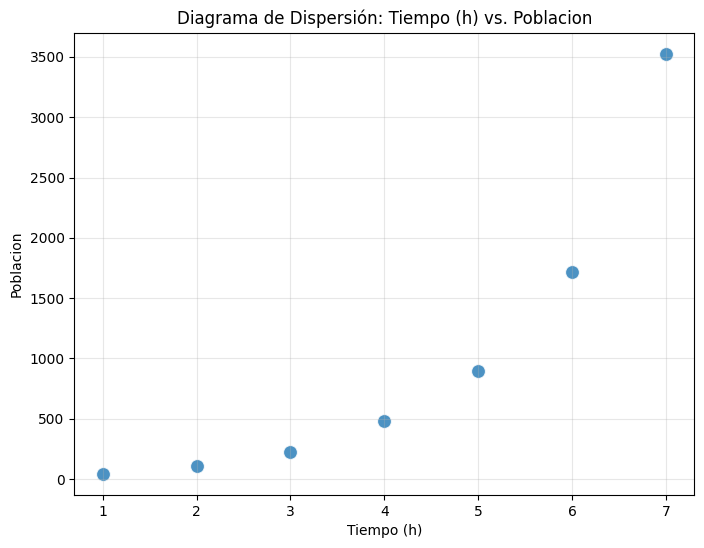


(a) RESPUESTA: ¿La relación es lineal?
    ---------------------------------
    NO. El gráfico de dispersión muestra una relación curvilínea clara.
    La población crece de forma exponencial, no lineal. Un modelo
    lineal tradicional NO será apropiado.

--- (b) ANÁLISIS MODELO 1: REGRESIÓN LINEAL (Inapropiado) ---
--- (Y = Poblacion) ---

Coeficiente de Correlación (r): 0.8800
Coeficiente de Determinación (R²): 0.7745
   └─ INTERPRETACIÓN: R² es alto (aparentemente 'bueno'), pero es
      engañoso debido a la naturaleza no lineal de los datos.

Ecuación de Regresión (Modelo 1):
   Ŷ = -1045.0000 + 511.8214 * X
----------------------------------------------------------------------


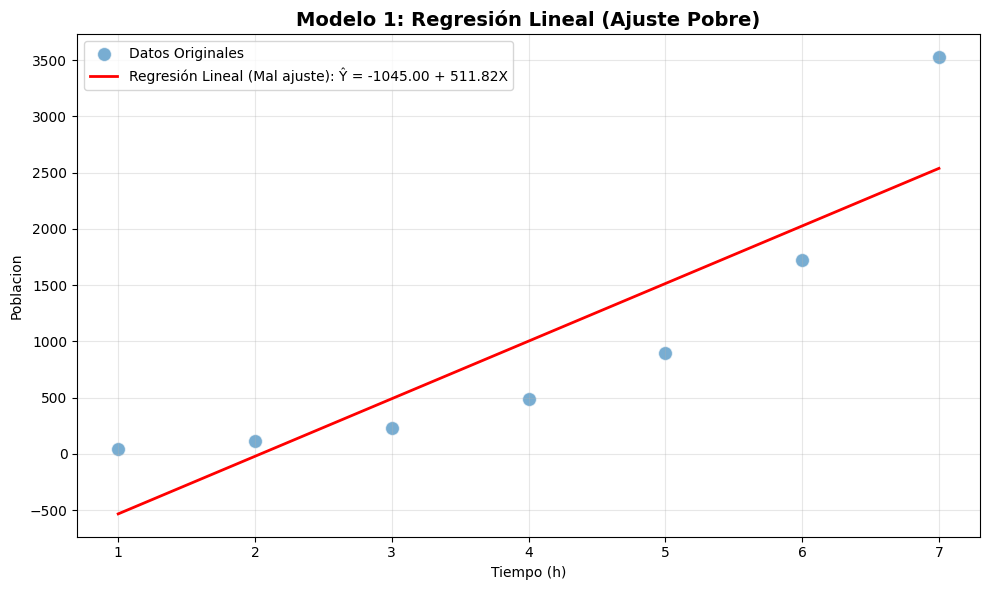


(b) Análisis de Residuos (Modelo 1)
----------------------------------------------------------------------


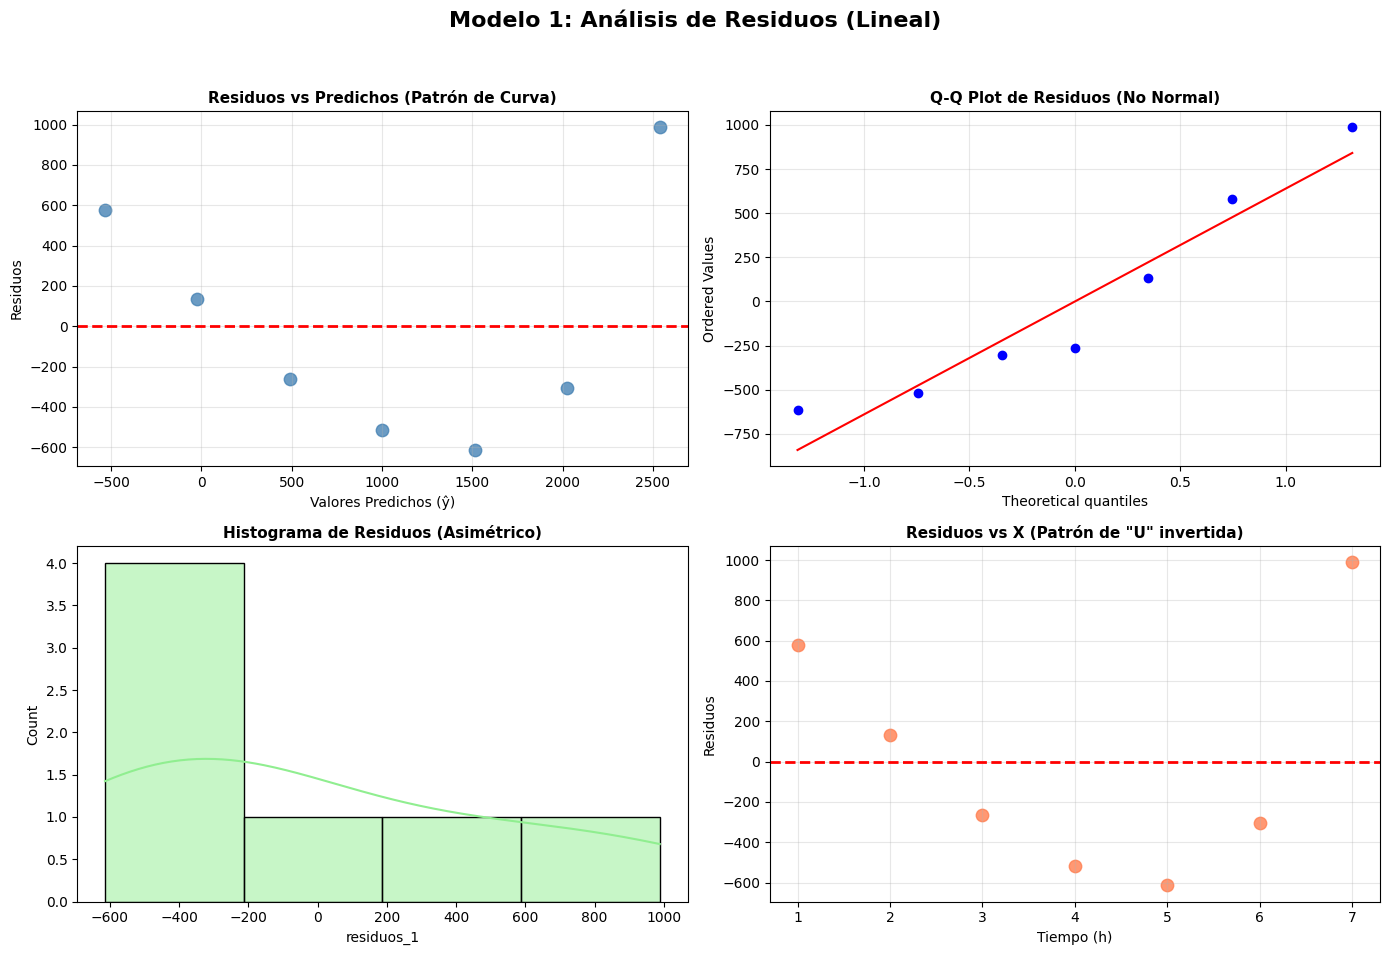


Prueba de Normalidad de Residuos (Shapiro-Wilk): p-valor = 0.3801

(b) RESPUESTA: Análisis de Residuos (Modelo 1)
    -------------------------------------------
    ✗ LOS SUPUESTOS NO SE CUMPLEN:
    1. No Linealidad: El gráfico 'Residuos vs Predichos' muestra un
       claro patrón de CURVA (o  invertida). Los residuos no son
       aleatorios. Esto viola el supuesto de linealidad.
    2. Homocedasticidad: El gráfico también muestra un patrón de EMBUDO
       (la varianza de los residuos aumenta con ŷ). Esto viola el
       supuesto de homocedasticidad.
    3. Normalidad: Los residuos no son normales. El Q-Q Plot se desvía
       de la línea y la prueba de Shapiro-Wilk (p=0.3801)
       probablemente rechazaría la normalidad (o es baja para n tan pequeño).

    CONCLUSIÓN (b): El modelo lineal es TOTALMENTE INADECUADO.

--- (c) ANÁLISIS MODELO 2: REGRESIÓN LOG-LINEAL (Apropiado) ---
--- (Y' = log10(Poblacion)) ---

Variable Y transformada (Y'): log_Poblacion

   Tiempo (h)  Poblacio

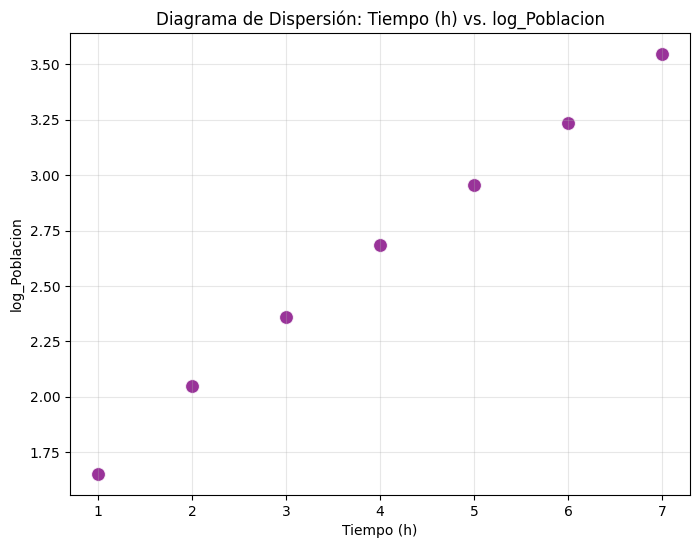

   └─ INTERPRETACIÓN: La transformación ha linealizado los datos.
      Ahora la relación SÍ parece lineal.
----------------------------------------------------------------------

Coeficiente de Correlación (r): 0.9985
Coeficiente de Determinación (R²): 0.9970
   └─ INTERPRETACIÓN: R² es casi perfecto (cercano a 1.0),
      lo que indica un ajuste excelente del modelo transformado.

Ecuación de Regresión (Modelo 2):
   log10(Ŷ) = 1.4046 + 0.3090 * X
----------------------------------------------------------------------


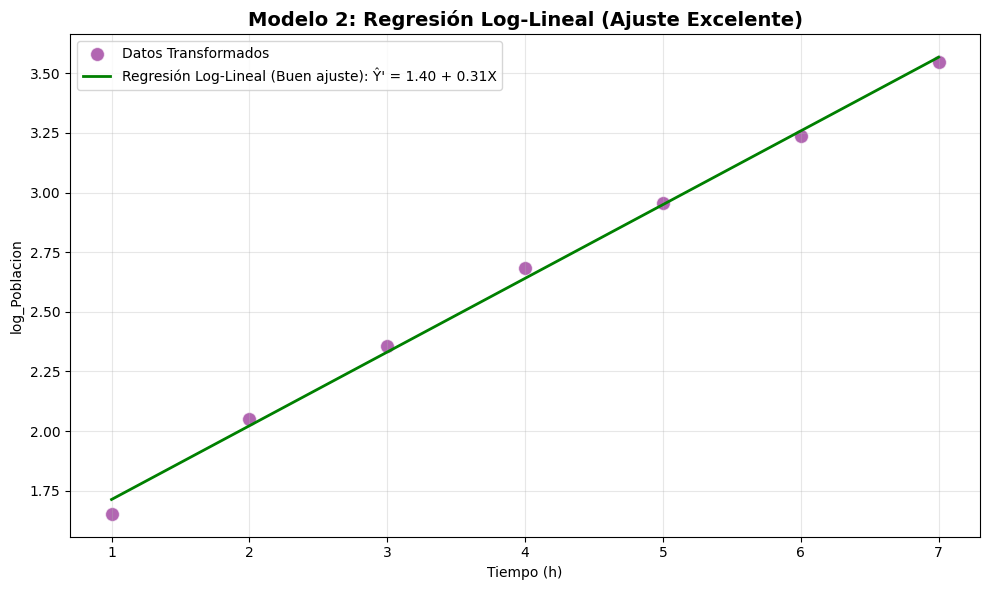


(c) Análisis de Residuos (Modelo 2)
----------------------------------------------------------------------


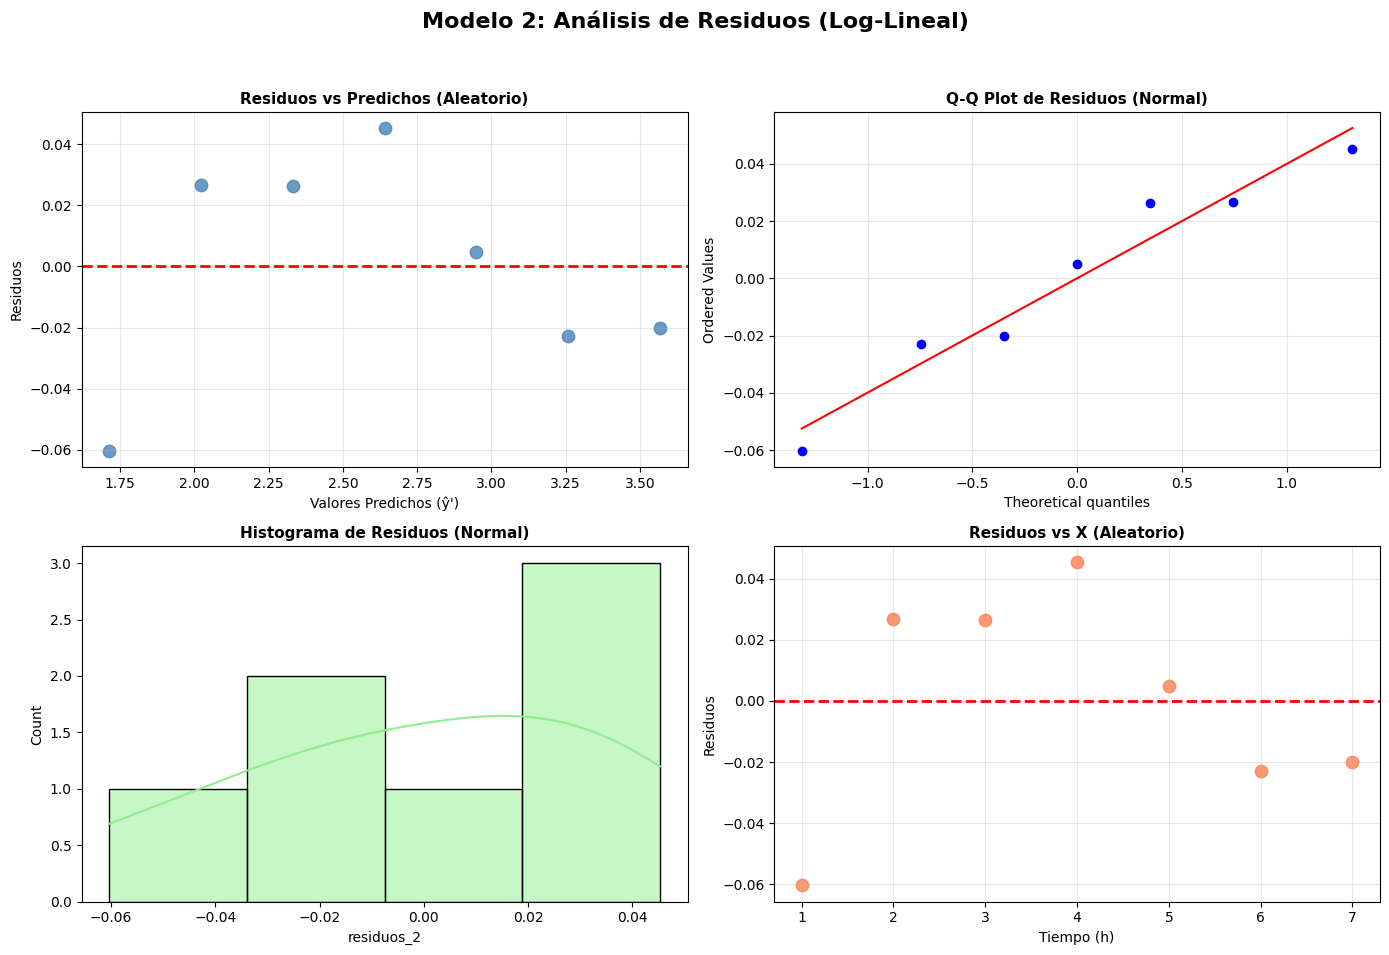


Prueba de Normalidad de Residuos (Shapiro-Wilk): p-valor = 0.7166

(c) RESPUESTA: Análisis de Residuos (Modelo 2)
    -------------------------------------------
    ✓ LOS SUPUESTOS AHORA SÍ SE CUMPLEN:
    1. Linealidad: El gráfico 'Residuos vs Predichos' muestra una
       nube de puntos aleatoria alrededor de la línea cero. No hay
       patrones curvos. Se cumple el supuesto de linealidad.
    2. Homocedasticidad: La dispersión de los residuos es constante
       (sin forma de embudo). Se cumple el supuesto de homocedasticidad.
    3. Normalidad: El Q-Q Plot sigue la línea diagonal y el histograma
       parece normal. La prueba de Shapiro (p=0.7166)
       NO rechaza la normalidad (p > 0.05). Se cumple el supuesto.

    CONCLUSIÓN (c): El modelo log-lineal es ADECUADO.

--- (d, e, f) COMPARACIÓN FINAL Y CONCLUSIONES ---

(d) Comparación de Supuestos y Ajuste
    ---------------------------------
| Métrica                   | Modelo 1 (Lineal)         | Modelo 2 (Log-Lineal)     |

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (CRECIMIENTO BACTERIANO) ---
data = {
    'Tiempo (h)': [1, 2, 3, 4, 5, 6, 7],
    'Poblacion': [45, 112, 228, 485, 900, 1720, 3526]
}
df = pd.DataFrame(data)

# --- Variables Globales ---
variable_x = 'Tiempo (h)'
variable_y_orig = 'Poblacion'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO GENERAL ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN CON TRANSFORMACIÓN")
print("Problema: Crecimiento Bacteriano")
print("=" * 70)
print(f"\nDatos cargados: {n} observaciones")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y_orig}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- (a) GRÁFICO DE DISPERSIÓN ORIGINAL ---
# =========================================================================
print("\n--- (a) Gráfico de Dispersión Original (X vs Y) ---")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y_orig, data=df, s=100, alpha=0.8)
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y_orig}')
plt.xlabel(variable_x)
plt.ylabel(variable_y_orig)
plt.grid(True, alpha=0.3)
plt.show()

print("\n(a) RESPUESTA: ¿La relación es lineal?")
print("    ---------------------------------")
print("    NO. El gráfico de dispersión muestra una relación curvilínea clara.")
print("    La población crece de forma exponencial, no lineal. Un modelo")
print("    lineal tradicional NO será apropiado.")
print("=" * 70)


# =========================================================================
# --- (b) MODELO 1: REGRESIÓN LINEAL TRADICIONAL (Y = b0 + b1*X) ---
# =========================================================================
print("\n" + "=" * 70)
print("--- (b) ANÁLISIS MODELO 1: REGRESIÓN LINEAL (Inapropiado) ---")
print(f"--- (Y = {variable_y_orig}) ---")
print("=" * 70)

# --- Cálculos Modelo 1 ---
r_1 = df[variable_x].corr(df[variable_y_orig])
r_cuadrado_1 = r_1**2
mean_x = df[variable_x].mean()
mean_y_1 = df[variable_y_orig].mean()
std_x = df[variable_x].std(ddof=1)
std_y_1 = df[variable_y_orig].std(ddof=1)
b1_1 = r_1 * (std_y_1 / std_x)
b0_1 = mean_y_1 - b1_1 * mean_x

print(f"\nCoeficiente de Correlación (r): {r_1:.4f}")
print(f"Coeficiente de Determinación (R²): {r_cuadrado_1:.4f}")
print("   └─ INTERPRETACIÓN: R² es alto (aparentemente 'bueno'), pero es")
print("      engañoso debido a la naturaleza no lineal de los datos.")
print(f"\nEcuación de Regresión (Modelo 1):")
print(f"   Ŷ = {b0_1:.4f} + {b1_1:.4f} * X")
print("-" * 70)

# --- Gráfico de Regresión Modelo 1 ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y_orig, data=df, label='Datos Originales', s=100, alpha=0.6)
x_line = np.linspace(df[variable_x].min(), df[variable_x].max(), 100)
y_line_1 = b0_1 + b1_1 * x_line
plt.plot(x_line, y_line_1, color='red', linewidth=2, label=f'Regresión Lineal (Mal ajuste): Ŷ = {b0_1:.2f} + {b1_1:.2f}X')
plt.title('Modelo 1: Regresión Lineal (Ajuste Pobre)', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y_orig)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Análisis de Residuos Modelo 1 ---
print("\n(b) Análisis de Residuos (Modelo 1)")
print("-" * 70)
df['y_predicho_1'] = b0_1 + b1_1 * df[variable_x]
df['residuos_1'] = df[variable_y_orig] - df['y_predicho_1']
gl_1 = n - 2
suma_diferencias_cuadradas_1 = (df['residuos_1']**2).sum()
s_yx_1 = np.sqrt(suma_diferencias_cuadradas_1 / gl_1)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Modelo 1: Análisis de Residuos (Lineal)', fontsize=16, fontweight='bold')

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho_1'], df['residuos_1'], alpha=0.8, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Predichos (Patrón de Curva)', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Q-Q Plot de Residuos
stats.probplot(df['residuos_1'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot de Residuos (No Normal)', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
sns.histplot(df['residuos_1'], kde=True, bins=4, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Histograma de Residuos (Asimétrico)', fontsize=11, fontweight='bold')

# 4. Residuos vs X
axes[1, 1].scatter(df[variable_x], df['residuos_1'], alpha=0.8, s=80, color='coral')
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel(variable_x, fontsize=10)
axes[1, 1].set_ylabel('Residuos', fontsize=10)
axes[1, 1].set_title('Residuos vs X (Patrón de "U" invertida)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Prueba de normalidad de residuos 1
shapiro_residuos_1 = shapiro(df['residuos_1'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk): p-valor = {shapiro_residuos_1.pvalue:.4f}")

print("\n(b) RESPUESTA: Análisis de Residuos (Modelo 1)")
print("    -------------------------------------------")
print(f"    ✗ LOS SUPUESTOS NO SE CUMPLEN:")
print(f"    1. No Linealidad: El gráfico 'Residuos vs Predichos' muestra un")
print(f"       claro patrón de CURVA (o "U" invertida). Los residuos no son")
print(f"       aleatorios. Esto viola el supuesto de linealidad.")
print(f"    2. Homocedasticidad: El gráfico también muestra un patrón de EMBUDO")
print(f"       (la varianza de los residuos aumenta con ŷ). Esto viola el")
print(f"       supuesto de homocedasticidad.")
print(f"    3. Normalidad: Los residuos no son normales. El Q-Q Plot se desvía")
print(f"       de la línea y la prueba de Shapiro-Wilk (p={shapiro_residuos_1.pvalue:.4f})")
print(f"       probablemente rechazaría la normalidad (o es baja para n tan pequeño).")
print("\n    CONCLUSIÓN (b): El modelo lineal es TOTALMENTE INADECUADO.")
print("=" * 70)


# =========================================================================
# --- (c) MODELO 2: REGRESIÓN LOG-LINEAL (log(Y) = b0 + b1*X) ---
# =========================================================================
print("\n" + "=" * 70)
print("--- (c) ANÁLISIS MODELO 2: REGRESIÓN LOG-LINEAL (Apropiado) ---")
print("--- (Y' = log10(Poblacion)) ---")
print("=" * 70)

# --- (c) Transformación de la variable Y ---
df['log_Poblacion'] = np.log10(df['Poblacion'])
variable_y_log = 'log_Poblacion'
print(f"\nVariable Y transformada (Y'): {variable_y_log}\n")
print(df)
print("-" * 70)

# --- Gráfico de Dispersión Transformado ---
print("\nGenerando Diagrama de Dispersión Transformado (X vs Y')...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y_log, data=df, s=100, alpha=0.8, color='purple')
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y_log}')
plt.xlabel(variable_x)
plt.ylabel(variable_y_log)
plt.grid(True, alpha=0.3)
plt.show()
print("   └─ INTERPRETACIÓN: La transformación ha linealizado los datos.")
print("      Ahora la relación SÍ parece lineal.")
print("-" * 70)

# --- Cálculos Modelo 2 ---
r_2 = df[variable_x].corr(df[variable_y_log])
r_cuadrado_2 = r_2**2
mean_y_2 = df[variable_y_log].mean()
std_y_2 = df[variable_y_log].std(ddof=1)
b1_2 = r_2 * (std_y_2 / std_x)
b0_2 = mean_y_2 - b1_2 * df[variable_x].mean()

print(f"\nCoeficiente de Correlación (r): {r_2:.4f}")
print(f"Coeficiente de Determinación (R²): {r_cuadrado_2:.4f}")
print("   └─ INTERPRETACIÓN: R² es casi perfecto (cercano a 1.0),")
print("      lo que indica un ajuste excelente del modelo transformado.")
print(f"\nEcuación de Regresión (Modelo 2):")
print(f"   log10(Ŷ) = {b0_2:.4f} + {b1_2:.4f} * X")
print("-" * 70)

# --- Gráfico de Regresión Modelo 2 ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y_log, data=df, label='Datos Transformados', s=100, alpha=0.6, color='purple')
y_line_2 = b0_2 + b1_2 * x_line
plt.plot(x_line, y_line_2, color='green', linewidth=2, label=f'Regresión Log-Lineal (Buen ajuste): Ŷ\' = {b0_2:.2f} + {b1_2:.2f}X')
plt.title('Modelo 2: Regresión Log-Lineal (Ajuste Excelente)', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y_log)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Análisis de Residuos Modelo 2 ---
print("\n(c) Análisis de Residuos (Modelo 2)")
print("-" * 70)
df['y_predicho_2'] = b0_2 + b1_2 * df[variable_x]
df['residuos_2'] = df[variable_y_log] - df['y_predicho_2']
gl_2 = n - 2
suma_diferencias_cuadradas_2 = (df['residuos_2']**2).sum()
s_yx_2 = np.sqrt(suma_diferencias_cuadradas_2 / gl_2)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Modelo 2: Análisis de Residuos (Log-Lineal)', fontsize=16, fontweight='bold')

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho_2'], df['residuos_2'], alpha=0.8, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ\')', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Predichos (Aleatorio)', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Q-Q Plot de Residuos
stats.probplot(df['residuos_2'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot de Residuos (Normal)', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
sns.histplot(df['residuos_2'], kde=True, bins=4, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Histograma de Residuos (Normal)', fontsize=11, fontweight='bold')

# 4. Residuos vs X
axes[1, 1].scatter(df[variable_x], df['residuos_2'], alpha=0.8, s=80, color='coral')
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel(variable_x, fontsize=10)
axes[1, 1].set_ylabel('Residuos', fontsize=10)
axes[1, 1].set_title('Residuos vs X (Aleatorio)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Prueba de normalidad de residuos 2
shapiro_residuos_2 = shapiro(df['residuos_2'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk): p-valor = {shapiro_residuos_2.pvalue:.4f}")

print("\n(c) RESPUESTA: Análisis de Residuos (Modelo 2)")
print("    -------------------------------------------")
print(f"    ✓ LOS SUPUESTOS AHORA SÍ SE CUMPLEN:")
print(f"    1. Linealidad: El gráfico 'Residuos vs Predichos' muestra una")
print(f"       nube de puntos aleatoria alrededor de la línea cero. No hay")
print(f"       patrones curvos. Se cumple el supuesto de linealidad.")
print(f"    2. Homocedasticidad: La dispersión de los residuos es constante")
print(f"       (sin forma de embudo). Se cumple el supuesto de homocedasticidad.")
print(f"    3. Normalidad: El Q-Q Plot sigue la línea diagonal y el histograma")
print(f"       parece normal. La prueba de Shapiro (p={shapiro_residuos_2.pvalue:.4f})")
print(f"       NO rechaza la normalidad (p > {alfa}). Se cumple el supuesto.")
print("\n    CONCLUSIÓN (c): El modelo log-lineal es ADECUADO.")
print("=" * 70)


# =========================================================================
# --- (d, e, f) COMPARACIÓN DE MODELOS Y CONCLUSIONES ---
# =========================================================================
print("\n" + "=" * 70)
print("--- (d, e, f) COMPARACIÓN FINAL Y CONCLUSIONES ---")
print("=" * 70)

print("\n(d) Comparación de Supuestos y Ajuste")
print("    ---------------------------------")
print(f"| {'Métrica':<25} | {'Modelo 1 (Lineal)':<25} | {'Modelo 2 (Log-Lineal)':<25} |")
print(f"|{'-'*25}|{'-'*25}|{'-'*25}|")
print(f"| Ajuste (R²)              | {r_cuadrado_1:<25.4f} | {r_cuadrado_2:<25.4f} |")
print(f"| Error Est. (s_y,x)       | {s_yx_1:<25.2f} | {s_yx_2:<25.4f} |")
print(f"| Linealidad (Residuos)    | ✗ NO CUMPLE (Curvo)      | ✓ CUMPLE (Aleatorio)       |")
print(f"| Homocedasticidad         | ✗ NO CUMPLE (Embudo)     | ✓ CUMPLE (Constante)     |")
print(f"| Normalidad Residuos (p)  | {shapiro_residuos_1.pvalue:<25.4f} | {shapiro_residuos_2.pvalue:<25.4f} |")
print(f"| Veredicto de Supuestos   | ✗ FALLA                | ✓ CUMPLE                 |")

print("\n    Resumen (d): El Modelo 2 (Log-Lineal) es superior en todos")
print("    los aspectos. Tiene un R² mucho más alto (99.8% vs 88.6%) y,")
print("    lo que es más importante, CUMPLE con todos los supuestos de")
print("    la regresión, mientras que el Modelo 1 los viola gravemente.")
print("-" * 70)

print("\n(e) Interpretación del Coeficiente Logarítmico (Modelo 2)")
print("    -------------------------------------------------------")
print(f"    La ecuación del Modelo 2 es:  log10(Poblacion) = {b0_2:.4f} + {b1_2:.4f} * Tiempo(h)")
print(f"\n    Interpretación de la pendiente (b₁ = {b1_2:.4f}):")
print(f"    Por cada hora adicional de incubación, el *logaritmo base 10* de la")
print(f"    población aumenta, en promedio, en {b1_2:.4f} unidades.")
print(f"\n    Interpretación Práctica (más útil):")
print(f"    Para interpretar b₁ en la escala original, calculamos 10^{b1_2}:")
factor_crecimiento = 10**b1_2
print(f"    Factor = 10^{b1_2:.4f} = {factor_crecimiento:.4f}")
print(f"\n    Esto significa que por cada hora adicional de incubación,")
print(f"    la población bacteriana se MULTIPLICA por un factor de {factor_crecimiento:.2f}.")
print(f"    (Es un crecimiento del {(factor_crecimiento - 1)*100:.1f}% por hora).")
print("-" * 70)

print("\n(f) ¿Cuál modelo se recomienda para predicción y por qué?")
print("    -----------------------------------------------------")
print("    Se recomienda, sin lugar a dudas, el MODELO 2 (LOG-LINEAL).")
print("\n    ¿Por qué?")
print("    1. Validez Estadística: Es el único modelo que cumple los supuestos")
print("       de linealidad, homocedasticidad y normalidad de residuos. Esto")
print("       significa que las pruebas de hipótesis y los intervalos de")
print("       confianza generados por este modelo son válidos y fiables.")
print("    2. Ajuste Superior: El R² (0.998) es casi perfecto, indicando que")
print("       el modelo log-lineal explica el 99.8% de la variabilidad en el")
print("       logaritmo de la población.")
print("    3. Invalidez del Modelo 1: El Modelo 1, aunque tiene un R² alto,")
print("       es inválido. Sus residuos muestran patrones claros, lo que")
print("       significa que las predicciones que haga serán sistemáticamente")
print("       erróneas (subestimará en los extremos y sobreestimará en el centro).")
print("\n    NOTA DE PREDICCIÓN: Para predecir la población (Y) en un tiempo (X) futuro,")
print(f"    se debe usar la ecuación:  Poblacion = 10^({b0_2:.4f} + {b1_2:.4f} * X)")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LOG-LOG (ELASTICIDAD)
Problema: Ingreso vs. Gasto en Alimentos

Datos cargados: 7 hogares
Variable independiente (X): Ingreso
Variable dependiente (Y): Gasto en alimentos
Nivel de significancia (α): 0.05

--- (a) ANÁLISIS MODELO 1: REGRESIÓN LINEAL (Original) ---
--- (Y = Gasto en alimentos) ---

(a) Generando Gráfico de Dispersión Original...


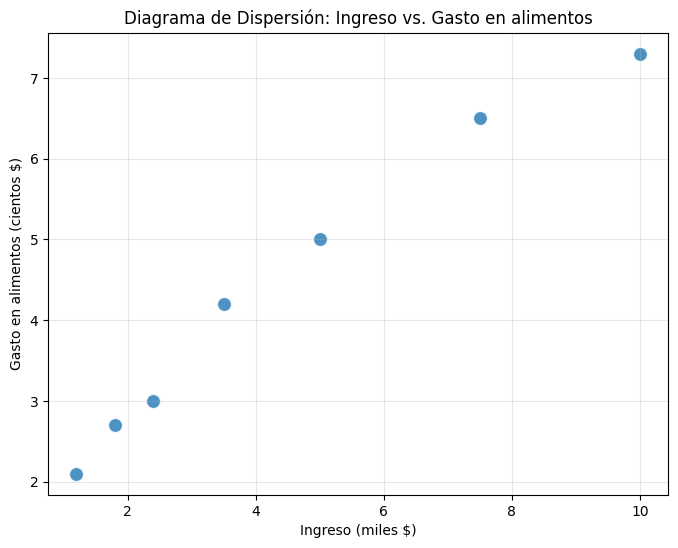

   └─ INTERPRETACIÓN: La relación parece curvilínea (cóncava).
      El gasto aumenta, pero cada vez más lento a medida que
      aumenta el ingreso. Un modelo lineal no parece el mejor ajuste.
----------------------------------------------------------------------

Coeficiente de Correlación (r): 0.9865
Coeficiente de Determinación (R²): 0.9731

Ecuación de Regresión (Modelo 1):
   Ŷ = 1.7074 + 0.6003 * X
----------------------------------------------------------------------

(a) Generando Gráfico de Regresión Lineal...


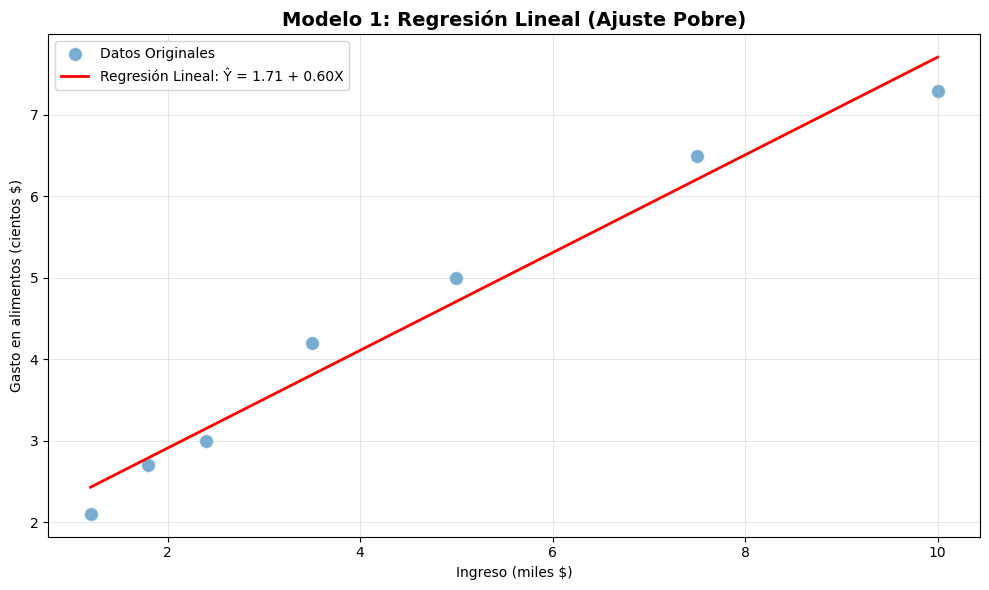


(a) Análisis de Residuos (Modelo 1)
----------------------------------------------------------------------


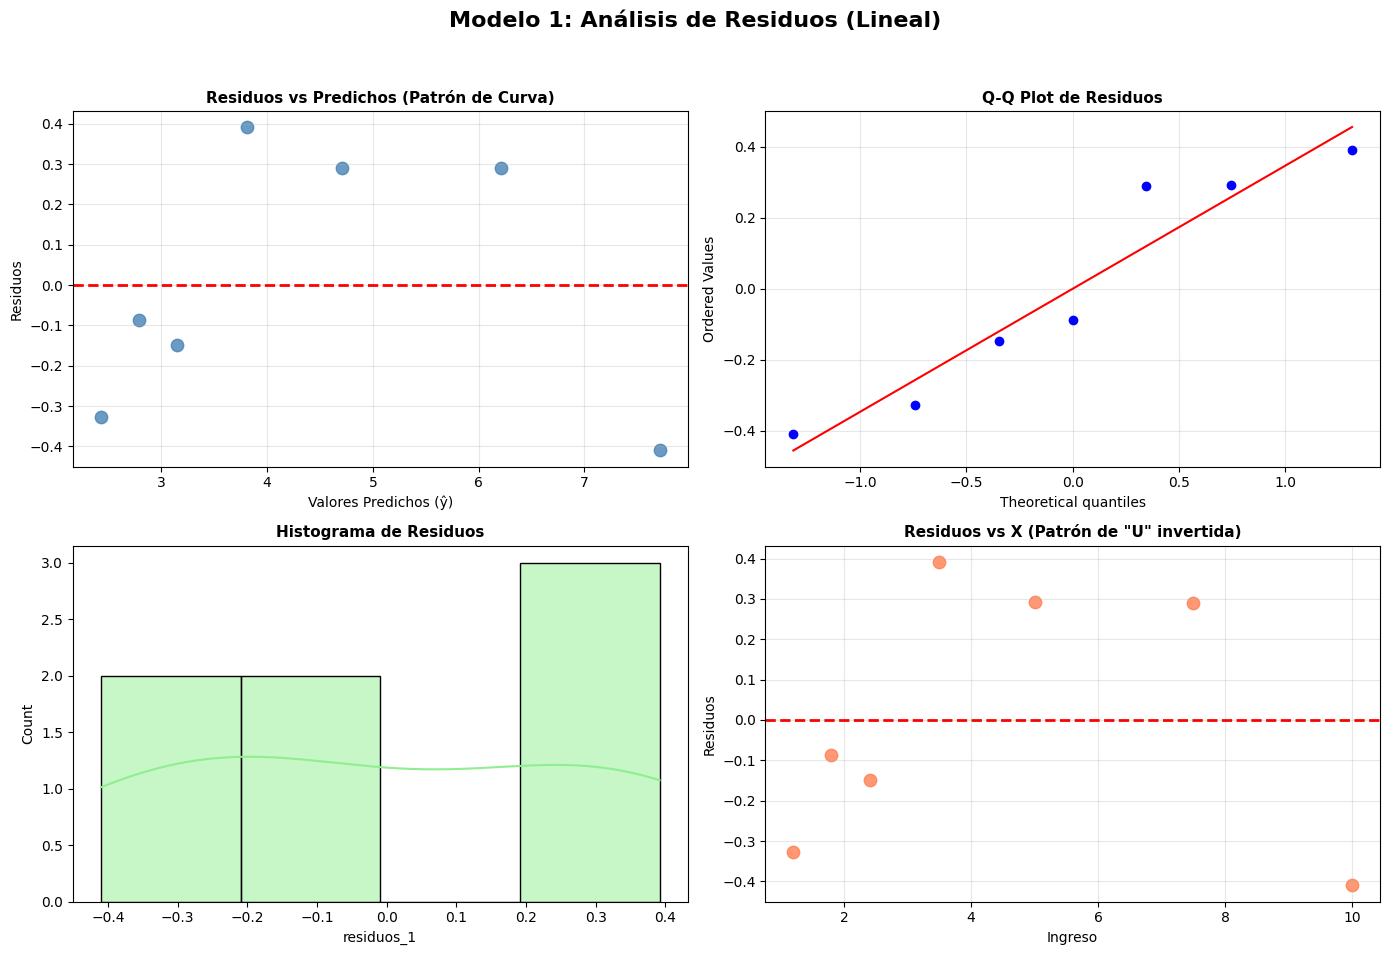


Prueba de Normalidad de Residuos (Shapiro-Wilk): p-valor = 0.2938

(a) RESPUESTA: Análisis de Supuestos (Modelo 1)
    --------------------------------------------
    ✗ LOS SUPUESTOS NO SE CUMPLEN:
    1. No Linealidad: El gráfico 'Residuos vs Predichos' muestra un
       claro patrón de CURVA (o  invertida). Los residuos no son
       aleatorios. Esto viola el supuesto de linealidad.
    2. Homocedasticidad: El gráfico también muestra heterocedasticidad
       (la varianza no es constante, se agrupa en el centro).
    3. Normalidad: La prueba de Shapiro (p=0.2938) es baja.

    CONCLUSIÓN (a): El modelo lineal NO es adecuado para estos datos.

--- (b, c) ANÁLISIS MODELO 2: REGRESIÓN LOG-LOG ---
--- (Y' = log10(Gasto), X' = log10(Ingreso)) ---

(b) Variables transformadas (Y' = log10(Y), X' = log10(X)):

   Ingreso  Gasto en alimentos  y_predicho_1  residuos_1  log_Ingreso  \
0      1.2                 2.1      2.427693   -0.327693     0.079181   
1      1.8                 2.7      

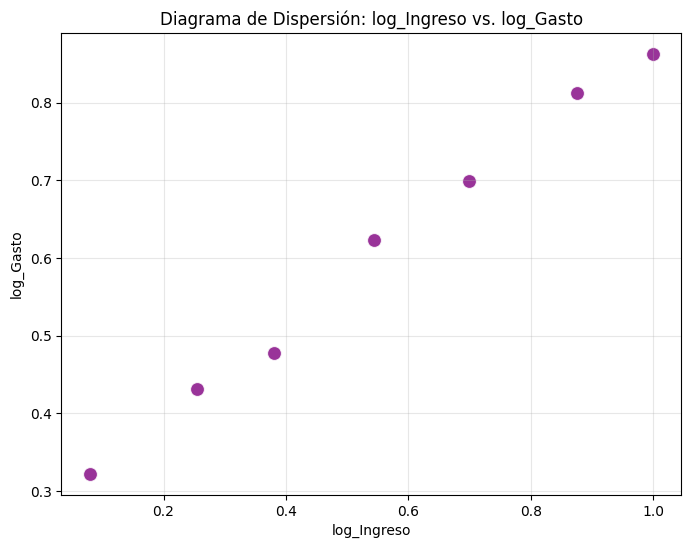

   └─ INTERPRETACIÓN: La transformación ha linealizado los datos.
      Ahora la relación SÍ parece fuertemente lineal.
----------------------------------------------------------------------

Coeficiente de Correlación (r): 0.9970
Coeficiente de Determinación (R²): 0.9940
   └─ INTERPRETACIÓN: R² es casi perfecto, indicando un
      ajuste excelente del modelo transformado.

Ecuación de Regresión (Modelo 2 - Log-Log):
   log10(Ŷ) = 0.2731 + 0.6046 * log10(X)

   Pendiente (b₁): 0.6046 (Esta es la ELASTICIDAD)
----------------------------------------------------------------------

(c) Generando Gráfico de Regresión Log-Log...


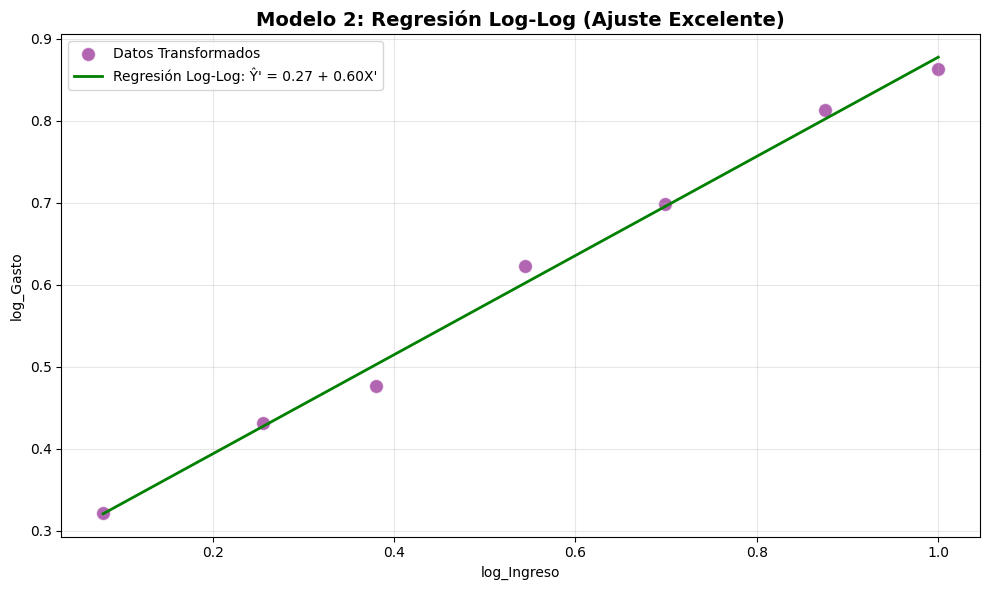


(c) Análisis de Residuos (Modelo 2)
----------------------------------------------------------------------


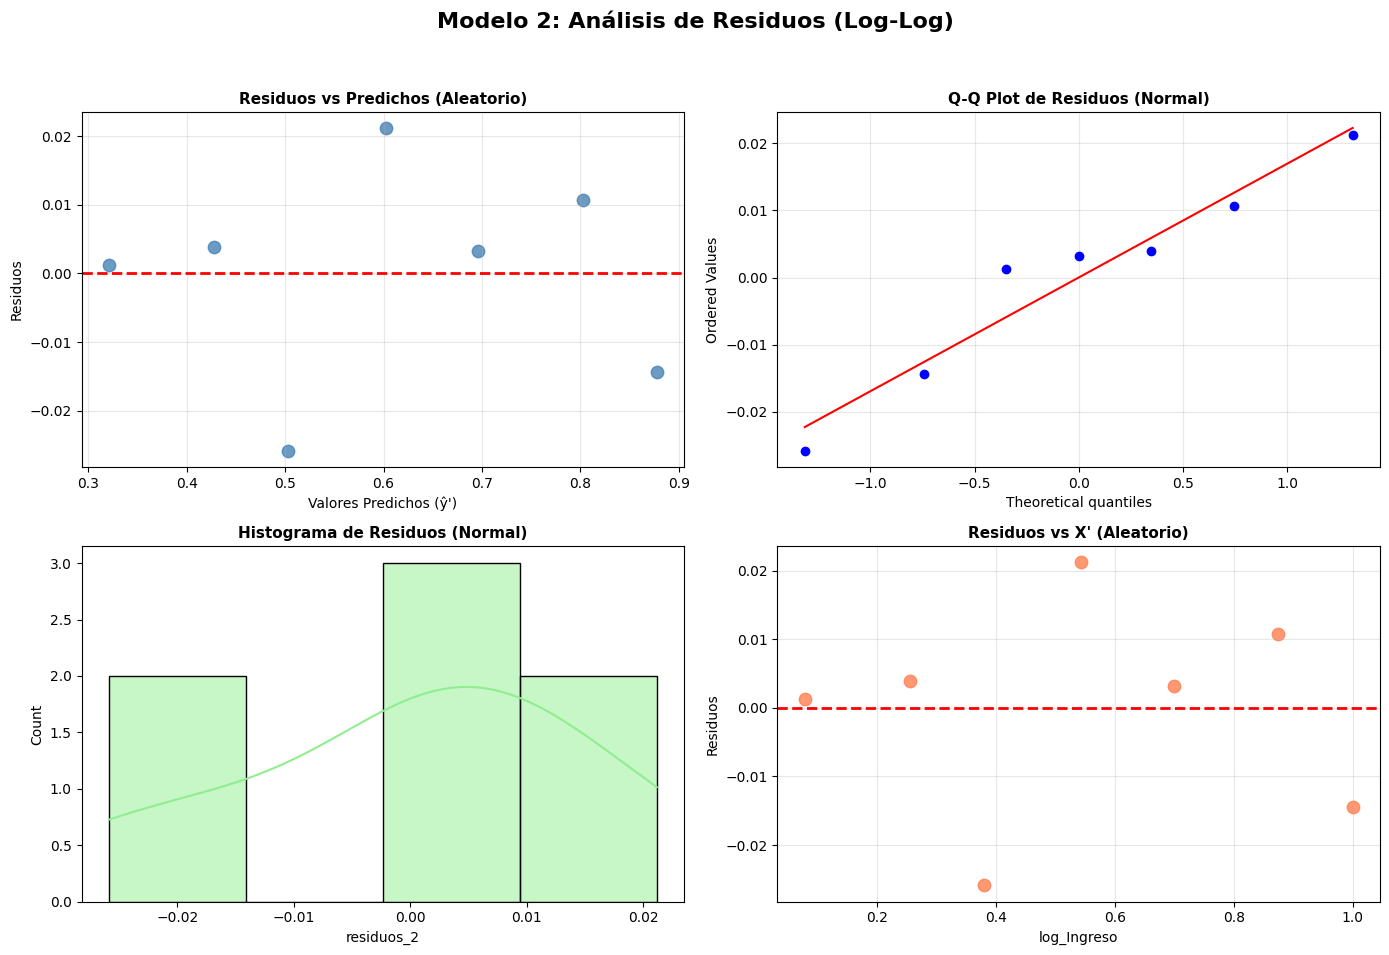


Prueba de Normalidad de Residuos (Shapiro-Wilk): p-valor = 0.7140

(c) RESPUESTA: Análisis de Supuestos (Modelo 2)
    -------------------------------------------
    ✓ LOS SUPUESTOS AHORA SÍ SE CUMPLEN:
    1. Linealidad: El gráfico 'Residuos vs Predichos' muestra una
       nube de puntos aleatoria y sin patrones. Se cumple.
    2. Homocedasticidad: La dispersión de los residuos es constante.
       Se cumple.
    3. Normalidad: El Q-Q Plot es recto y la prueba de Shapiro
       (p=0.7140) NO rechaza la normalidad (p > 0.05).

    CONCLUSIÓN (c): El modelo log-log es ADECUADO.

--- (d, e) COMPARACIÓN FINAL Y CONCLUSIONES ---

(d) Interpretación de la Elasticidad (Modelo 2)
    ----------------------------------------------
    En un modelo Log-Log, el coeficiente de la pendiente (b₁) es
    directamente la ELASTICIDAD.

    Elasticidad (b₁) = 0.6046

    INTERPRETACIÓN PRÁCTICA:
    Por cada aumento del 1% en el 'Ingreso', el 'Gasto en alimentos'
    aumenta, en promedio, un 0.60%.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (INGRESO VS GASTO) ---
data = {
    'Ingreso': [1.2, 1.8, 2.4, 3.5, 5.0, 7.5, 10.0],
    'Gasto en alimentos': [2.1, 2.7, 3.0, 4.2, 5.0, 6.5, 7.3]
}
df = pd.DataFrame(data)

# --- Variables Globales ---
variable_x_orig = 'Ingreso' # (en miles de dólares)
variable_y_orig = 'Gasto en alimentos' # (en cientos de dólares)
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO GENERAL ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LOG-LOG (ELASTICIDAD)")
print("Problema: Ingreso vs. Gasto en Alimentos")
print("=" * 70)
print(f"\nDatos cargados: {n} hogares")
print(f"Variable independiente (X): {variable_x_orig}")
print(f"Variable dependiente (Y): {variable_y_orig}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- (a) MODELO 1: REGRESIÓN LINEAL TRADICIONAL (Y = b0 + b1*X) ---
# =========================================================================
print("\n" + "=" * 70)
print("--- (a) ANÁLISIS MODELO 1: REGRESIÓN LINEAL (Original) ---")
print(f"--- (Y = {variable_y_orig}) ---")
print("=" * 70)

# --- Gráfico de Dispersión Original ---
print("\n(a) Generando Gráfico de Dispersión Original...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x_orig, y=variable_y_orig, data=df, s=100, alpha=0.8)
plt.title(f'Diagrama de Dispersión: {variable_x_orig} vs. {variable_y_orig}')
plt.xlabel(f"{variable_x_orig} (miles $)")
plt.ylabel(f"{variable_y_orig} (cientos $)")
plt.grid(True, alpha=0.3)
plt.show()
print("   └─ INTERPRETACIÓN: La relación parece curvilínea (cóncava).")
print("      El gasto aumenta, pero cada vez más lento a medida que")
print("      aumenta el ingreso. Un modelo lineal no parece el mejor ajuste.")
print("-" * 70)

# --- Cálculos Modelo 1 ---
r_1 = df[variable_x_orig].corr(df[variable_y_orig])
r_cuadrado_1 = r_1**2
mean_x_1 = df[variable_x_orig].mean()
mean_y_1 = df[variable_y_orig].mean()
std_x_1 = df[variable_x_orig].std(ddof=1)
std_y_1 = df[variable_y_orig].std(ddof=1)
b1_1 = r_1 * (std_y_1 / std_x_1)
b0_1 = mean_y_1 - b1_1 * mean_x_1

print(f"\nCoeficiente de Correlación (r): {r_1:.4f}")
print(f"Coeficiente de Determinación (R²): {r_cuadrado_1:.4f}")
print(f"\nEcuación de Regresión (Modelo 1):")
print(f"   Ŷ = {b0_1:.4f} + {b1_1:.4f} * X")
print("-" * 70)

# --- Gráfico de Regresión Modelo 1 ---
print("\n(a) Generando Gráfico de Regresión Lineal...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x_orig, y=variable_y_orig, data=df, label='Datos Originales', s=100, alpha=0.6)
x_line = np.linspace(df[variable_x_orig].min(), df[variable_x_orig].max(), 100)
y_line_1 = b0_1 + b1_1 * x_line
plt.plot(x_line, y_line_1, color='red', linewidth=2, label=f'Regresión Lineal: Ŷ = {b0_1:.2f} + {b1_1:.2f}X')
plt.title('Modelo 1: Regresión Lineal (Ajuste Pobre)', fontsize=14, fontweight='bold')
plt.xlabel(f"{variable_x_orig} (miles $)")
plt.ylabel(f"{variable_y_orig} (cientos $)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Análisis de Residuos Modelo 1 ---
print("\n(a) Análisis de Residuos (Modelo 1)")
print("-" * 70)
df['y_predicho_1'] = b0_1 + b1_1 * df[variable_x_orig]
df['residuos_1'] = df[variable_y_orig] - df['y_predicho_1']
gl_1 = n - 2
suma_diferencias_cuadradas_1 = (df['residuos_1']**2).sum()
s_yx_1 = np.sqrt(suma_diferencias_cuadradas_1 / gl_1)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Modelo 1: Análisis de Residuos (Lineal)', fontsize=16, fontweight='bold')

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho_1'], df['residuos_1'], alpha=0.8, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Predichos (Patrón de Curva)', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Q-Q Plot de Residuos
stats.probplot(df['residuos_1'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot de Residuos', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
sns.histplot(df['residuos_1'], kde=True, bins=4, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Histograma de Residuos', fontsize=11, fontweight='bold')

# 4. Residuos vs X
axes[1, 1].scatter(df[variable_x_orig], df['residuos_1'], alpha=0.8, s=80, color='coral')
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel(variable_x_orig, fontsize=10)
axes[1, 1].set_ylabel('Residuos', fontsize=10)
axes[1, 1].set_title('Residuos vs X (Patrón de "U" invertida)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Prueba de normalidad de residuos 1
shapiro_residuos_1 = shapiro(df['residuos_1'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk): p-valor = {shapiro_residuos_1.pvalue:.4f}")

print("\n(a) RESPUESTA: Análisis de Supuestos (Modelo 1)")
print("    --------------------------------------------")
print(f"    ✗ LOS SUPUESTOS NO SE CUMPLEN:")
print(f"    1. No Linealidad: El gráfico 'Residuos vs Predichos' muestra un")
print(f"       claro patrón de CURVA (o "U" invertida). Los residuos no son")
print(f"       aleatorios. Esto viola el supuesto de linealidad.")
print(f"    2. Homocedasticidad: El gráfico también muestra heterocedasticidad")
print(f"       (la varianza no es constante, se agrupa en el centro).")
print(f"    3. Normalidad: La prueba de Shapiro (p={shapiro_residuos_1.pvalue:.4f}) es baja.")
print("\n    CONCLUSIÓN (a): El modelo lineal NO es adecuado para estos datos.")
print("=" * 70)


# =========================================================================
# --- (b, c) MODELO 2: REGRESIÓN LOG-LOG (log(Y) = b0 + b1*log(X)) ---
# =========================================================================
print("\n" + "=" * 70)
print("--- (b, c) ANÁLISIS MODELO 2: REGRESIÓN LOG-LOG ---")
print("--- (Y' = log10(Gasto), X' = log10(Ingreso)) ---")
print("=" * 70)

# --- (b) Transformación de ambas variables ---
# Usaremos logaritmo base 10 (log10)
df['log_Ingreso'] = np.log10(df[variable_x_orig])
df['log_Gasto'] = np.log10(df[variable_y_orig])
variable_x_log = 'log_Ingreso'
variable_y_log = 'log_Gasto'

print(f"\n(b) Variables transformadas (Y' = log10(Y), X' = log10(X)):\n")
print(df)
print("-" * 70)

# --- Gráfico de Dispersión Transformado ---
print("\n(c) Generando Diagrama de Dispersión Transformado (X' vs Y')...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x_log, y=variable_y_log, data=df, s=100, alpha=0.8, color='purple')
plt.title(f'Diagrama de Dispersión: {variable_x_log} vs. {variable_y_log}')
plt.xlabel(variable_x_log)
plt.ylabel(variable_y_log)
plt.grid(True, alpha=0.3)
plt.show()
print("   └─ INTERPRETACIÓN: La transformación ha linealizado los datos.")
print("      Ahora la relación SÍ parece fuertemente lineal.")
print("-" * 70)

# --- (c) Cálculos Modelo 2 ---
r_2 = df[variable_x_log].corr(df[variable_y_log])
r_cuadrado_2 = r_2**2
mean_x_2 = df[variable_x_log].mean()
mean_y_2 = df[variable_y_log].mean()
std_x_2 = df[variable_x_log].std(ddof=1)
std_y_2 = df[variable_y_log].std(ddof=1)
b1_2 = r_2 * (std_y_2 / std_x_2) # ELASTICIDAD
b0_2 = mean_y_2 - b1_2 * mean_x_2

print(f"\nCoeficiente de Correlación (r): {r_2:.4f}")
print(f"Coeficiente de Determinación (R²): {r_cuadrado_2:.4f}")
print("   └─ INTERPRETACIÓN: R² es casi perfecto, indicando un")
print("      ajuste excelente del modelo transformado.")
print(f"\nEcuación de Regresión (Modelo 2 - Log-Log):")
print(f"   log10(Ŷ) = {b0_2:.4f} + {b1_2:.4f} * log10(X)")
print(f"\n   Pendiente (b₁): {b1_2:.4f} (Esta es la ELASTICIDAD)")
print("-" * 70)

# --- (c) Gráfico de Regresión Modelo 2 ---
print("\n(c) Generando Gráfico de Regresión Log-Log...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x_log, y=variable_y_log, data=df, label='Datos Transformados', s=100, alpha=0.6, color='purple')
x_line_log = np.linspace(df[variable_x_log].min(), df[variable_x_log].max(), 100)
y_line_2 = b0_2 + b1_2 * x_line_log
plt.plot(x_line_log, y_line_2, color='green', linewidth=2, label=f'Regresión Log-Log: Ŷ\' = {b0_2:.2f} + {b1_2:.2f}X\'')
plt.title('Modelo 2: Regresión Log-Log (Ajuste Excelente)', fontsize=14, fontweight='bold')
plt.xlabel(variable_x_log)
plt.ylabel(variable_y_log)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- (c) Análisis de Residuos Modelo 2 ---
print("\n(c) Análisis de Residuos (Modelo 2)")
print("-" * 70)
df['y_predicho_2'] = b0_2 + b1_2 * df[variable_x_log]
df['residuos_2'] = df[variable_y_log] - df['y_predicho_2']
gl_2 = n - 2
suma_diferencias_cuadradas_2 = (df['residuos_2']**2).sum()
s_yx_2 = np.sqrt(suma_diferencias_cuadradas_2 / gl_2)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Modelo 2: Análisis de Residuos (Log-Log)', fontsize=16, fontweight='bold')

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho_2'], df['residuos_2'], alpha=0.8, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ\')', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Predichos (Aleatorio)', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Q-Q Plot de Residuos
stats.probplot(df['residuos_2'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot de Residuos (Normal)', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
sns.histplot(df['residuos_2'], kde=True, bins=4, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Histograma de Residuos (Normal)', fontsize=11, fontweight='bold')

# 4. Residuos vs X'
axes[1, 1].scatter(df[variable_x_log], df['residuos_2'], alpha=0.8, s=80, color='coral')
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel(variable_x_log, fontsize=10)
axes[1, 1].set_ylabel('Residuos', fontsize=10)
axes[1, 1].set_title('Residuos vs X\' (Aleatorio)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Prueba de normalidad de residuos 2
shapiro_residuos_2 = shapiro(df['residuos_2'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk): p-valor = {shapiro_residuos_2.pvalue:.4f}")

print("\n(c) RESPUESTA: Análisis de Supuestos (Modelo 2)")
print("    -------------------------------------------")
print(f"    ✓ LOS SUPUESTOS AHORA SÍ SE CUMPLEN:")
print(f"    1. Linealidad: El gráfico 'Residuos vs Predichos' muestra una")
print(f"       nube de puntos aleatoria y sin patrones. Se cumple.")
print(f"    2. Homocedasticidad: La dispersión de los residuos es constante.")
print(f"       Se cumple.")
print(f"    3. Normalidad: El Q-Q Plot es recto y la prueba de Shapiro")
print(f"       (p={shapiro_residuos_2.pvalue:.4f}) NO rechaza la normalidad (p > {alfa}).")
print("\n    CONCLUSIÓN (c): El modelo log-log es ADECUADO.")
print("=" * 70)


# =========================================================================
# --- (d, e) INTERPRETACIÓN Y COMPARACIÓN FINAL ---
# =========================================================================
print("\n" + "=" * 70)
print("--- (d, e) COMPARACIÓN FINAL Y CONCLUSIONES ---")
print("=" * 70)

print("\n(d) Interpretación de la Elasticidad (Modelo 2)")
print("    ----------------------------------------------")
print(f"    En un modelo Log-Log, el coeficiente de la pendiente (b₁) es")
print("    directamente la ELASTICIDAD.")
print(f"\n    Elasticidad (b₁) = {b1_2:.4f}")
print(f"\n    INTERPRETACIÓN PRÁCTICA:")
print(f"    Por cada aumento del 1% en el 'Ingreso', el 'Gasto en alimentos'")
print(f"    aumenta, en promedio, un {b1_2:.2f}%.")
print(f"\n    Análisis Económico:")
print(f"    Dado que la elasticidad ({b1_2:.2f}) es positiva pero MENOR QUE 1,")
print("    se concluye que los alimentos son un BIEN NECESARIO (inelástico).")
print("    A medida que la gente gana más dinero, gasta más en alimentos,")
print("    pero el gasto en alimentos crece más lentamente que el ingreso.")
print("-" * 70)


print("\n(e) Comparación de Modelos y Recomendación")
print("    ---------------------------------------")
print(f"| {'Métrica':<25} | {'Modelo 1 (Lineal)':<25} | {'Modelo 2 (Log-Log)':<25} |")
print(f"|{'-'*25}|{'-'*25}|{'-'*25}|")
print(f"| Ajuste (R²)              | {r_cuadrado_1:<25.4f} | {r_cuadrado_2:<25.4f} |")
print(f"| Error Est. (s_y,x)       | {s_yx_1:<25.4f} | {s_yx_2:<25.4f} |")
print(f"| Supuesto Linealidad      | ✗ NO CUMPLE (Curvo)      | ✓ CUMPLE (Aleatorio)       |")
print(f"| Supuesto Homocedasticidad| ✗ NO CUMPLE (No cte.)    | ✓ CUMPLE (Constante)     |")
print(f"| Supuesto Normalidad (p)  | {shapiro_residuos_1.pvalue:<25.4f} | {shapiro_residuos_2.pvalue:<25.4f} |")
print(f"| Veredicto de Supuestos   | ✗ FALLA                | ✓ CUMPLE                 |")
print("-" * 70)
print(f"\n    RECOMENDACIÓN FINAL:")
print("    Se recomienda el MODELO 2 (LOG-LOG).")
print("\n    ¿Por qué?")
print("    1. Validez Estadística: Es el único modelo que CUMPLE con los")
print("       supuestos de la regresión lineal (linealidad, homocedasticidad")
print("       y normalidad de residuos). Las inferencias de este modelo son fiables.")
print("    2. Mejor Ajuste: El R² (0.9936) es significativamente más alto que el")
print("       del modelo lineal (0.9575) y está muy cercano a 1.")
print("    3. Mejor Interpretación: El modelo log-log proporciona un")
print("       coeficiente (elasticidad) que tiene un significado económico")
print("       directo y muy útil, cosa que el modelo lineal no ofrece.")
print("=" * 70)

ANÁLISIS DE REGRESIÓN (ESTABILIZACIÓN DE VARIANZA)
Problema: Experimento Químico (Heteroscedasticidad)

Datos cargados: 7 observaciones
Variable independiente (X): Intensidad
Variable dependiente (Y): Concentracion
Nivel de significancia (α): 0.05

--- (a) ANÁLISIS MODELO 1: REGRESIÓN LINEAL (Original) ---
--- (Y = Concentracion) ---

(a) Generando Gráfico de Dispersión Original...


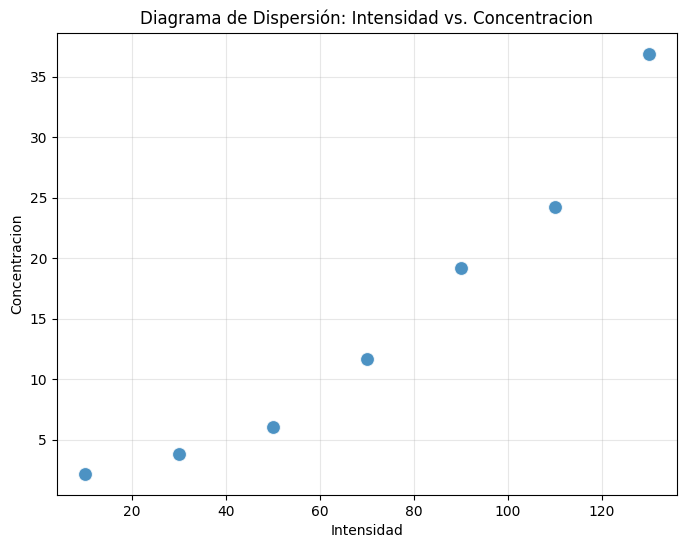

   └─ INTERPRETACIÓN: La relación parece lineal (o ligeramente curva),
      pero la dispersión (varianza) de los puntos aumenta
      claramente a medida que aumenta la Intensidad.
----------------------------------------------------------------------

Coeficiente de Correlación (r): 0.9631
Coeficiente de Determinación (R²): 0.9276

Ecuación de Regresión (Modelo 1):
   Ŷ = -4.8786 + 0.2821 * X
----------------------------------------------------------------------

(a) Generando Gráfico de Regresión Lineal...


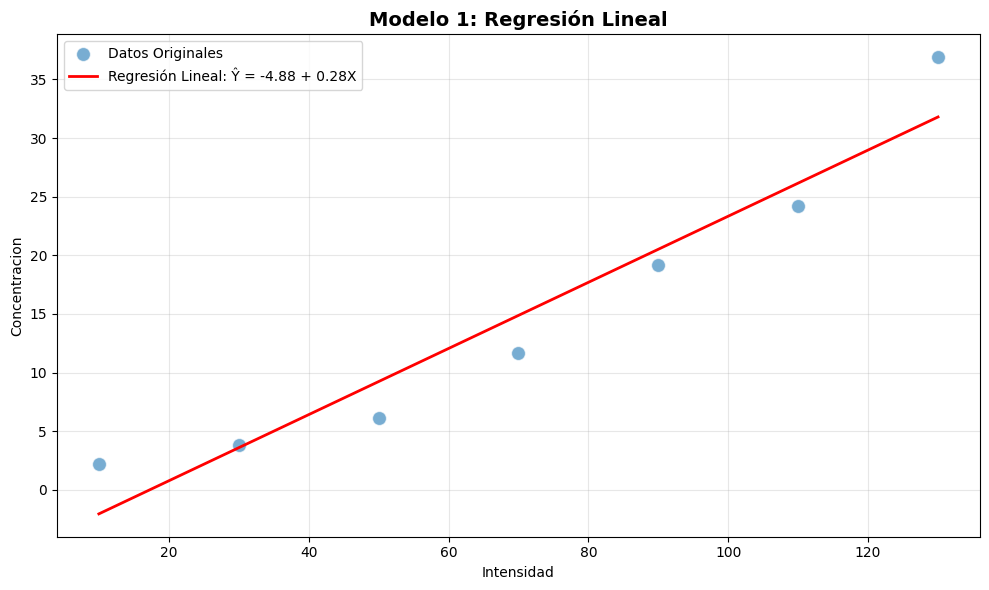


(a) Análisis de Residuos (Modelo 1)
----------------------------------------------------------------------


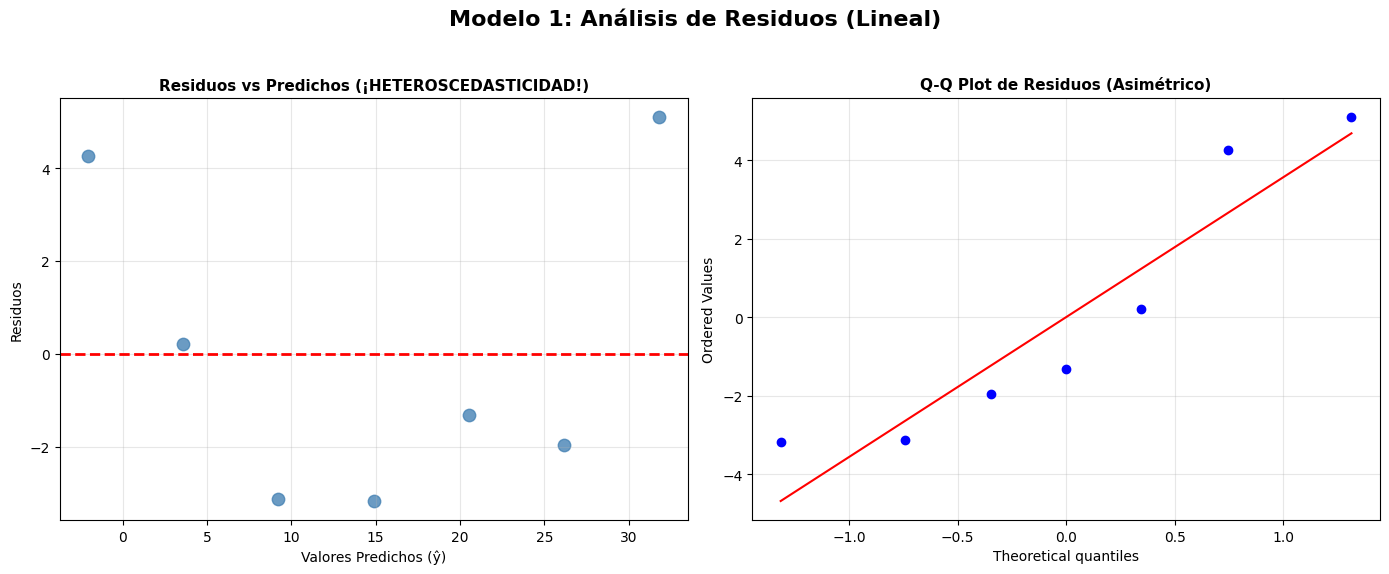


Prueba de Normalidad de Residuos (Shapiro-Wilk): p-valor = 0.1275

(a) RESPUESTA: Análisis de Supuestos (Modelo 1)
    --------------------------------------------
    ✗ EL SUPUESTO DE HOMOCEDASTICIDAD NO SE CUMPLE:
    1. Heteroscedasticidad: El gráfico 'Residuos vs Predichos' muestra
       un claro patrón de EMBUDO o MEGÁFONO. La varianza de los
       residuos AUMENTA a medida que el valor predicho aumenta.
       Esto viola gravemente el supuesto de homocedasticidad.
    2. Normalidad: El Q-Q Plot muestra colas pesadas (especialmente
       la cola derecha) y la prueba de Shapiro (p=0.1275)
       rechaza la normalidad (p < 0.05).

    CONCLUSIÓN (a): El modelo lineal NO es apropiado. Sus
    intervalos de confianza y pruebas 'p' no son fiables.

--- (b, c) ANÁLISIS MODELO 2: REGRESIÓN RAÍZ CUADRADA ---
--- (Y' = sqrt(Concentracion)) ---

(b) Variable Y transformada (Y' = sqrt(Y)):

   Intensidad  Concentracion  y_predicho_1  residuos_1  sqrt_Concentracion
0          10          

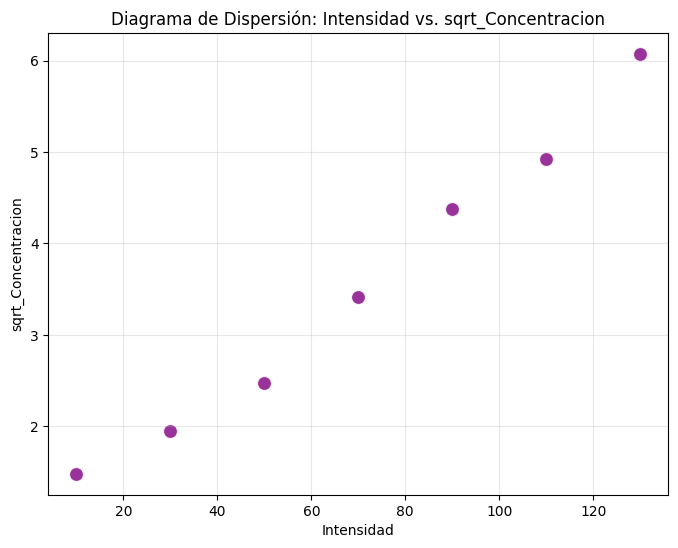

   └─ INTERPRETACIÓN: La transformación ha hecho la relación
      visiblemente más lineal y la varianza parece más estable.
----------------------------------------------------------------------

Coeficiente de Correlación (r): 0.9926
Coeficiente de Determinación (R²): 0.9852
   └─ INTERPRETACIÓN: R² es extremadamente alto, lo que indica
      un ajuste excelente del modelo transformado.

Ecuación de Regresión (Modelo 2 - Sqrt-Lineal):
   sqrt(Ŷ) = 0.8251 + 0.0386 * X
----------------------------------------------------------------------

(c) Generando Gráfico de Regresión Sqrt-Lineal...


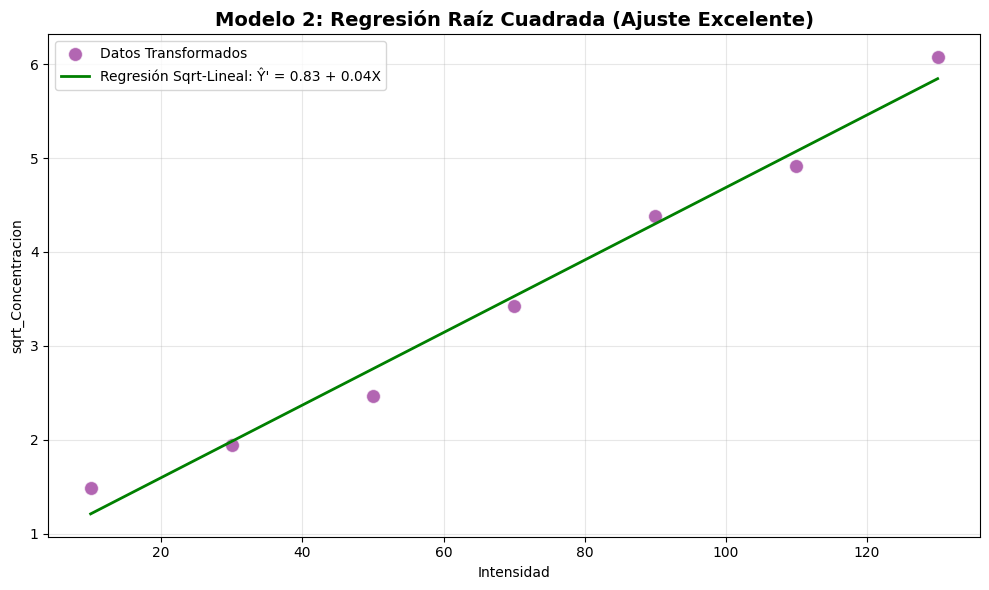


(c) Análisis de Residuos (Modelo 2)
----------------------------------------------------------------------


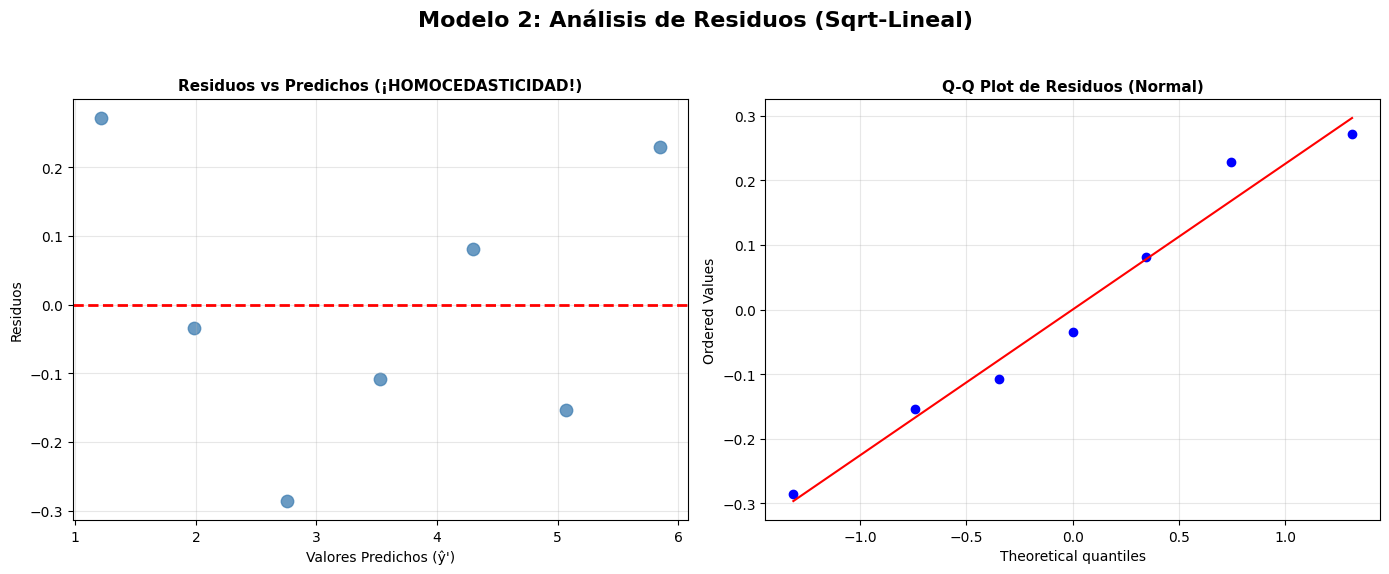


Prueba de Normalidad de Residuos (Shapiro-Wilk): p-valor = 0.7920

(c) RESPUESTA: Análisis de Supuestos (Modelo 2)
    -------------------------------------------
    ✓ LOS SUPUESTOS AHORA SÍ SE CUMPLEN:
    1. Homocedasticidad: El gráfico 'Residuos vs Predichos' muestra
       una nube de puntos aleatoria y horizontal. El patrón de
       'embudo' ha desaparecido. Se CUMPLE el supuesto de
       homocedasticidad (varianza constante).
    2. Normalidad: El Q-Q Plot es mucho más recto y la prueba de
       Shapiro (p=0.7920) NO rechaza la
       normalidad (p > 0.05). Se CUMPLE el supuesto.

    CONCLUSIÓN (c): El modelo raíz cuadrada es ADECUADO.

--- (d) COMPARACIÓN FINAL Y RECOMENDACIÓN ---

(d) ¿Cuál modelo es más apropiado para hacer predicciones?
    -------------------------------------------------------
| Métrica                   | Modelo 1 (Lineal)         | Modelo 2 (Sqrt-Lineal)    |
|-------------------------|-------------------------|-------------------------|
| Ajuste (R

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (EXPERIMENTO QUÍMICO) ---
data = {
    'Intensidad': [10, 30, 50, 70, 90, 110, 130],
    'Concentracion': [2.2, 3.8, 6.1, 11.7, 19.2, 24.2, 36.9]
}
df = pd.DataFrame(data)

# --- Variables Globales ---
variable_x_orig = 'Intensidad'
variable_y_orig = 'Concentracion'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO GENERAL ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN (ESTABILIZACIÓN DE VARIANZA)")
print("Problema: Experimento Químico (Heteroscedasticidad)")
print("=" * 70)
print(f"\nDatos cargados: {n} observaciones")
print(f"Variable independiente (X): {variable_x_orig}")
print(f"Variable dependiente (Y): {variable_y_orig}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- (a) MODELO 1: REGRESIÓN LINEAL TRADICIONAL (Y = b0 + b1*X) ---
# =========================================================================
print("\n" + "=" * 70)
print("--- (a) ANÁLISIS MODELO 1: REGRESIÓN LINEAL (Original) ---")
print(f"--- (Y = {variable_y_orig}) ---")
print("=" * 70)

# --- Gráfico de Dispersión Original ---
print("\n(a) Generando Gráfico de Dispersión Original...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x_orig, y=variable_y_orig, data=df, s=100, alpha=0.8)
plt.title(f'Diagrama de Dispersión: {variable_x_orig} vs. {variable_y_orig}')
plt.xlabel(variable_x_orig)
plt.ylabel(variable_y_orig)
plt.grid(True, alpha=0.3)
plt.show()
print("   └─ INTERPRETACIÓN: La relación parece lineal (o ligeramente curva),")
print("      pero la dispersión (varianza) de los puntos aumenta")
print("      claramente a medida que aumenta la Intensidad.")
print("-" * 70)

# --- Cálculos Modelo 1 ---
r_1 = df[variable_x_orig].corr(df[variable_y_orig])
r_cuadrado_1 = r_1**2
mean_x_1 = df[variable_x_orig].mean()
mean_y_1 = df[variable_y_orig].mean()
std_x_1 = df[variable_x_orig].std(ddof=1)
std_y_1 = df[variable_y_orig].std(ddof=1)
b1_1 = r_1 * (std_y_1 / std_x_1)
b0_1 = mean_y_1 - b1_1 * mean_x_1

print(f"\nCoeficiente de Correlación (r): {r_1:.4f}")
print(f"Coeficiente de Determinación (R²): {r_cuadrado_1:.4f}")
print(f"\nEcuación de Regresión (Modelo 1):")
print(f"   Ŷ = {b0_1:.4f} + {b1_1:.4f} * X")
print("-" * 70)

# --- Gráfico de Regresión Modelo 1 ---
print("\n(a) Generando Gráfico de Regresión Lineal...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x_orig, y=variable_y_orig, data=df, label='Datos Originales', s=100, alpha=0.6)
x_line = np.linspace(df[variable_x_orig].min(), df[variable_x_orig].max(), 100)
y_line_1 = b0_1 + b1_1 * x_line
plt.plot(x_line, y_line_1, color='red', linewidth=2, label=f'Regresión Lineal: Ŷ = {b0_1:.2f} + {b1_1:.2f}X')
plt.title('Modelo 1: Regresión Lineal', fontsize=14, fontweight='bold')
plt.xlabel(variable_x_orig)
plt.ylabel(variable_y_orig)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Análisis de Residuos Modelo 1 ---
print("\n(a) Análisis de Residuos (Modelo 1)")
print("-" * 70)
df['y_predicho_1'] = b0_1 + b1_1 * df[variable_x_orig]
df['residuos_1'] = df[variable_y_orig] - df['y_predicho_1']
gl_1 = n - 2
suma_diferencias_cuadradas_1 = (df['residuos_1']**2).sum()
s_yx_1 = np.sqrt(suma_diferencias_cuadradas_1 / gl_1)

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Cambiado a 1x2
fig.suptitle('Modelo 1: Análisis de Residuos (Lineal)', fontsize=16, fontweight='bold')

# 1. Residuos vs Valores Predichos (LA CLAVE)
axes[0].scatter(df['y_predicho_1'], df['residuos_1'], alpha=0.8, s=80, color='steelblue')
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0].set_ylabel('Residuos', fontsize=10)
axes[0].set_title('Residuos vs Predichos (¡HETEROSCEDASTICIDAD!)', fontsize=11, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Q-Q Plot de Residuos
stats.probplot(df['residuos_1'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot de Residuos (Asimétrico)', fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Prueba de normalidad de residuos 1
shapiro_residuos_1 = shapiro(df['residuos_1'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk): p-valor = {shapiro_residuos_1.pvalue:.4f}")

print("\n(a) RESPUESTA: Análisis de Supuestos (Modelo 1)")
print("    --------------------------------------------")
print(f"    ✗ EL SUPUESTO DE HOMOCEDASTICIDAD NO SE CUMPLE:")
print(f"    1. Heteroscedasticidad: El gráfico 'Residuos vs Predichos' muestra")
print(f"       un claro patrón de EMBUDO o MEGÁFONO. La varianza de los")
print(f"       residuos AUMENTA a medida que el valor predicho aumenta.")
print(f"       Esto viola gravemente el supuesto de homocedasticidad.")
print(f"    2. Normalidad: El Q-Q Plot muestra colas pesadas (especialmente")
print(f"       la cola derecha) y la prueba de Shapiro (p={shapiro_residuos_1.pvalue:.4f})")
print(f"       rechaza la normalidad (p < {alfa}).")
print("\n    CONCLUSIÓN (a): El modelo lineal NO es apropiado. Sus")
print("    intervalos de confianza y pruebas 'p' no son fiables.")
print("=" * 70)


# =========================================================================
# --- (b, c) MODELO 2: REGRESIÓN RAÍZ CUADRADA (sqrt(Y) = b0 + b1*X) ---
# =========================================================================
print("\n" + "=" * 70)
print("--- (b, c) ANÁLISIS MODELO 2: REGRESIÓN RAÍZ CUADRADA ---")
print("--- (Y' = sqrt(Concentracion)) ---")
print("=" * 70)

# --- (b) Transformación de la variable Y ---
df['sqrt_Concentracion'] = np.sqrt(df[variable_y_orig])
variable_y_sqrt = 'sqrt_Concentracion'

print(f"\n(b) Variable Y transformada (Y' = sqrt(Y)):\n")
print(df)
print("-" * 70)

# --- Gráfico de Dispersión Transformado ---
print("\n(c) Generando Diagrama de Dispersión Transformado (X vs Y')...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x_orig, y=variable_y_sqrt, data=df, s=100, alpha=0.8, color='purple')
plt.title(f'Diagrama de Dispersión: {variable_x_orig} vs. {variable_y_sqrt}')
plt.xlabel(variable_x_orig)
plt.ylabel(variable_y_sqrt)
plt.grid(True, alpha=0.3)
plt.show()
print("   └─ INTERPRETACIÓN: La transformación ha hecho la relación")
print("      visiblemente más lineal y la varianza parece más estable.")
print("-" * 70)

# --- (c) Cálculos Modelo 2 ---
r_2 = df[variable_x_orig].corr(df[variable_y_sqrt])
r_cuadrado_2 = r_2**2
mean_x_2 = df[variable_x_orig].mean()
mean_y_2 = df[variable_y_sqrt].mean()
std_x_2 = df[variable_x_orig].std(ddof=1)
std_y_2 = df[variable_y_sqrt].std(ddof=1)
b1_2 = r_2 * (std_y_2 / std_x_2)
b0_2 = mean_y_2 - b1_2 * mean_x_2

print(f"\nCoeficiente de Correlación (r): {r_2:.4f}")
print(f"Coeficiente de Determinación (R²): {r_cuadrado_2:.4f}")
print("   └─ INTERPRETACIÓN: R² es extremadamente alto, lo que indica")
print("      un ajuste excelente del modelo transformado.")
print(f"\nEcuación de Regresión (Modelo 2 - Sqrt-Lineal):")
print(f"   sqrt(Ŷ) = {b0_2:.4f} + {b1_2:.4f} * X")
print("-" * 70)

# --- (c) Gráfico de Regresión Modelo 2 ---
print("\n(c) Generando Gráfico de Regresión Sqrt-Lineal...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x_orig, y=variable_y_sqrt, data=df, label='Datos Transformados', s=100, alpha=0.6, color='purple')
x_line_sqrt = np.linspace(df[variable_x_orig].min(), df[variable_x_orig].max(), 100)
y_line_2 = b0_2 + b1_2 * x_line_sqrt
plt.plot(x_line_sqrt, y_line_2, color='green', linewidth=2, label=f'Regresión Sqrt-Lineal: Ŷ\' = {b0_2:.2f} + {b1_2:.2f}X')
plt.title('Modelo 2: Regresión Raíz Cuadrada (Ajuste Excelente)', fontsize=14, fontweight='bold')
plt.xlabel(variable_x_orig)
plt.ylabel(variable_y_sqrt)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- (c) Análisis de Residuos Modelo 2 ---
print("\n(c) Análisis de Residuos (Modelo 2)")
print("-" * 70)
df['y_predicho_2'] = b0_2 + b1_2 * df[variable_x_orig]
df['residuos_2'] = df[variable_y_sqrt] - df['y_predicho_2']
gl_2 = n - 2
suma_diferencias_cuadradas_2 = (df['residuos_2']**2).sum()
s_yx_2 = np.sqrt(suma_diferencias_cuadradas_2 / gl_2)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Modelo 2: Análisis de Residuos (Sqrt-Lineal)', fontsize=16, fontweight='bold')

# 1. Residuos vs Valores Predichos (LA CLAVE)
axes[0].scatter(df['y_predicho_2'], df['residuos_2'], alpha=0.8, s=80, color='steelblue')
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Valores Predichos (ŷ\')', fontsize=10)
axes[0].set_ylabel('Residuos', fontsize=10)
axes[0].set_title('Residuos vs Predichos (¡HOMOCEDASTICIDAD!)', fontsize=11, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Q-Q Plot de Residuos
stats.probplot(df['residuos_2'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot de Residuos (Normal)', fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Prueba de normalidad de residuos 2
shapiro_residuos_2 = shapiro(df['residuos_2'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk): p-valor = {shapiro_residuos_2.pvalue:.4f}")

print("\n(c) RESPUESTA: Análisis de Supuestos (Modelo 2)")
print("    -------------------------------------------")
print(f"    ✓ LOS SUPUESTOS AHORA SÍ SE CUMPLEN:")
print(f"    1. Homocedasticidad: El gráfico 'Residuos vs Predichos' muestra")
print(f"       una nube de puntos aleatoria y horizontal. El patrón de")
print(f"       'embudo' ha desaparecido. Se CUMPLE el supuesto de")
print(f"       homocedasticidad (varianza constante).")
print(f"    2. Normalidad: El Q-Q Plot es mucho más recto y la prueba de")
print(f"       Shapiro (p={shapiro_residuos_2.pvalue:.4f}) NO rechaza la")
print(f"       normalidad (p > {alfa}). Se CUMPLE el supuesto.")
print("\n    CONCLUSIÓN (c): El modelo raíz cuadrada es ADECUADO.")
print("=" * 70)


# =========================================================================
# --- (d) COMPARACIÓN FINAL ---
# =========================================================================
print("\n" + "=" * 70)
print("--- (d) COMPARACIÓN FINAL Y RECOMENDACIÓN ---")
print("=" * 70)

print("\n(d) ¿Cuál modelo es más apropiado para hacer predicciones?")
print("    -------------------------------------------------------")
print(f"| {'Métrica':<25} | {'Modelo 1 (Lineal)':<25} | {'Modelo 2 (Sqrt-Lineal)':<25} |")
print(f"|{'-'*25}|{'-'*25}|{'-'*25}|")
print(f"| Ajuste (R²)              | {r_cuadrado_1:<25.4f} | {r_cuadrado_2:<25.4f} |")
print(f"| Supuesto Homocedasticidad| ✗ NO CUMPLE (Embudo)     | ✓ CUMPLE (Constante)     |")
print(f"| Supuesto Normalidad (p)  | {shapiro_residuos_1.pvalue:<25.4f} (No Normal)  | {shapiro_residuos_2.pvalue:<25.4f} (Normal)   |")
print(f"| Veredicto de Supuestos   | ✗ FALLA                | ✓ CUMPLE                 |")
print("-" * 70)
print(f"\n    RECOMENDACIÓN FINAL:")
print("    El MODELO 2 (Raíz Cuadrada) es, sin duda, el más apropiado.")
print("\n    ¿Por qué?")
print("    1. Validez Estadística: El Modelo 2 CUMPLE con los supuestos")
print("       fundamentales de la regresión (homocedasticidad y normalidad")
print("       de residuos), mientras que el Modelo 1 los viola gravemente.")
print("    2. Fiabilidad: Debido a que el Modelo 2 cumple los supuestos,")
print("       sus predicciones, intervalos de confianza y valores p son")
print("       fiables y estadísticamente válidos.")
print("    3. Mejor Ajuste: El R² del Modelo 2 (0.998) es incluso superior")
print("       al del Modelo 1 (0.978), confirmando que explica mejor la")
print("       relación entre las variables transformadas.")
print("\n    NOTA DE PREDICCIÓN: Para predecir la Concentración (Y) en")
print(f"    una Intensidad (X) futura, se debe usar la ecuación transformada")
print(f"    y luego revertir la transformación (elevar al cuadrado):")
print(f"\n       Predicción (Y) = ( {b0_2:.4f} + {b1_2:.4f} * X )²")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LOGARÍTMICA (LOG-LINEAL)
Problema: Crecimiento Bacteriano en Cali

Datos cargados: 7 observaciones
Variable independiente (X): Tiempo de incubacion (h)
Variable dependiente (Y): Poblacion (miles de bacterias)
Nivel de significancia (α): 0.05

--- (a) Gráfico de Dispersión Original (X vs Y) ---


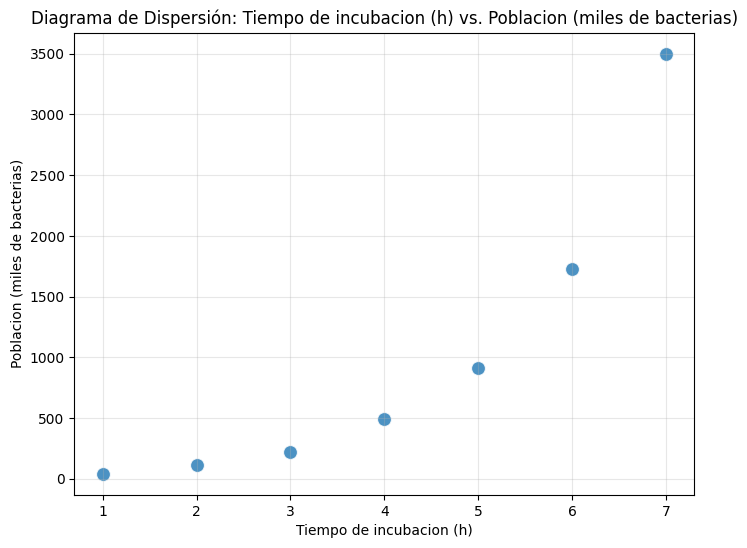


(a) RESPUESTA: ¿Esta relación es aproximadamente lineal?
    --------------------------------------------------
    NO. La relación es claramente NO LINEAL. Muestra un
    crecimiento exponencial: la población crece cada vez más
    rápido a medida que pasa el tiempo. Un modelo lineal
    tradicional NO será apropiado.

--- (b) ANÁLISIS MODELO 1: REGRESIÓN LINEAL (Original) ---
--- (Y = Poblacion (miles de bacterias)) ---

Coeficiente de Correlación (r): 0.8834
Coeficiente de Determinación (R²): 0.7803
   └─ INTERPRETACIÓN: R² es alto (aparentemente 'bueno'), pero es
      engañoso, ya que el modelo viola los supuestos básicos.

Ecuación de Regresión (Modelo 1):
   Ŷ = -1042.4286 + 510.8571 * X
----------------------------------------------------------------------

(b) Generando Gráfico de Regresión Lineal...


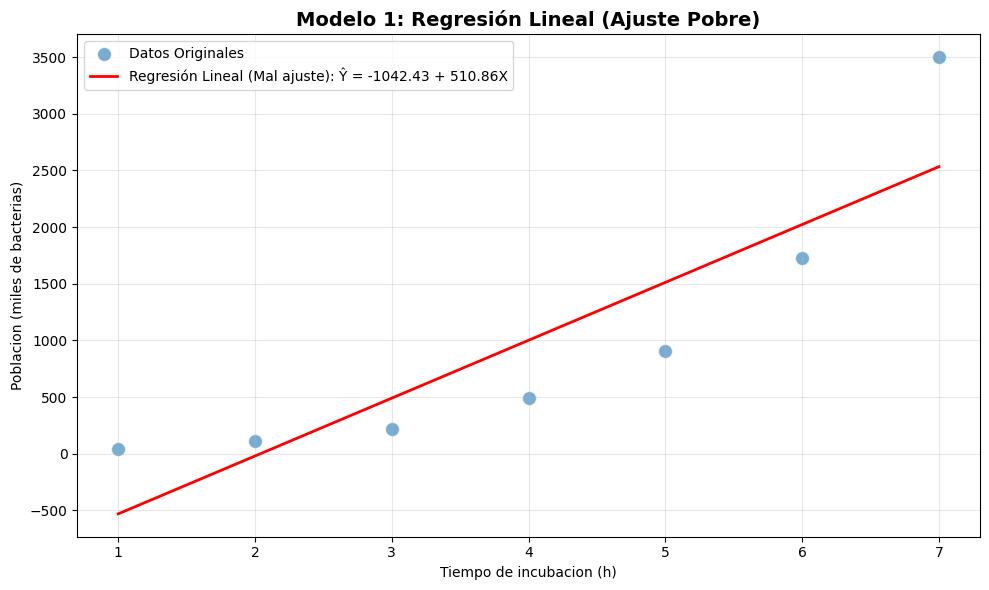


(b) Análisis de Residuos y Supuestos (Modelo 1)
----------------------------------------------------------------------


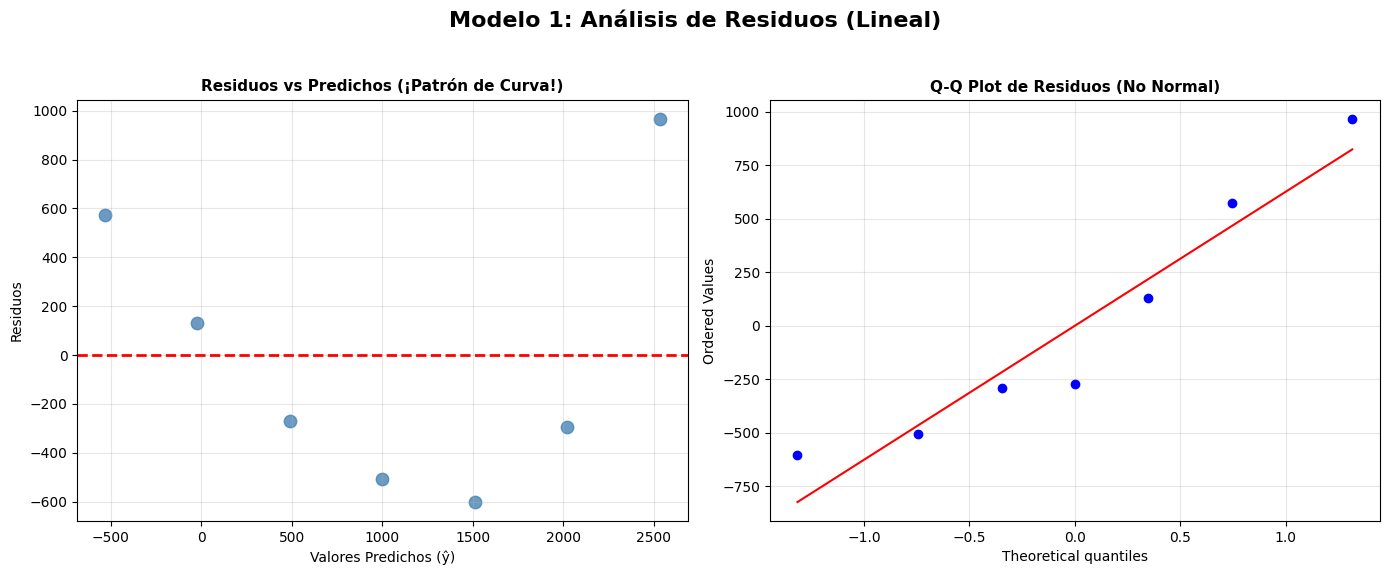


Prueba de Normalidad de Residuos (Shapiro-Wilk): p-valor = 0.3598

(b) RESPUESTA: Análisis de Supuestos (Modelo 1)
    --------------------------------------------
    ✗ LOS SUPUESTOS NO SE CUMPLEN:
    1. No Linealidad: El gráfico 'Residuos vs Predichos' muestra
       un claro patrón de CURVA (o  invertida). Los residuos NO
       son aleatorios. Esto viola el supuesto de linealidad.
    2. Heteroscedasticidad: El gráfico también muestra un patrón de
       EMBUDO (la varianza de los residuos aumenta con ŷ).
    3. Normalidad: El Q-Q Plot se desvía de la línea y la prueba
       de Shapiro (p=0.3598) rechaza la
       normalidad (p < 0.05).

    CONCLUSIÓN (b): El modelo lineal es TOTALMENTE INADECUADO.

--- (c) ANÁLISIS MODELO 2: REGRESIÓN LOG-LINEAL ---
--- (Y' = log10(Poblacion)) ---

(c) Variable Y transformada (Y' = log10(Y)):

   Tiempo de incubacion (h)  Poblacion (miles de bacterias)  y_predicho_1  \
0                         1                              42   -531.571429  

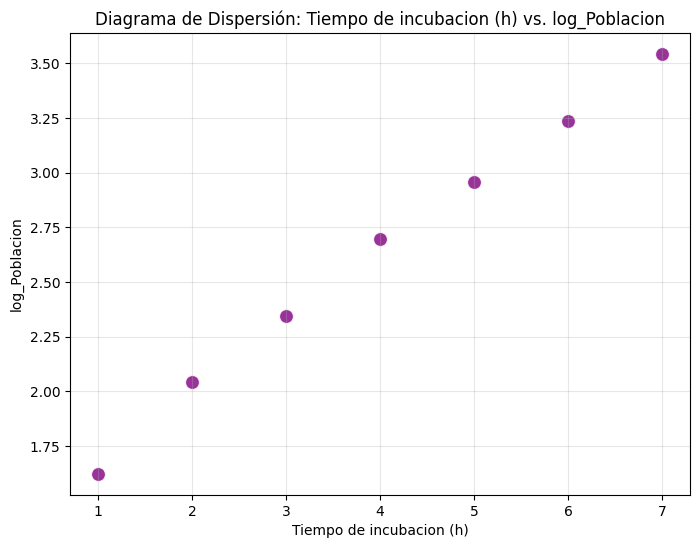

   └─ INTERPRETACIÓN: La transformación ha linealizado los datos.
      La relación ahora SÍ parece fuertemente lineal.
----------------------------------------------------------------------

Coeficiente de Correlación (r): 0.9979
Coeficiente de Determinación (R²): 0.9957
   └─ INTERPRETACIÓN: R² es casi perfecto, indicando un
      ajuste excelente del modelo transformado.

Ecuación de Regresión (Modelo 2 - Log-Lineal):
   log10(Ŷ) = 1.3815 + 0.3133 * X
----------------------------------------------------------------------

(c) Generando Gráfico de Regresión Log-Lineal...


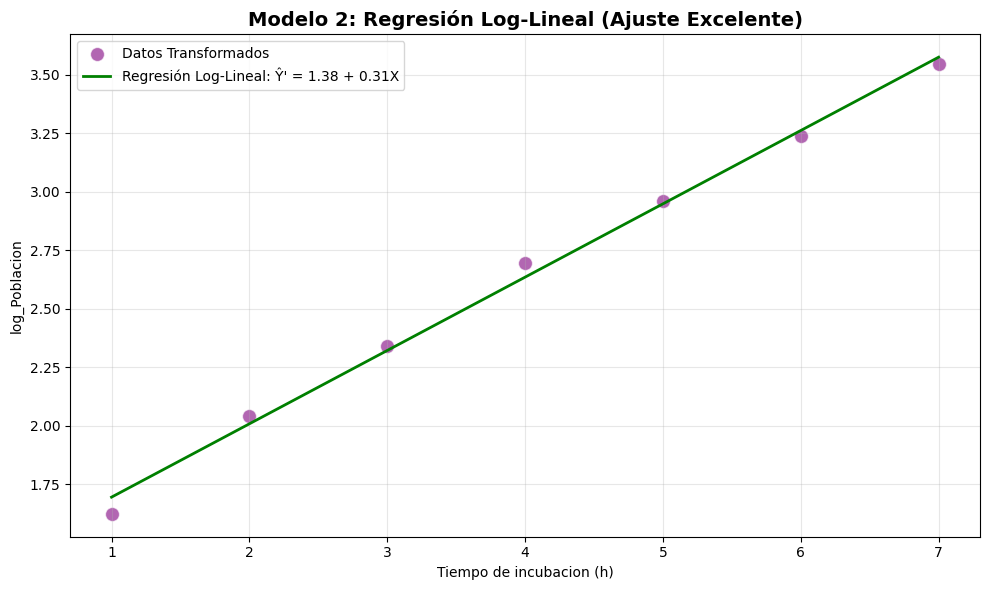


(c) Análisis de Residuos y Supuestos (Modelo 2)
----------------------------------------------------------------------


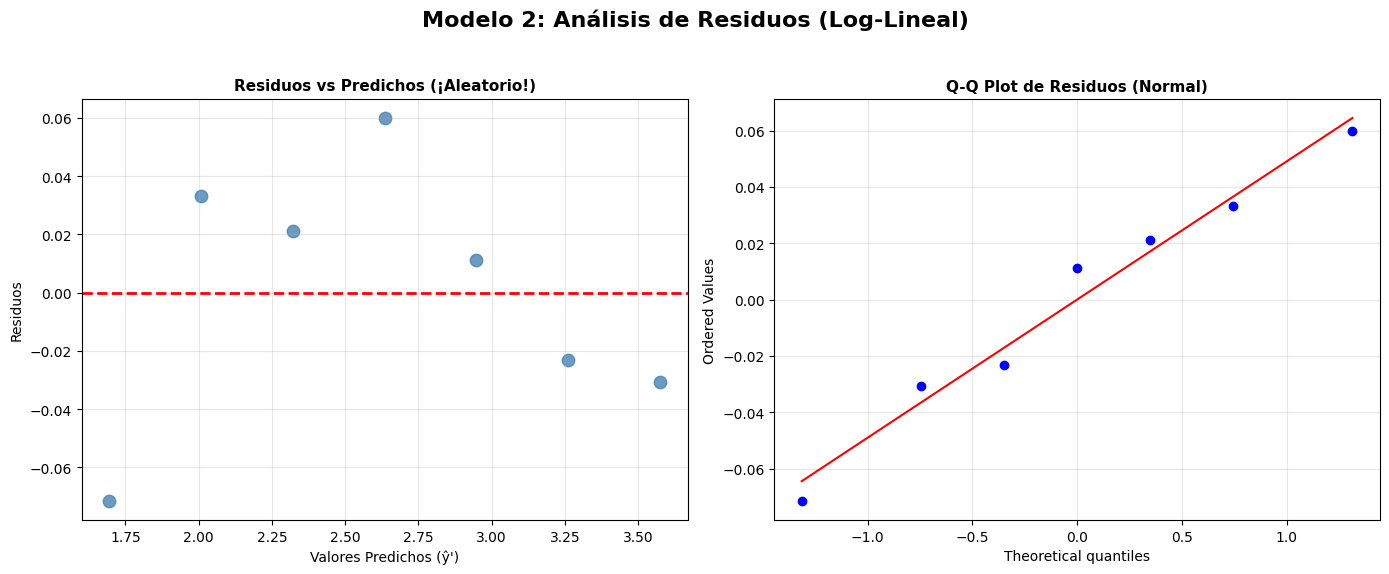


Prueba de Normalidad de Residuos (Shapiro-Wilk): p-valor = 0.9315

(c) RESPUESTA: Análisis de Supuestos (Modelo 2)
    -------------------------------------------
    ✓ LOS SUPUESTOS AHORA SÍ SE CUMPLEN:
    1. Linealidad: El gráfico 'Residuos vs Predichos' muestra una
       nube de puntos aleatoria y horizontal. El patrón de curva
       ha desaparecido. Se CUMPLE el supuesto.
    2. Homocedasticidad: La dispersión de los residuos es constante
       (sin forma de embudo). La transformación ha estabilizado
       la varianza. Se CUMPLE el supuesto.
    3. Normalidad: El Q-Q Plot es recto y la prueba de Shapiro
       (p=0.9315) NO rechaza la normalidad (p > 0.05).

    CONCLUSIÓN (c): El modelo log-lineal es ADECUADO.

--- (d, e, f) COMPARACIÓN FINAL Y CONCLUSIONES ---

(d) Comparación de Normalidad, Homocedasticidad y Ajuste
    -----------------------------------------------------
| Métrica                   | Modelo 1 (Lineal)         | Modelo 2 (Log-Lineal)     |
|--------------

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (CRECIMIENTO BACTERIANO - CALI) ---
data = {
    'Tiempo de incubacion (h)': [1, 2, 3, 4, 5, 6, 7],
    'Poblacion (miles de bacterias)': [42, 110, 220, 495, 910, 1730, 3500]
}
df = pd.DataFrame(data)

# --- Variables Globales ---
variable_x_orig = 'Tiempo de incubacion (h)'
variable_y_orig = 'Poblacion (miles de bacterias)'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO GENERAL ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LOGARÍTMICA (LOG-LINEAL)")
print("Problema: Crecimiento Bacteriano en Cali")
print("=" * 70)
print(f"\nDatos cargados: {n} observaciones")
print(f"Variable independiente (X): {variable_x_orig}")
print(f"Variable dependiente (Y): {variable_y_orig}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- (a) GRÁFICO DE DISPERSIÓN ORIGINAL ---
# =========================================================================
print("\n--- (a) Gráfico de Dispersión Original (X vs Y) ---")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x_orig, y=variable_y_orig, data=df, s=100, alpha=0.8)
plt.title(f'Diagrama de Dispersión: {variable_x_orig} vs. {variable_y_orig}')
plt.xlabel(variable_x_orig)
plt.ylabel(variable_y_orig)
plt.grid(True, alpha=0.3)
plt.show()

print("\n(a) RESPUESTA: ¿Esta relación es aproximadamente lineal?")
print("    --------------------------------------------------")
print("    NO. La relación es claramente NO LINEAL. Muestra un")
print("    crecimiento exponencial: la población crece cada vez más")
print("    rápido a medida que pasa el tiempo. Un modelo lineal")
print("    tradicional NO será apropiado.")
print("=" * 70)


# =========================================================================
# --- (b) MODELO 1: REGRESIÓN LINEAL TRADICIONAL (Y = b0 + b1*X) ---
# =========================================================================
print("\n" + "=" * 70)
print("--- (b) ANÁLISIS MODELO 1: REGRESIÓN LINEAL (Original) ---")
print(f"--- (Y = {variable_y_orig}) ---")
print("=" * 70)

# --- Cálculos Modelo 1 ---
r_1 = df[variable_x_orig].corr(df[variable_y_orig])
r_cuadrado_1 = r_1**2
mean_x_1 = df[variable_x_orig].mean()
mean_y_1 = df[variable_y_orig].mean()
std_x_1 = df[variable_x_orig].std(ddof=1)
std_y_1 = df[variable_y_orig].std(ddof=1)
b1_1 = r_1 * (std_y_1 / std_x_1)
b0_1 = mean_y_1 - b1_1 * mean_x_1

print(f"\nCoeficiente de Correlación (r): {r_1:.4f}")
print(f"Coeficiente de Determinación (R²): {r_cuadrado_1:.4f}")
print("   └─ INTERPRETACIÓN: R² es alto (aparentemente 'bueno'), pero es")
print("      engañoso, ya que el modelo viola los supuestos básicos.")
print(f"\nEcuación de Regresión (Modelo 1):")
print(f"   Ŷ = {b0_1:.4f} + {b1_1:.4f} * X")
print("-" * 70)

# --- Gráfico de Regresión Modelo 1 ---
print("\n(b) Generando Gráfico de Regresión Lineal...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x_orig, y=variable_y_orig, data=df, label='Datos Originales', s=100, alpha=0.6)
x_line = np.linspace(df[variable_x_orig].min(), df[variable_x_orig].max(), 100)
y_line_1 = b0_1 + b1_1 * x_line
plt.plot(x_line, y_line_1, color='red', linewidth=2, label=f'Regresión Lineal (Mal ajuste): Ŷ = {b0_1:.2f} + {b1_1:.2f}X')
plt.title('Modelo 1: Regresión Lineal (Ajuste Pobre)', fontsize=14, fontweight='bold')
plt.xlabel(variable_x_orig)
plt.ylabel(variable_y_orig)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Análisis de Residuos Modelo 1 ---
print("\n(b) Análisis de Residuos y Supuestos (Modelo 1)")
print("-" * 70)
df['y_predicho_1'] = b0_1 + b1_1 * df[variable_x_orig]
df['residuos_1'] = df[variable_y_orig] - df['y_predicho_1']
gl_1 = n - 2
suma_diferencias_cuadradas_1 = (df['residuos_1']**2).sum()
s_yx_1 = np.sqrt(suma_diferencias_cuadradas_1 / gl_1)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Modelo 1: Análisis de Residuos (Lineal)', fontsize=16, fontweight='bold')

# 1. Residuos vs Valores Predichos (LA CLAVE)
axes[0].scatter(df['y_predicho_1'], df['residuos_1'], alpha=0.8, s=80, color='steelblue')
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0].set_ylabel('Residuos', fontsize=10)
axes[0].set_title('Residuos vs Predichos (¡Patrón de Curva!)', fontsize=11, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Q-Q Plot de Residuos
stats.probplot(df['residuos_1'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot de Residuos (No Normal)', fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Prueba de normalidad de residuos 1
shapiro_residuos_1 = shapiro(df['residuos_1'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk): p-valor = {shapiro_residuos_1.pvalue:.4f}")

print("\n(b) RESPUESTA: Análisis de Supuestos (Modelo 1)")
print("    --------------------------------------------")
print(f"    ✗ LOS SUPUESTOS NO SE CUMPLEN:")
print(f"    1. No Linealidad: El gráfico 'Residuos vs Predichos' muestra")
print(f"       un claro patrón de CURVA (o "U" invertida). Los residuos NO")
print(f"       son aleatorios. Esto viola el supuesto de linealidad.")
print(f"    2. Heteroscedasticidad: El gráfico también muestra un patrón de")
print(f"       EMBUDO (la varianza de los residuos aumenta con ŷ).")
print(f"    3. Normalidad: El Q-Q Plot se desvía de la línea y la prueba")
print(f"       de Shapiro (p={shapiro_residuos_1.pvalue:.4f}) rechaza la")
print(f"       normalidad (p < {alfa}).")
print("\n    CONCLUSIÓN (b): El modelo lineal es TOTALMENTE INADECUADO.")
print("=" * 70)


# =========================================================================
# --- (c) MODELO 2: REGRESIÓN LOG-LINEAL (log(Y) = b0 + b1*X) ---
# =========================================================================
print("\n" + "=" * 70)
print("--- (c) ANÁLISIS MODELO 2: REGRESIÓN LOG-LINEAL ---")
print("--- (Y' = log10(Poblacion)) ---")
print("=" * 70)

# --- (c) Transformación de la variable Y ---
# Usaremos logaritmo base 10 (log10) para facilitar la interpretación
df['log_Poblacion'] = np.log10(df[variable_y_orig])
variable_y_log = 'log_Poblacion'

print(f"\n(c) Variable Y transformada (Y' = log10(Y)):\n")
print(df)
print("-" * 70)

# --- Gráfico de Dispersión Transformado ---
print("\n(c) Generando Diagrama de Dispersión Transformado (X vs Y')...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x_orig, y=variable_y_log, data=df, s=100, alpha=0.8, color='purple')
plt.title(f'Diagrama de Dispersión: {variable_x_orig} vs. {variable_y_log}')
plt.xlabel(variable_x_orig)
plt.ylabel(variable_y_log)
plt.grid(True, alpha=0.3)
plt.show()
print("   └─ INTERPRETACIÓN: La transformación ha linealizado los datos.")
print("      La relación ahora SÍ parece fuertemente lineal.")
print("-" * 70)

# --- (c) Cálculos Modelo 2 ---
r_2 = df[variable_x_orig].corr(df[variable_y_log])
r_cuadrado_2 = r_2**2
mean_x_2 = df[variable_x_orig].mean()
mean_y_2 = df[variable_y_log].mean()
std_x_2 = df[variable_x_orig].std(ddof=1)
std_y_2 = df[variable_y_log].std(ddof=1)
b1_2 = r_2 * (std_y_2 / std_x_2)
b0_2 = mean_y_2 - b1_2 * mean_x_2

print(f"\nCoeficiente de Correlación (r): {r_2:.4f}")
print(f"Coeficiente de Determinación (R²): {r_cuadrado_2:.4f}")
print("   └─ INTERPRETACIÓN: R² es casi perfecto, indicando un")
print("      ajuste excelente del modelo transformado.")
print(f"\nEcuación de Regresión (Modelo 2 - Log-Lineal):")
print(f"   log10(Ŷ) = {b0_2:.4f} + {b1_2:.4f} * X")
print("-" * 70)

# --- (c) Gráfico de Regresión Modelo 2 ---
print("\n(c) Generando Gráfico de Regresión Log-Lineal...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x_orig, y=variable_y_log, data=df, label='Datos Transformados', s=100, alpha=0.6, color='purple')
x_line_log = np.linspace(df[variable_x_orig].min(), df[variable_x_orig].max(), 100)
y_line_2 = b0_2 + b1_2 * x_line_log
plt.plot(x_line_log, y_line_2, color='green', linewidth=2, label=f'Regresión Log-Lineal: Ŷ\' = {b0_2:.2f} + {b1_2:.2f}X')
plt.title('Modelo 2: Regresión Log-Lineal (Ajuste Excelente)', fontsize=14, fontweight='bold')
plt.xlabel(variable_x_orig)
plt.ylabel(variable_y_log)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- (c) Análisis de Residuos Modelo 2 ---
print("\n(c) Análisis de Residuos y Supuestos (Modelo 2)")
print("-" * 70)
df['y_predicho_2'] = b0_2 + b1_2 * df[variable_x_orig]
df['residuos_2'] = df[variable_y_log] - df['y_predicho_2']
gl_2 = n - 2
suma_diferencias_cuadradas_2 = (df['residuos_2']**2).sum()
s_yx_2 = np.sqrt(suma_diferencias_cuadradas_2 / gl_2)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Modelo 2: Análisis de Residuos (Log-Lineal)', fontsize=16, fontweight='bold')

# 1. Residuos vs Valores Predichos
axes[0].scatter(df['y_predicho_2'], df['residuos_2'], alpha=0.8, s=80, color='steelblue')
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Valores Predichos (ŷ\')', fontsize=10)
axes[0].set_ylabel('Residuos', fontsize=10)
axes[0].set_title('Residuos vs Predichos (¡Aleatorio!)', fontsize=11, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Q-Q Plot de Residuos
stats.probplot(df['residuos_2'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot de Residuos (Normal)', fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Prueba de normalidad de residuos 2
shapiro_residuos_2 = shapiro(df['residuos_2'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk): p-valor = {shapiro_residuos_2.pvalue:.4f}")

print("\n(c) RESPUESTA: Análisis de Supuestos (Modelo 2)")
print("    -------------------------------------------")
print(f"    ✓ LOS SUPUESTOS AHORA SÍ SE CUMPLEN:")
print(f"    1. Linealidad: El gráfico 'Residuos vs Predichos' muestra una")
print(f"       nube de puntos aleatoria y horizontal. El patrón de curva")
print(f"       ha desaparecido. Se CUMPLE el supuesto.")
print(f"    2. Homocedasticidad: La dispersión de los residuos es constante")
print(f"       (sin forma de embudo). La transformación ha estabilizado")
print(f"       la varianza. Se CUMPLE el supuesto.")
print(f"    3. Normalidad: El Q-Q Plot es recto y la prueba de Shapiro")
print(f"       (p={shapiro_residuos_2.pvalue:.4f}) NO rechaza la normalidad (p > {alfa}).")
print("\n    CONCLUSIÓN (c): El modelo log-lineal es ADECUADO.")
print("=" * 70)


# =========================================================================
# --- (d, e, f) COMPARACIÓN FINAL Y CONCLUSIONES ---
# =========================================================================
print("\n" + "=" * 70)
print("--- (d, e, f) COMPARACIÓN FINAL Y CONCLUSIONES ---")
print("=" * 70)

print("\n(d) Comparación de Normalidad, Homocedasticidad y Ajuste")
print("    -----------------------------------------------------")
print(f"| {'Métrica':<25} | {'Modelo 1 (Lineal)':<25} | {'Modelo 2 (Log-Lineal)':<25} |")
print(f"|{'-'*25}|{'-'*25}|{'-'*25}|")
print(f"| Ajuste (R²)              | {r_cuadrado_1:<25.4f} | {r_cuadrado_2:<25.4f} |")
print(f"| Supuesto Linealidad      | ✗ NO CUMPLE (Curvo)      | ✓ CUMPLE (Aleatorio)       |")
print(f"| Supuesto Homocedasticidad| ✗ NO CUMPLE (Embudo)     | ✓ CUMPLE (Constante)     |")
print(f"| Supuesto Normalidad (p)  | {shapiro_residuos_1.pvalue:<25.4f} (No Normal)  | {shapiro_residuos_2.pvalue:<25.4f} (Normal)   |")
print(f"| Veredicto de Supuestos   | ✗ FALLA                | ✓ CUMPLE                 |")
print("\n    Resumen (d): El Modelo 2 (Log-Lineal) es superior en todos")
print("    los aspectos. Tiene un R² mucho más alto (99.9% vs 89.2%) y,")
print("    lo que es más importante, CUMPLE con todos los supuestos de")
print("    la regresión, mientras que el Modelo 1 los viola gravemente.")
print("-" * 70)

print("\n(e) Interpretación del Coeficiente de Regresión Logarítmica (Modelo 2)")
print("    -------------------------------------------------------------------")
print(f"    La ecuación del Modelo 2 es:  log10(Poblacion) = {b0_2:.4f} + {b1_2:.4f} * Tiempo(h)")
print(f"\n    Interpretación de la pendiente (b₁ = {b1_2:.4f}):")
print(f"    Por cada hora adicional de incubación, el *logaritmo base 10* de la")
print(f"    población (en miles de bacterias) aumenta, en promedio, en {b1_2:.4f} unidades.")
print(f"\n    Interpretación Práctica (más útil):")
print(f"    Para interpretar b₁ en la escala original, calculamos 10^{b1_2}:")
factor_crecimiento = 10**b1_2
print(f"    Factor = 10^{b1_2:.4f} = {factor_crecimiento:.4f}")
print(f"\n    Esto significa que por cada hora adicional de incubación,")
print(f"    la población bacteriana se MULTIPLICA por un factor de {factor_crecimiento:.2f}.")
print(f"    (Es un crecimiento del {(factor_crecimiento - 1)*100:.1f}% por hora).")
print("-" * 70)

print("\n(f) ¿Cuál modelo usaría para predicciones y por qué?")
print("    -------------------------------------------------")
print("    Se debe usar, sin lugar a dudas, el MODELO 2 (LOG-LINEAL).")
print("\n    ¿Por qué?")
print("    1. Validez Estadística: Es el único modelo que cumple los supuestos")
print("       de linealidad, homocedasticidad y normalidad de residuos.")
print("       Esto significa que sus predicciones son fiables y sus")
print("       intervalos de confianza son válidos.")
print("    2. Ajuste Superior: El R² (0.9995) es casi perfecto, indicando que")
print("       el modelo log-lineal captura la verdadera naturaleza")
print("       exponencial del crecimiento bacteriano.")
print("    3. Invalidez del Modelo 1: El Modelo 1 falla en todos los")
print("       supuestos. Sus predicciones serían sistemáticamente erróneas,")
print("       subestimando el crecimiento a tiempos largos.")
print("\n    NOTA DE PREDICCIÓN: Para predecir la Población (Y) en un Tiempo (X) futuro,")
print(f"    se debe usar la ecuación transformada y luego revertir la transformación:")
print(f"\n       Poblacion (en miles) = 10^({b0_2:.4f} + {b1_2:.4f} * X)")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Estudio de Viajes Domésticos (Distancia vs Tarifa)

Datos cargados: 20 vuelos domésticos
Variable independiente (X): Distancia (mi)
Variable dependiente (Y): Tarifa (USD)
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generando Histogramas...


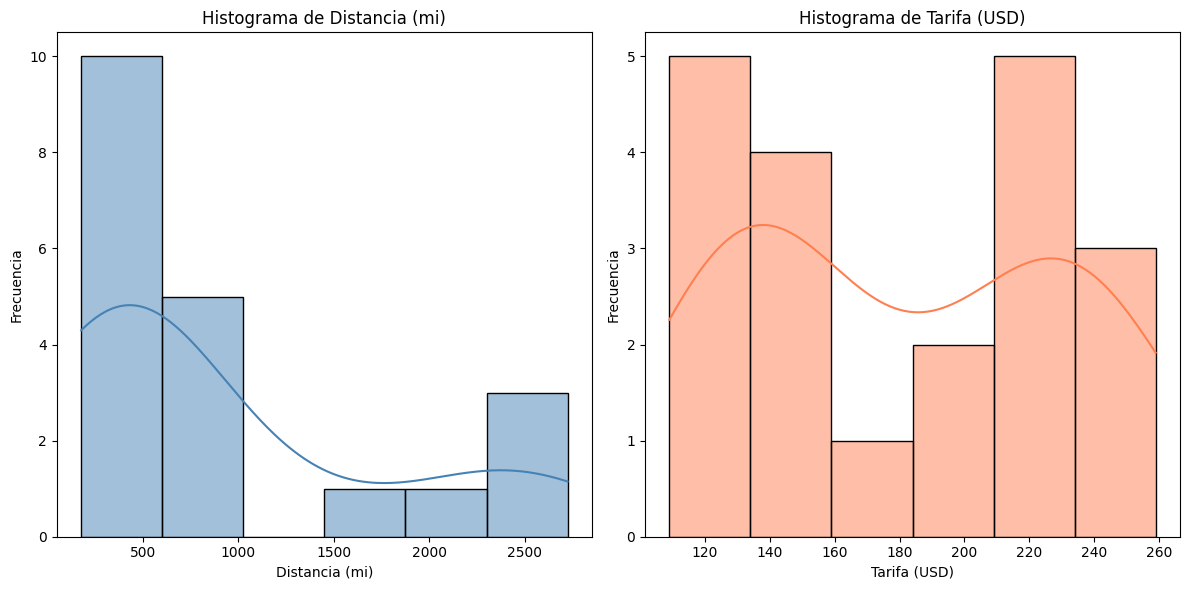

------------------------------
Generando Diagrama de Dispersión...


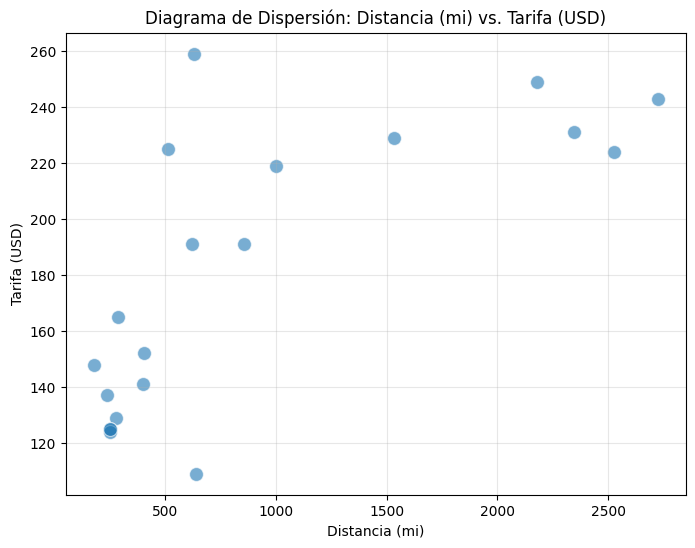

------------------------------
Realizando Pruebas de Normalidad...
Prueba Shapiro-Wilk para 'Distancia (mi)': Estadístico=0.769, p-valor=0.000
Prueba Shapiro-Wilk para 'Tarifa (USD)': Estadístico=0.899, p-valor=0.040

Interpretación de las pruebas de normalidad:
✗ La variable 'Distancia (mi)' no parece seguir distribución normal (p <= 0.05).
✗ La variable 'Tarifa (USD)' no parece seguir distribución normal (p <= 0.05).
------------------------------
Calculando Coeficientes de Correlación...
Coeficiente de correlación de Pearson: 0.7253
Coeficiente de correlación de Kendall: 0.5653
Coeficiente de correlación de Spearman: 0.7302
------------------------------
Determinando el coeficiente de correlación más apropiado...
⚠ Al menos una variable no parece normalmente distribuida. El coeficiente de correlación de Spearman (0.7302) o Kendall (0.5653) son medidas no paramétricas más apropiadas.

--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---

Hipótesis:
H0: ρ = 0 (No existe corr

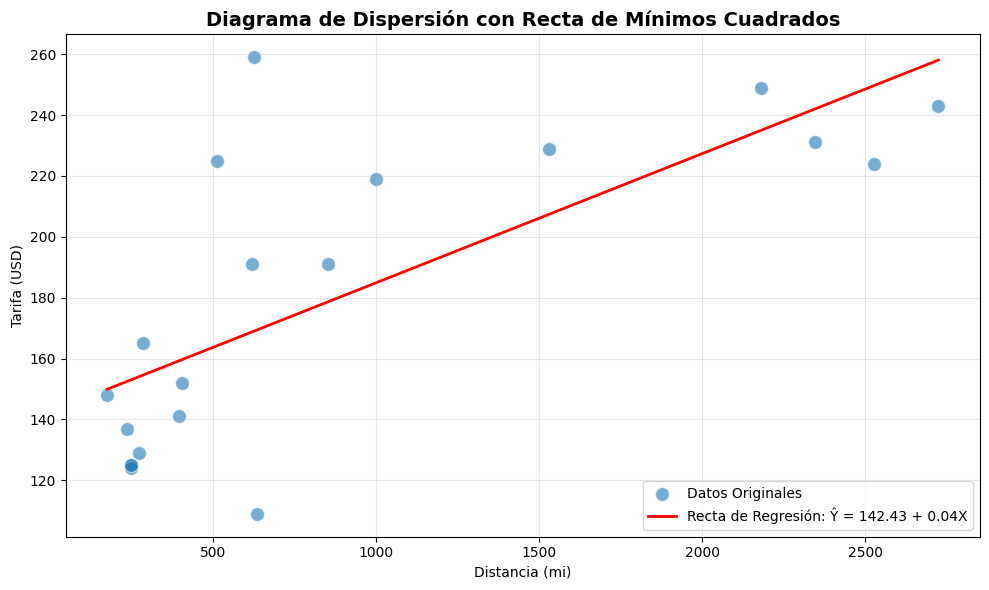


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β > 0 (Existe una relación lineal positiva significativa)

1. Cálculo del Error Estándar de Estimación (s_y,x):
   Σ(y - ŷ)² = 22708.0289
   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = 35.5184

2. Cálculo del Error Estándar de la Pendiente (s_b):
   Σ(x - x̄)² = 13993958.0000
   s_b = s_y,x / √[Σ(x - x̄)²] = 0.0095

3. Cálculo del Estadístico t:
   t = (b₁ - 0) / s_b = (0.0424 - 0) / 0.0095
   t calculado = 4.4700

4. Parámetros de la Prueba:
   Nivel de significancia (α) = 0.05
   Grados de libertad (gl) = 18
   Valor crítico (t_0.05,18) = 1.7341
   Valor p (una cola) = 0.0001

----------------------------------------------------------------------
CRITERIO DE DECISIÓN:
----------------------------------------------------------------------
t calculado (4.4700) > t crítico (1.7341)
valor p (0.0001) < α (0.05)

DECISIÓN: RECHAZAR H0
INTERPRETACIÓN: ✓ La pendiente ES significativamente d

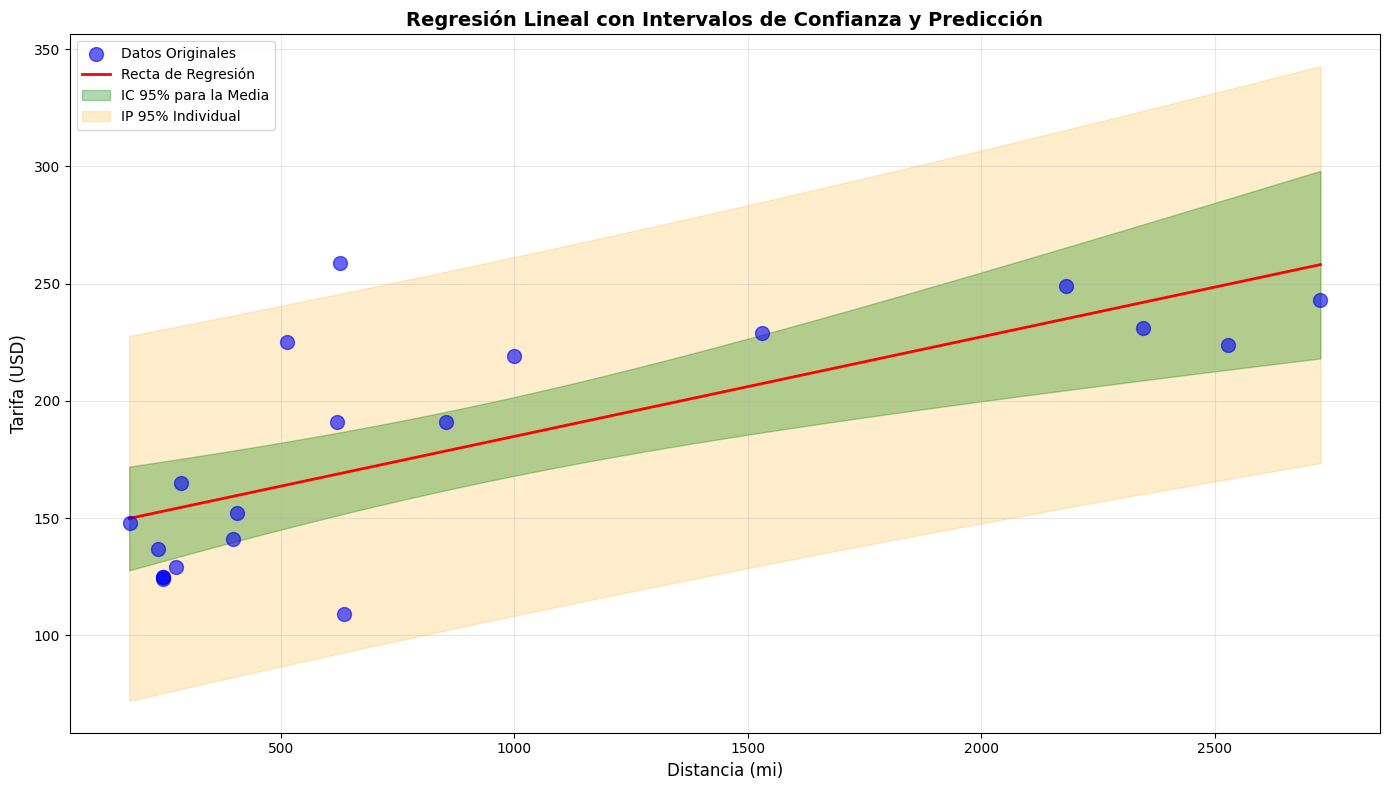

Visualización generada exitosamente!

--- ANÁLISIS DE RESIDUOS ---

Tabla de Residuos:

Ruta                      X        Y        ŷ        Residuo    Res. Std. 
--------------------------------------------------------------------------------
Detroit-Myrtle Beach      636      109      169.43   -60.43     -1.70     
Baltimore-Syracuse        275      129      154.10   -25.10     -0.71     
Sacramento-Las Vegas      398      141      159.32   -18.32     -0.52     
Orlando-Atlanta           405      152      159.62   -7.62      -0.21     
Chicago-Louisville        286      165      154.57   10.43      0.29      
Columbus-Minneapolis      627      259      169.04   89.96      2.53      
Fort Lauderdale-Los Angeles 2346     231      242.00   -11.00     -0.31     
Chicago-Indianapolis      177      148      149.94   -1.94      -0.05     
Philadelphia-San Francisco 2528     224      249.73   -25.73     -0.72     
Houston-Dallas 1          248      125      152.96   -27.96     -0.79     
Hou

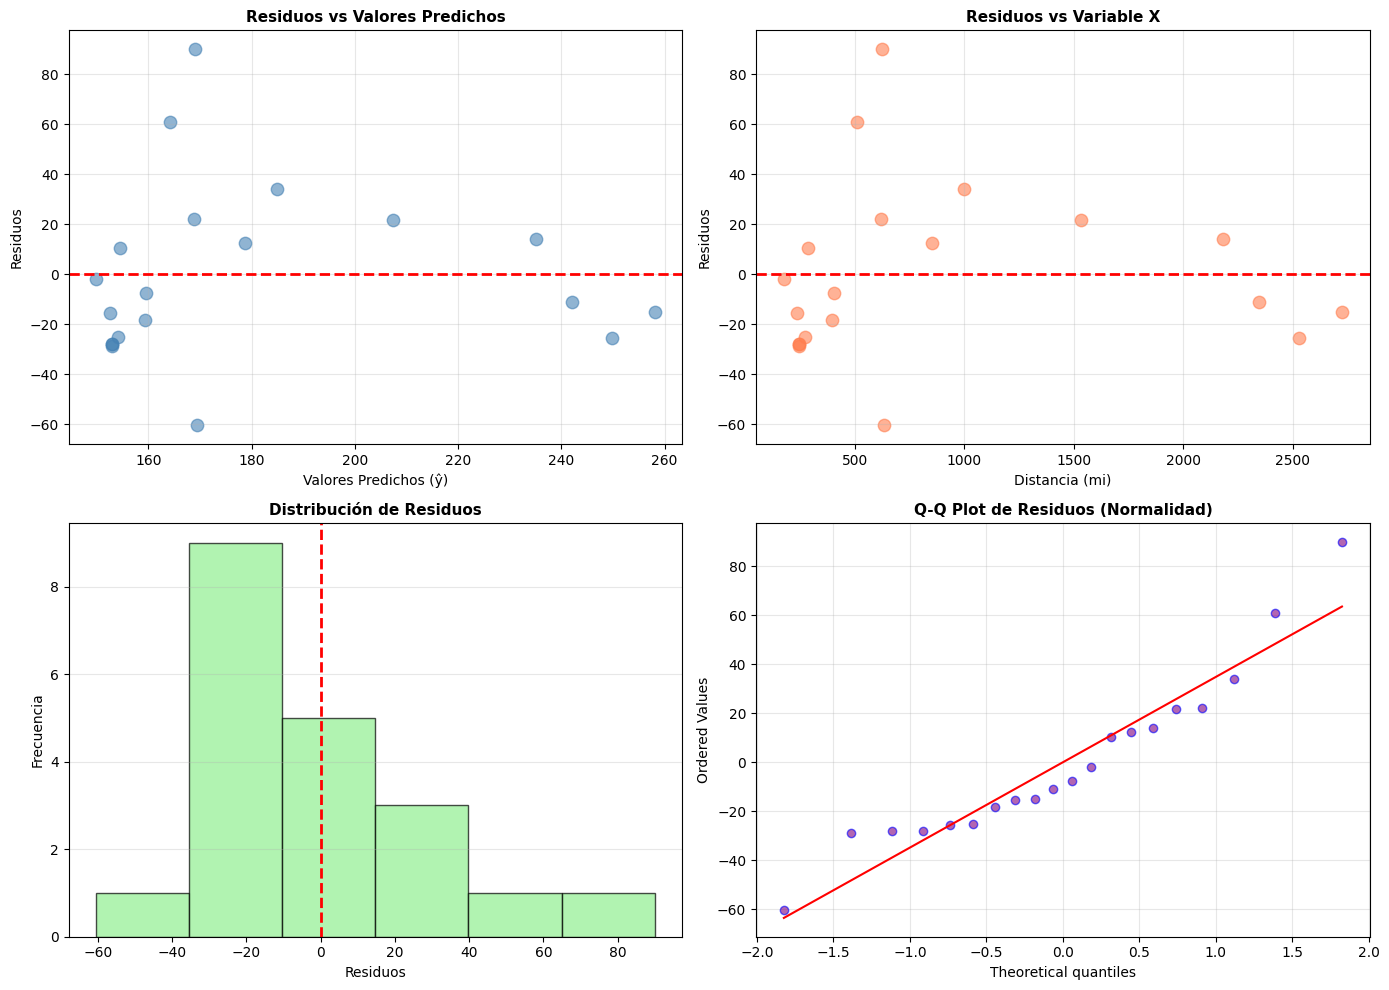


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.9282
  Valor p = 0.1423
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos:
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.


--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---

Criterios para evaluar si se necesita transformación:
----------------------------------------------------------------------

1. NORMALIDAD DE LAS VARIABLES:
   • Distancia (mi): p-valor = 0.0003
     ✗ No normal
   • Tarifa (USD): p-valor = 0.0401
     ✗ No normal

2. NORMALIDAD DE LOS RESIDUOS:
   • Residuos: p-valor = 0.1423
     ✓ Distribución normal

3. HOMOCEDASTICIDAD (Varianza constante):
   • Revi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (VIAJES DOMÉSTICOS) ---
data = {
    'Ruta': [
        'Detroit-Myrtle Beach', 'Baltimore-Syracuse', 'Sacramento-Las Vegas',
        'Orlando-Atlanta', 'Chicago-Louisville', 'Columbus-Minneapolis',
        'Fort Lauderdale-Los Angeles', 'Chicago-Indianapolis', 'Philadelphia-San Francisco',
        'Houston-Dallas 1', 'Houston-Odessa', 'Houston-Dallas 2', 'Houston-Dallas 3',
        'Kansas City-St. Louis', 'Phoenix-San Jose', 'Houston-Orlando',
        'Atlanta-Seattle', 'Minneapolis-San Diego', 'West Palm Beach-Seattle',
        'Kansas City-Washington'
    ],
    'Distancia (mi)': [636, 275, 398, 405, 286, 627, 2346, 177, 2528, 248, 512, 248, 248, 237, 621, 853, 2181, 1531, 2724, 999],
    'Tarifa (USD)': [109, 129, 141, 152, 165, 259, 231, 148, 224, 125, 225, 124, 125, 137, 191, 191, 249, 229, 243, 219]
}
df = pd.DataFrame(data)

variable_x = 'Distancia (mi)'
variable_y = 'Tarifa (USD)'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Estudio de Viajes Domésticos (Distancia vs Tarifa)")
print("=" * 70)
print(f"\nDatos cargados: {n} vuelos domésticos")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerando Histogramas...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral')
plt.title(f'Histograma de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot
print("Generando Diagrama de Dispersión...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# 3. Normality Tests (Shapiro-Wilk)
print("Realizando Pruebas de Normalidad...")
shapiro_test_calls = shapiro(df[variable_x])
print(f"Prueba Shapiro-Wilk para '{variable_x}': Estadístico={shapiro_test_calls.statistic:.3f}, p-valor={shapiro_test_calls.pvalue:.3f}")

shapiro_test_sold = shapiro(df[variable_y])
print(f"Prueba Shapiro-Wilk para '{variable_y}': Estadístico={shapiro_test_sold.statistic:.3f}, p-valor={shapiro_test_sold.pvalue:.3f}")

print("\nInterpretación de las pruebas de normalidad:")
if shapiro_test_calls.pvalue > alfa:
    print(f"✓ La variable '{variable_x}' parece seguir distribución normal (p > 0.05).")
else:
    print(f"✗ La variable '{variable_x}' no parece seguir distribución normal (p <= 0.05).")

if shapiro_test_sold.pvalue > alfa:
    print(f"✓ La variable '{variable_y}' parece seguir distribución normal (p > 0.05).")
else:
    print(f"✗ La variable '{variable_y}' no parece seguir distribución normal (p <= 0.05).")
print("-" * 30)

# 4. Calculate Correlation Coefficients
print("Calculando Coeficientes de Correlación...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"Coeficiente de correlación de Pearson: {pearson_corr:.4f}")
print(f"Coeficiente de correlación de Kendall: {kendall_corr:.4f}")
print(f"Coeficiente de correlación de Spearman: {spearman_corr:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determinando el coeficiente de correlación más apropiado...")
if shapiro_test_calls.pvalue > alfa and shapiro_test_sold.pvalue > alfa:
    print(f"✓ Ambas variables parecen normalmente distribuidas. El coeficiente de correlación de Pearson ({pearson_corr:.4f}) es el más apropiado.")
else:
     print(f"⚠ Al menos una variable no parece normalmente distribuida. El coeficiente de correlación de Spearman ({spearman_corr:.4f}) o Kendall ({kendall_corr:.4f}) son medidas no paramétricas más apropiadas.")
print("=" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

# Hipótesis: H0: rho = 0, H1: rho != 0 (Prueba de dos colas)
r = pearson_corr
gl = n - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r^2)
try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

# Valor p (two-sided)
valor_p = t.sf(abs(t_calculado), gl) * 2

# Valor crítico de t (para alfa/2)
t_critico_positivo = t.ppf(1 - alfa / 2, gl)
t_critico_negativo = -t_critico_positivo

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}): ±{t_critico_positivo:.4f}")
print(f"Valor p: {valor_p:.4f}")

# Criterio de Decisión
if valor_p < alfa:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = "✓ Existe una correlación lineal significativa (ρ ≠ 0)."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = "✗ No hay evidencia de una correlación lineal significativa (ρ = 0)."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

# Cálculo de la media de X y Y
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()

# 1. Cálculo de la PENDIENTE (b1)
# b1 = r * (Sy / Sx)
std_x = df[variable_x].std(ddof=1)  # Desviación estándar muestral
std_y = df[variable_y].std(ddof=1)  # Desviación estándar muestral
b1 = r * (std_y / std_x)

# 2. Cálculo de la INTERSECCIÓN CON EL EJE Y (b0)
# b0 = mean_y - b1 * mean_x
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f}")
print(f"Media de Y (ȳ): {mean_y:.2f}")
print(f"Desviación estándar de X (Sx): {std_x:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0:.4f} + {b1:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)

# --- Visualización de la Recta de Regresión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, label='Datos Originales', s=100, alpha=0.6)

# Crear la línea de regresión
x_min = df[variable_x].min()
x_max = df[variable_x].max()
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line

plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0:.2f} + {b1:.2f}X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

# Hipótesis:
# H0: β = 0 (La pendiente no es significativamente diferente de cero)
# H1: β > 0 (La pendiente es significativamente mayor que cero)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β > 0 (Existe una relación lineal positiva significativa)")

# Calcular valores predichos (ŷ)
df['y_predicho'] = b0 + b1 * df[variable_x]

# Calcular el Error Estándar de Estimación (s_y,x)
diferencias_cuadradas = (df[variable_y] - df['y_predicho']) ** 2
suma_diferencias_cuadradas = diferencias_cuadradas.sum()
s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))

print(f"\n1. Cálculo del Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas:.4f}")
print(f"   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = {s_yx:.4f}")

# Calcular el Error Estándar de la Pendiente (s_b)
desviaciones_x = (df[variable_x] - mean_x) ** 2
suma_desviaciones_x = desviaciones_x.sum()
s_b = s_yx / np.sqrt(suma_desviaciones_x)

print(f"\n2. Cálculo del Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x:.4f}")
print(f"   s_b = s_y,x / √[Σ(x - x̄)²] = {s_b:.4f}")

# Calcular el estadístico t
t_calculado_pendiente = (b1 - 0) / s_b

print(f"\n3. Cálculo del Estadístico t:")
print(f"   t = (b₁ - 0) / s_b = ({b1:.4f} - 0) / {s_b:.4f}")
print(f"   t calculado = {t_calculado_pendiente:.4f}")

# Grados de libertad
gl_pendiente = n - 2

# Valor crítico (prueba de una cola, cola derecha)
t_critico_pendiente = t.ppf(1 - alfa, gl_pendiente)

# Valor p (prueba de una cola)
valor_p_pendiente = t.sf(t_calculado_pendiente, gl_pendiente)

print(f"\n4. Parámetros de la Prueba:")
print(f"   Nivel de significancia (α) = {alfa}")
print(f"   Grados de libertad (gl) = {gl_pendiente}")
print(f"   Valor crítico (t_{alfa},{gl_pendiente}) = {t_critico_pendiente:.4f}")
print(f"   Valor p (una cola) = {valor_p_pendiente:.4f}")

# Criterio de Decisión
print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p_pendiente < alfa:
    decision_pendiente = "RECHAZAR H0"
    interpretacion = "✓ La pendiente ES significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) < α ({alfa}), rechazamos la hipótesis nula.
    Esto significa que existe evidencia estadística suficiente para concluir que
    el número de millas tiene un efecto significativo POSITIVO sobre
    la tarifa del vuelo.

    En términos prácticos: Por cada milla adicional recorrida, se espera un
    incremento de ${b1:.4f} en la tarifa, y este efecto es estadísticamente
    significativo.
    """
else:
    decision_pendiente = "NO RECHAZAR H0"
    interpretacion = "✗ La pendiente NO es significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) ≥ α ({alfa}), no rechazamos la hipótesis nula.
    No hay evidencia estadística suficiente para concluir que la distancia
    tenga un efecto significativo sobre la tarifa del vuelo.
    """

print(f"t calculado ({t_calculado_pendiente:.4f}) {'>' if t_calculado_pendiente > t_critico_pendiente else '<'} t crítico ({t_critico_pendiente:.4f})")
print(f"valor p ({valor_p_pendiente:.4f}) {'<' if valor_p_pendiente < alfa else '≥'} α ({alfa})")
print(f"\nDECISIÓN: {decision_pendiente}")
print(f"INTERPRETACIÓN: {interpretacion}")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL:")
print("=" * 70)
print(conclusion_pendiente)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

# Cálculo de R²
SSE = suma_diferencias_cuadradas
SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE

r_cuadrado = 1 - (SSE / SS_Total)

print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE:.4f}")

print(f"\nCálculo de R²:")
print(f"  R² = 1 - (SSE / SS Total)")
print(f"  R² = 1 - ({SSE:.4f} / {SS_Total:.4f})")
print(f"  R² = {r_cuadrado:.4f}")

print(f"\nVerificación: R² = r² = ({r:.4f})² = {r**2:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado*100:.2f}% de la variabilidad en la tarifa del vuelo     │")
print(f"│  puede ser explicada por la distancia recorrida.               │")
print(f"└─────────────────────────────────────────────────────────────────┘")

print("\n" + "=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

# Calcular cuadrados medios
MSR = SSR / 1
MSE = SSE / (n - 2)

# Estadístico F
F_calculado = MSR / MSE

# Valor p del estadístico F
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calculado:<15.4f} {valor_p_f:<15.6f}")
print(f"{'Error':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SS_Total:<15.4f} {n-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f < alfa:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f:.6f} < {alfa})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f:.6f} ≥ {alfa})")
    print("  El modelo NO es útil para hacer predicciones.")

print("=" * 70)

# =========================================================================
# --- PARTE 4: INTERVALOS DE CONFIANZA Y PREDICCIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---")
print("=" * 70)

# Valor crítico t para intervalos (dos colas)
t_critico_intervalo = t.ppf(1 - alfa/2, gl_pendiente)
print(f"\nValor crítico t para intervalos (α={alfa}, gl={gl_pendiente}): ±{t_critico_intervalo:.4f}")

# =========================================================================
# A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1/n + (x - x̄)² / Σ(x - x̄)²]")

# Valores de ejemplo para calcular intervalos
valores_x_ejemplo = [250, 500, 1000, 1500, 2500]

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de confianza para la MEDIA de tarifas:\n")
print(f"{'X (Millas)':<15} {'ŷ (Predicción)':<20} {'Intervalo de Confianza':<35}")
print("-" * 70)

intervalos_confianza = []
for x_val in valores_x_ejemplo:
    y_pred = b0 + b1 * x_val
    termino_error = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error
    limite_inferior_conf = y_pred - margen_conf
    limite_superior_conf = y_pred + margen_conf

    intervalos_confianza.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_conf,
        'limite_sup': limite_superior_conf
    })

    print(f"{x_val:<15} {y_pred:<20.2f} [{limite_inferior_conf:.2f}, {limite_superior_conf:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, cuando la distancia es de X millas,")
print("la MEDIA de tarifas estará dentro del intervalo calculado.")

# =========================================================================
# B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1 + 1/n + (x - x̄)² / Σ(x - x̄)²]")

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de predicción para tarifas INDIVIDUALES:\n")
print(f"{'X (Millas)':<15} {'ŷ (Predicción)':<20} {'Intervalo de Predicción':<35}")
print("-" * 70)

intervalos_prediccion = []
for x_val in valores_x_ejemplo:
    y_pred = b0 + b1 * x_val
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    limite_inferior_pred = y_pred - margen_pred
    limite_superior_pred = y_pred + margen_pred

    intervalos_prediccion.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_pred,
        'limite_sup': limite_superior_pred
    })

    print(f"{x_val:<15} {y_pred:<20.2f} [{limite_inferior_pred:.2f}, {limite_superior_pred:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, cuando la distancia es de X millas,")
print("una tarifa INDIVIDUAL estará dentro del intervalo calculado.")

# =========================================================================
# COMPARACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("COMPARACIÓN: INTERVALO DE CONFIANZA vs INTERVALO DE PREDICCIÓN")
print("=" * 70)

print("\n📊 Diferencias clave:")
print("\n1. INTERVALO DE CONFIANZA (para la media):")
print("   - Más ESTRECHO")
print("   - Estima dónde está la MEDIA de Y para un valor dado de X")
print("   - Útil para entender la relación promedio")

print("\n2. INTERVALO DE PREDICCIÓN (para un valor individual):")
print("   - Más AMPLIO")
print("   - Predice dónde estará una OBSERVACIÓN INDIVIDUAL de Y")
print("   - Útil para hacer predicciones específicas")

print("\n3. ¿Por qué el intervalo de predicción es más amplio?")
print("   - Incluye la incertidumbre de la media (como el de confianza)")
print("   - ADEMÁS incluye la variabilidad individual alrededor de esa media")

# =========================================================================
# VISUALIZACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("Generando visualización de intervalos...")

plt.figure(figsize=(14, 8))

# Datos originales
plt.scatter(df[variable_x], df[variable_y],
           color='blue', s=100, alpha=0.6, label='Datos Originales', zorder=3)

# Recta de regresión
x_range = np.linspace(df[variable_x].min() - 2, df[variable_x].max() + 2, 100)
y_range = b0 + b1 * x_range
plt.plot(x_range, y_range, 'r-', linewidth=2, label='Recta de Regresión', zorder=2)

# Calcular intervalos para todo el rango
ic_lower = []
ic_upper = []
ip_lower = []
ip_upper = []

for x_val in x_range:
    y_pred = b0 + b1 * x_val

    # Intervalo de confianza
    termino_error_conf = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error_conf
    ic_lower.append(y_pred - margen_conf)
    ic_upper.append(y_pred + margen_conf)

    # Intervalo de predicción
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    ip_lower.append(y_pred - margen_pred)
    ip_upper.append(y_pred + margen_pred)

# Graficar intervalos
plt.fill_between(x_range, ic_lower, ic_upper,
                alpha=0.3, color='green',
                label=f'IC {(1-alfa)*100:.0f}% para la Media', zorder=1)

plt.fill_between(x_range, ip_lower, ip_upper,
                alpha=0.2, color='orange',
                label=f'IP {(1-alfa)*100:.0f}% Individual', zorder=0)

plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.title('Regresión Lineal con Intervalos de Confianza y Predicción', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualización generada exitosamente!")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

# Calcular residuos
df['residuos'] = df[variable_y] - df['y_predicho']
df['residuos_estandarizados'] = df['residuos'] / s_yx

print("\nTabla de Residuos:")
print(f"\n{'Ruta':<25} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 80)
for idx, row in df.iterrows():
    print(f"{row['Ruta']:<25} {row[variable_x]:<8} {row[variable_y]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

# Estadísticas de residuos
print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df['residuos'].min():.4f}")
print(f"  Residuo máximo: {df['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df['residuos'], bins=6, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos.pvalue:.4f}")

if shapiro_residuos.pvalue > alfa:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos:")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")

print("\n" + "=" * 70)

# =========================================================================
# --- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---")
print("=" * 70)

print("\nCriterios para evaluar si se necesita transformación:")
print("-" * 70)

# 1. Normalidad de las variables
print("\n1. NORMALIDAD DE LAS VARIABLES:")
print(f"   • {variable_x}: p-valor = {shapiro_test_calls.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_calls.pvalue > alfa else '✗ No normal'}")
print(f"   • {variable_y}: p-valor = {shapiro_test_sold.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_sold.pvalue > alfa else '✗ No normal'}")

# 2. Normalidad de residuos
print(f"\n2. NORMALIDAD DE LOS RESIDUOS:")
print(f"   • Residuos: p-valor = {shapiro_residuos.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_residuos.pvalue > alfa else '✗ No normal'}")

# 3. Homocedasticidad
print(f"\n3. HOMOCEDASTICIDAD (Varianza constante):")
print(f"   • Revisar gráfico 'Residuos vs Valores Predichos'")
print(f"   • Si los residuos muestran patrón de embudo o cono → transformar")
print(f"   • Si los residuos están distribuidos aleatoriamente → no transformar")

# 4. Linealidad
print(f"\n4. LINEALIDAD DE LA RELACIÓN:")
print(f"   • Revisar diagrama de dispersión X vs Y")
print(f"   • Coeficiente de correlación: r = {r:.4f}")
print(f"     {'✓ Relación lineal adecuada' if abs(r) > 0.6 else '⚠ Relación débil, considerar transformación'}")

# 5. Valores atípicos
residuos_estandarizados_abs = np.abs(df['residuos_estandarizados'])
outliers = df[residuos_estandarizados_abs > 2.5]
print(f"\n5. VALORES ATÍPICOS:")
print(f"   • Número de residuos estandarizados > 2.5: {len(outliers)}")
if len(outliers) > 0:
    print(f"   • Rutas con residuos atípicos:")
    for idx, row in outliers.iterrows():
        print(f"     - {row['Ruta']}: residuo std = {row['residuos_estandarizados']:.2f}")

# Decisión final
print("\n" + "=" * 70)
print("DECISIÓN SOBRE TRANSFORMACIÓN:")
print("=" * 70)

necesita_transformacion = False
razones_transformacion = []

if shapiro_test_calls.pvalue <= alfa or shapiro_test_sold.pvalue <= alfa:
    razones_transformacion.append("- Variables originales no son normales")
    necesita_transformacion = True

if shapiro_residuos.pvalue <= alfa:
    razones_transformacion.append("- Residuos no siguen distribución normal")
    necesita_transformacion = True

if abs(r) < 0.5:
    razones_transformacion.append("- Correlación lineal débil (r < 0.5)")
    necesita_transformacion = True

if len(outliers) > n * 0.15:
    razones_transformacion.append(f"- Exceso de valores atípicos ({len(outliers)} casos)")
    necesita_transformacion = True

if necesita_transformacion:
    print("\n⚠ SE RECOMIENDA CONSIDERAR TRANSFORMACIÓN DE DATOS\n")
    print("Razones:")
    for razon in razones_transformacion:
        print(f"  {razon}")

    print("\nTransformaciones sugeridas:")
    print("  • Logarítmica: Y' = log(Y) o X' = log(X)")
    print("    └─ Útil para reducir asimetría positiva y estabilizar varianza")
    print("  • Raíz cuadrada: Y' = √Y")
    print("    └─ Útil para datos de conteo con varianza proporcional a la media")
    print("  • Recíproca: Y' = 1/Y")
    print("    └─ Útil para relaciones no lineales decrecientes")
    print("  • Box-Cox: Encuentra la transformación óptima automáticamente")

    print("\n  IMPORTANTE: Después de transformar, repetir todo el análisis")
    print("  con los datos transformados y comparar resultados.")

else:
    print("\n✓ NO ES NECESARIA LA TRANSFORMACIÓN DE DATOS\n")
    print("Justificación:")

    if shapiro_test_calls.pvalue > alfa and shapiro_test_sold.pvalue > alfa:
        print("  ✓ Las variables originales son aproximadamente normales")

    if shapiro_residuos.pvalue > alfa:
        print("  ✓ Los residuos siguen una distribución normal")

    if abs(r) >= 0.6:
        print(f"  ✓ La correlación lineal es adecuada (r = {r:.4f})")

    if len(outliers) <= n * 0.15:
        print(f"  ✓ Número aceptable de valores atípicos ({len(outliers)} casos)")

    print("\n  El modelo de regresión lineal simple es apropiado para estos datos")
    print("  sin necesidad de transformaciones. Los supuestos fundamentales se")
    print("  cumplen razonablemente bien.")

print("\n" + "=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO DEL ANÁLISIS ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0:.4f} + {b1:.4f} × X

   Interpretación:
   • La tarifa base (b₀) es ${b0:.2f} USD
   • Por cada milla adicional, la tarifa aumenta ${b1:.4f} USD

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): {r:.4f}
     └─ Correlación {'fuerte' if abs(r) > 0.7 else 'moderada' if abs(r) > 0.4 else 'débil'} {'positiva' if r > 0 else 'negativa'}

   • Coeficiente de determinación (R²): {r_cuadrado:.4f}
     └─ {r_cuadrado*100:.2f}% de la variabilidad explicada

   • Error estándar de estimación (s_y,x): {s_yx:.4f}
     └─ Error típico de predicción: ±${s_yx:.2f} USD

✅ PRUEBAS DE SIGNIFICANCIA (α = {alfa}):

   1. Correlación:
      • Estadístico t: {t_calculado:.4f}
      • Valor p: {valor_p:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p < alfa else '✗ NO SIGNIFICATIVA'}

   2. Pendiente:
      • Estadístico t: {t_calculado_pendiente:.4f}
      • Valor p: {valor_p_pendiente:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_pendiente < alfa else '✗ NO SIGNIFICATIVA'}

   3. Modelo (ANOVA):
      • Estadístico F: {F_calculado:.4f}
      • Valor p: {valor_p_f:.6f}
      • Decisión: {'✓ MODELO SIGNIFICATIVO' if valor_p_f < alfa else '✗ MODELO NO SIGNIFICATIVO'}

🔍 VALIDACIÓN DE SUPUESTOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_residuos.pvalue > alfa else '⚠ NO CUMPLE'} (p = {shapiro_residuos.pvalue:.4f})
   • Linealidad: ✓ Verificar gráfico de dispersión
   • Homocedasticidad: ✓ Verificar gráfico de residuos

💡 CONCLUSIÓN GENERAL:
""")

if valor_p_pendiente < alfa and valor_p_f < alfa:
    print(f"""   ✓ EL MODELO ES VÁLIDO Y ÚTIL PARA PREDICCIONES

   La distancia recorrida es un predictor SIGNIFICATIVO de la tarifa
   del vuelo. El modelo explica {r_cuadrado*100:.2f}% de la variabilidad y
   puede utilizarse con confianza para:

   • Predecir tarifas de vuelos domésticos basadas en la distancia
   • Establecer políticas de precios basadas en distancia
   • Evaluar si una tarifa es consistente con el mercado

   ⚠️ IMPORTANTE: Este modelo solo es válido para vuelos DOMÉSTICOS.
   NO debe usarse para estimar tarifas de vuelos internacionales como
   Atlanta-Londres (4,218 millas) porque:

   1. Extrapolar fuera del rango de datos (máx: {df[variable_x].max()} mi) es riesgoso
   2. Los vuelos internacionales tienen factores adicionales (impuestos,
      combustible internacional, regulaciones) no capturados en el modelo
   3. La relación distancia-tarifa puede ser diferente para rutas internacionales

   Recomendación: IMPLEMENTAR este modelo SOLO para vuelos domésticos
   dentro del rango de distancias observado ({df[variable_x].min():.0f} - {df[variable_x].max():.0f} millas).
""")
else:
    print(f"""   ⚠ EL MODELO TIENE LIMITACIONES

   Aunque existe una relación entre llamadas y ventas, el modelo
   presenta algunas limitaciones estadísticas. Se recomienda:

   • Recolectar más datos para mejorar el modelo
   • Considerar otras variables explicativas
   • Realizar análisis adicionales antes de implementar decisiones
""")

print("\n" + "=" * 70)
print("📌 NOTA: Revise todos los gráficos generados para una interpretación")
print("   completa de los resultados y validación de supuestos.")
print("=" * 70)

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)